In [39]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error  # for regression    


In [40]:
# Importar los datos de los archivos CSV

listings = pd.read_csv('listings.csv')
calendar = pd.read_csv('calendar.csv')
neighbourhoods = pd.read_csv('neighbourhoods.csv')
reviews = pd.read_csv('reviews_2.csv')

In [41]:
# Mostrar las primeras 50 filas de cada DataFrame

print("Listings DataFrame (primeros registros):")
display(listings.head())

print("\nCalendar DataFrame (primeros registros):")
display(calendar.head())

print("\nNeighbourhoods DataFrame (primeros registros):")
display(neighbourhoods.head())

print("\nReviews DataFrame (primeros registros):")
display(reviews.head())


Listings DataFrame (primeros registros):


id                         listing_url       scrape_id last_scraped  \
0  23163  https://www.airbnb.com/rooms/23163  20240624031252   2024-06-24   
1  23169  https://www.airbnb.com/rooms/23169  20240624031252   2024-06-24   
2  26755  https://www.airbnb.com/rooms/26755  20240624031252   2024-06-24   
3  30762  https://www.airbnb.com/rooms/30762  20240624031252   2024-06-24   
4  42514  https://www.airbnb.com/rooms/42514  20240624031252   2024-06-24   

            source                                               name  \
0  previous scrape                       Residence Karolina - KAROL12   
1      city scrape                         Residence Masna - Masna302   
2      city scrape                  Central Prague Old Town Top Floor   
3      city scrape                          Residence Rybna - Rybna23   
4      city scrape  "NEWLY FURNISHED" 1BR near Pachtuv Palace,Old ...   

                                         description  \
0  Unique and elegant apartment rental in Prague,...   
1  Masna studio offers a lot of space and privacy...   
2  Big and beautiful new attic apartment in the v...   
3  We offer a modern, comfortable, serviced apart...   
4  *NEWLY* Furnished 1-bedroom apartment on the f...   

                               neighborhood_overview  \
0                                                NaN   
1                                                NaN   
2  This apartment offers a fantastic location. Yo...   
3                                                NaN   
4                                                NaN   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/01bbe32c-3f13...     5282   
1  https://a0.muscache.com/pictures/b450cf2a-8561...     5282   
2  https://a0.muscache.com/pictures/miso/Hosting-...   113902   
3  https://a0.muscache.com/pictures/dfbb2fc2-91a0...     5282   
4  https://a0.muscache.com/pictures/7f66bc43-25c7...   185641   

                                   host_url   host_name  host_since  \
0    https://www.airbnb.com/users/show/5282       Klara  2008-12-17   
1    https://www.airbnb.com/users/show/5282       Klara  2008-12-17   
2  https://www.airbnb.com/users/show/113902  Daniel+Bea  2010-04-26   
3    https://www.airbnb.com/users/show/5282       Klara  2008-12-17   
4  https://www.airbnb.com/users/show/185641    Victoria  2010-07-30   

               host_location  \
0            Prague, Czechia   
1            Prague, Czechia   
2            Prague, Czechia   
3            Prague, Czechia   
4  Saint Moritz, Switzerland   

                                          host_about  host_response_time  \
0  Hello, \r\nglad to see that you are interested...      within an hour   
1  Hello, \r\nglad to see that you are interested...      within an hour   
2  Hi! we are a sp/cz couple with 2 daughters (La...      within an hour   
3  Hello, \r\nglad to see that you are interested...      within an hour   
4  I'm a mother to a 8-year old boy whom I treasu...  a few days or more   

  host_response_rate host_acceptance_rate host_is_superhost  \
0               100%                 100%                 t   
1               100%                 100%                 t   
2               100%                  99%                 t   
3               100%                 100%                 t   
4                 0%                   0%                 f   

                                  host_thumbnail_url  \
0  https://a0.muscache.com/im/pictures/user/b7309...   
1  https://a0.muscache.com/im/pictures/user/b7309...   
2  https://a0.muscache.com/im/pictures/user/8db01...   
3  https://a0.muscache.com/im/pictures/user/b7309...   
4  https://a0.muscache.com/im/users/185641/profil...   

                                    host_picture_url host_neighbourhood  \
0  https://a0.muscache.com/im/pictures/user/b7309...            Josefov   
1  https://a0.muscache.com/im/pictures/user/b7309...            Josefov   
2  https://a0.muscach


Calendar DataFrame (primeros registros):


listing_id        date available    price  adjusted_price  minimum_nights  \
0       23163  2024-06-24         f  $156.00             NaN               1   
1       23163  2024-06-25         f  $156.00             NaN               1   
2       23163  2024-06-26         f  $156.00             NaN               1   
3       23163  2024-06-27         f  $156.00             NaN               1   
4       23163  2024-06-28         f  $156.00             NaN               1   

   maximum_nights  
0             731  
1             731  
2             731  
3             731  
4             731


Neighbourhoods DataFrame (primeros registros):


neighbourhood_group neighbourhood
0                  NaN     Běchovice
1                  NaN        Benice
2                  NaN    Březiněves
3                  NaN      Čakovice
4                  NaN       Ďáblice


Reviews DataFrame (primeros registros):


listing_id        id        date  reviewer_id reviewer_name  \
0       23163    101588  2010-09-20       227165        Nathan   
1       23163    157152  2010-12-22       286036          Hugh   
2       23163   1512585  2012-06-18      2634312        Sergey   
3       23163   1871730  2012-08-02      2538194         Sônia   
4       23163  24542545  2014-12-30     21860409        Rachel   

                                            comments  
0  Incredible apartment in an ideal location. The...  
1  The apartment was huge, we felt like we were s...  
2       Отличная квартира и сервис, большое спасибо.  
3  Great place to combine the good things of an a...  
4  Residence Karolina and Prague City Apartments ...

In [42]:
# Resumen informativo de las tablas

print("Resumen informativo de Listings:")
display(listings.describe(include='all'))

print("\nResumen informativo de Calendar:")
display(calendar.describe(include='all'))

print("\nResumen informativo de Neighbourhoods:")
display(neighbourhoods.describe(include='all'))

print("\nResumen informativo de Reviews:")
display(reviews.describe(include='all'))

Resumen informativo de Listings:


id                         listing_url     scrape_id  \
count   9.066000e+03                                9066  9.066000e+03   
unique           NaN                                9066           NaN   
top              NaN  https://www.airbnb.com/rooms/23163           NaN   
freq             NaN                                   1           NaN   
mean    4.812684e+17                                 NaN  2.024062e+13   
std     4.787308e+17                                 NaN  0.000000e+00   
min     2.316300e+04                                 NaN  2.024062e+13   
25%     2.674925e+07                                 NaN  2.024062e+13   
50%     6.042883e+17                                 NaN  2.024062e+13   
75%     9.457227e+17                                 NaN  2.024062e+13   
max     1.184926e+18                                 NaN  2.024062e+13   

       last_scraped       source                                  name  \
count          9066         9066                                  9066   
unique            1            2                                  8664   
top      2024-06-24  city scrape  City centre room in shared apartment   
freq           9066         8448                                    17   
mean            NaN          NaN                                   NaN   
std             NaN          NaN                                   NaN   
min             NaN          NaN                                   NaN   
25%             NaN          NaN                                   NaN   
50%             NaN          NaN                                   NaN   
75%             NaN          NaN                                   NaN   
max             NaN          NaN                                   NaN   

                                              description  \
count                                                8806   
unique                                               7123   
top     In this quiet place in the middle of the actio...   
freq                                                   28   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                    neighborhood_overview  \
count                                                4702   
unique                                               2979   
top     The apartment is located in one of the best lo...   
freq                                                   31   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                              picture_url       host_id  \
count                                                9066  9.066000e+03   
unique                                               8761           NaN   
top     https://a0.muscache.com/pictures/799e1836-3bfb...           NaN   
freq                                                   14           NaN   
mean                                                  NaN  1.918206e+08   
std                                                   NaN  1.960071e+08   
min                                                   NaN  5.282000e+03   
25%                                                   NaN  2.051506e+07   
50%                                                   NaN  1.048875e+08   
75%                     


Resumen informativo de Calendar:


listing_id        date available      price  adjusted_price  \
count   3.308929e+06     3308929   3308929    3308929             0.0   
unique           NaN         365         2       1523             NaN   
top              NaN  2024-06-24         f  $2,000.00             NaN   
freq             NaN        9066   1754189      78840             NaN   
mean    4.812355e+17         NaN       NaN        NaN             NaN   
std     4.786929e+17         NaN       NaN        NaN             NaN   
min     2.316300e+04         NaN       NaN        NaN             NaN   
25%     2.674104e+07         NaN       NaN        NaN             NaN   
50%     6.042135e+17         NaN       NaN        NaN             NaN   
75%     9.457242e+17         NaN       NaN        NaN             NaN   
max     1.184926e+18         NaN       NaN        NaN             NaN   

        minimum_nights  maximum_nights  
count     3.308929e+06    3.308929e+06  
unique             NaN             NaN  
top                NaN             NaN  
freq               NaN             NaN  
mean      4.274725e+00    6.431082e+02  
std       2.229113e+01    4.578280e+02  
min       1.000000e+00    1.000000e+00  
25%       1.000000e+00    1.800000e+02  
50%       2.000000e+00    3.650000e+02  
75%       3.000000e+00    1.125000e+03  
max       9.990000e+02    3.333000e+03


Resumen informativo de Neighbourhoods:


neighbourhood_group neighbourhood
count                   0.0            57
unique                  NaN            57
top                     NaN     Běchovice
freq                    NaN             1
mean                    NaN           NaN
std                     NaN           NaN
min                     NaN           NaN
25%                     NaN           NaN
50%                     NaN           NaN
75%                     NaN           NaN
max                     NaN           NaN


Resumen informativo de Reviews:


listing_id            id        date   reviewer_id reviewer_name  \
count   6.514590e+05  6.514590e+05      651459  6.514590e+05        651459   
unique           NaN           NaN        4644           NaN         80825   
top              NaN           NaN  2024-05-12           NaN         David   
freq             NaN           NaN        1495           NaN          4359   
mean    1.467205e+17  5.307762e+17         NaN  1.908395e+08           NaN   
std     3.174812e+17  4.563696e+17         NaN  1.658443e+08           NaN   
min     2.316300e+04  4.066800e+04         NaN  1.510000e+03           NaN   
25%     1.060533e+07  4.447689e+08         NaN  4.757328e+07           NaN   
50%     2.319791e+07  6.476621e+17         NaN  1.399093e+08           NaN   
75%     4.562054e+07  9.577678e+17         NaN  3.055394e+08           NaN   
max     1.181274e+18  1.186112e+18         NaN  5.848640e+08           NaN   

       comments  
count    651422  
unique   623271  
top           .  
freq       1482  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

## 1.Limpieza de Datos:

# 1.1 Filas a considerar para el análisis, enfocado en las necesidades de un inversor interesado en propiedades Airbnb cercanas a aeropuertos, centros de conferencias  y atracciones turísticas en Praga:

In [43]:
# Contar el número de columnas para cada DataFrame

print(f"Número de columnas en Listings: {listings.shape[1]}")
print(f"Número de columnas en Calendar: {calendar.shape[1]}")
print(f"Número de columnas en Neighbourhoods: {neighbourhoods.shape[1]}")
print(f"Número de columnas en Reviews: {reviews.shape[1]}")

Número de columnas en Listings: 75
Número de columnas en Calendar: 7
Número de columnas en Neighbourhoods: 2
Número de columnas en Reviews: 6


Para Listing:

In [44]:
# Crear una copia de listings
listings = listings.copy()

# Seleccionar columnas relevantes de listings
listings_columns = [
    'id', 'name', 'host_id', 'host_name', 'neighbourhood_cleansed', 'latitude', 'longitude',
    'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'price', 'minimum_nights', 'maximum_nights', 'availability_365',
    'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value', 'instant_bookable'
]
listings = listings[listings_columns]

print("Columnas en listings después de la selección:")
print(listings.columns.tolist())
print(f"\nNúmero de filas en listings: {len(listings)}")
print(f"Número de columnas en listings: {len(listings.columns)}")
print("\nPrimeras filas de listings:")
print(listings.head())

Columnas en listings después de la selección:
['id', 'name', 'host_id', 'host_name', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable']

Número de filas en listings: 9066
Número de columnas en listings: 26

Primeras filas de listings:
      id                                               name  host_id  \
0  23163                       Residence Karolina - KAROL12     5282   
1  23169                         Residence Masna - Masna302     5282   
2  26755                  Central Prague Old Town Top Floor   113902   
3  30762                          Residence Rybna - Rybna23     5282   
4  42514  "NEWLY FURNISHED" 1BR near

Para Calendar:

In [45]:
# Crear una copia de calendar
calendar = calendar.copy()

# Seleccionar columnas relevantes de calendar
calendar_columns = ['listing_id', 'date', 'available', 'price', 'adjusted_price', 'minimum_nights', 'maximum_nights']
calendar = calendar[calendar_columns]

print("Columnas en calendar después de la selección:")
print(calendar.columns.tolist())
print(f"\nNúmero de filas en calendar: {len(calendar)}")
print(f"Número de columnas en calendar: {len(calendar.columns)}")
print("\nPrimeras filas de calendar:")
print(calendar.head())

Columnas en calendar después de la selección:
['listing_id', 'date', 'available', 'price', 'adjusted_price', 'minimum_nights', 'maximum_nights']

Número de filas en calendar: 3308929
Número de columnas en calendar: 7

Primeras filas de calendar:
   listing_id        date available    price  adjusted_price  minimum_nights  \
0       23163  2024-06-24         f  $156.00             NaN               1   
1       23163  2024-06-25         f  $156.00             NaN               1   
2       23163  2024-06-26         f  $156.00             NaN               1   
3       23163  2024-06-27         f  $156.00             NaN               1   
4       23163  2024-06-28         f  $156.00             NaN               1   

   maximum_nights  
0             731  
1             731  
2             731  
3             731  
4             731  


Para reviews:

In [46]:
# Crear una copia de reviews
reviews = reviews.copy()

# Seleccionar columnas relevantes de reviews
reviews_columns = ['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments']
reviews = reviews[reviews_columns]

print("Columnas en reviews después de la selección:")
print(reviews.columns.tolist())
print(f"\nNúmero de filas en reviews: {len(reviews)}")
print(f"Número de columnas en reviews: {len(reviews.columns)}")
print("\nPrimeras filas de reviews:")
print(reviews.head())

Columnas en reviews después de la selección:
['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments']

Número de filas en reviews: 651459
Número de columnas en reviews: 6

Primeras filas de reviews:
   listing_id        id        date  reviewer_id reviewer_name  \
0       23163    101588  2010-09-20       227165        Nathan   
1       23163    157152  2010-12-22       286036          Hugh   
2       23163   1512585  2012-06-18      2634312        Sergey   
3       23163   1871730  2012-08-02      2538194         Sônia   
4       23163  24542545  2014-12-30     21860409        Rachel   

                                            comments  
0  Incredible apartment in an ideal location. The...  
1  The apartment was huge, we felt like we were s...  
2       Отличная квартира и сервис, большое спасибо.  
3  Great place to combine the good things of an a...  
4  Residence Karolina and Prague City Apartments ...  


# Listings:
### Filas eliminadas:
- **URLs y enlaces** (listing_url, picture_url, host_url, etc.): No son relevantes para el análisis de datos.
- **Descripciones largas** (description, neighborhood_overview, etc.): Difíciles de analizar cuantitativamente.
- **Información detallada del host** (host_about, host_location, etc.): Mantenemos solo lo esencial (ID y nombre).
- **Campos calculados** que pueden derivarse de otros datos.
- **Campos de políticas específicas** menos relevantes para el análisis inicial de inversión.

**Razón**: Nos enfocamos en datos cuantitativos y características clave de la propiedad que son más relevantes para un inversor.

## Calendar:
Mantenemos todas las columnas, ya que son relevantes para analizar la disponibilidad y precios a lo largo del tiempo.

## Reviews:
### Filas eliminadas:
- **reviewer_id**: No es necesario para el análisis de sentimiento o frecuencia de reseñas.

**Razón**: Nos centramos en el contenido de las reseñas y su fecha, que son más relevantes para evaluar la satisfacción del cliente.

## Neighbourhoods:
Mantenemos todas las columnas, ya que la información geoespacial es crucial para el análisis de ubicación.

## 1.2 Visualizacion valores nulos de cada listado:

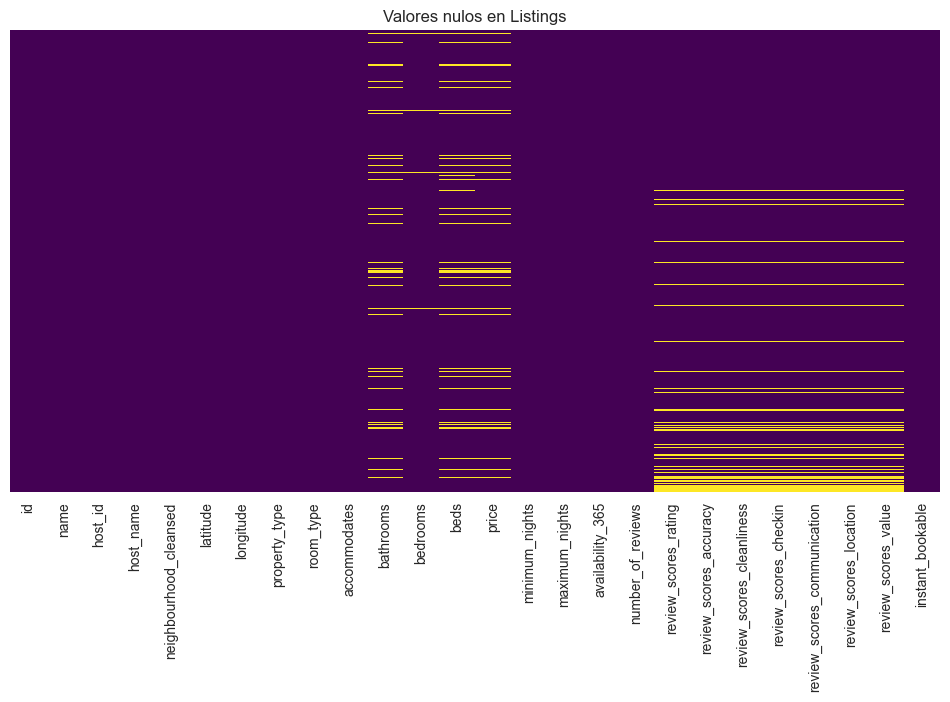


Porcentaje de valores nulos en Listings:
review_scores_value            8.835208
review_scores_accuracy         8.824178
review_scores_checkin          8.824178
review_scores_location         8.824178
review_scores_cleanliness      8.813148
review_scores_communication    8.813148
review_scores_rating           8.647695
price                          7.114494
beds                           6.949040
bathrooms                      6.838738
bedrooms                       1.103022
dtype: float64


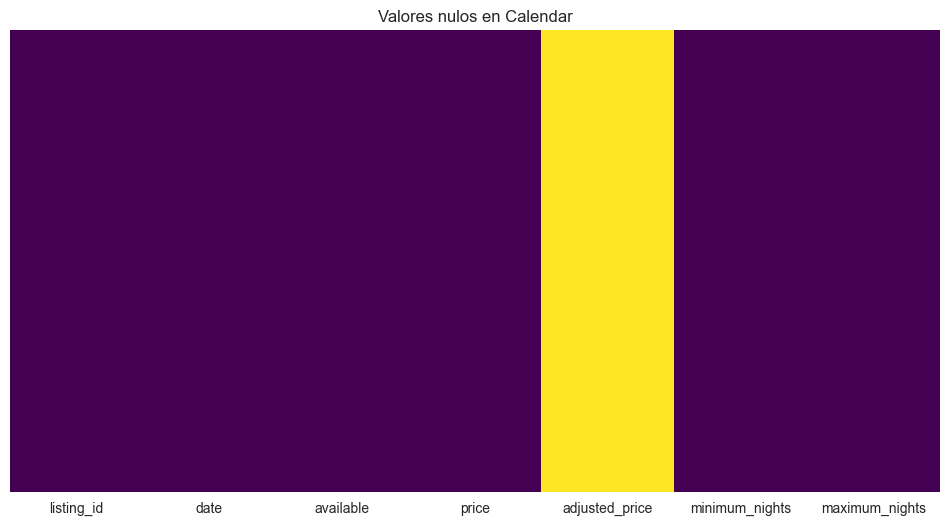


Porcentaje de valores nulos en Calendar:
adjusted_price    100.0
dtype: float64


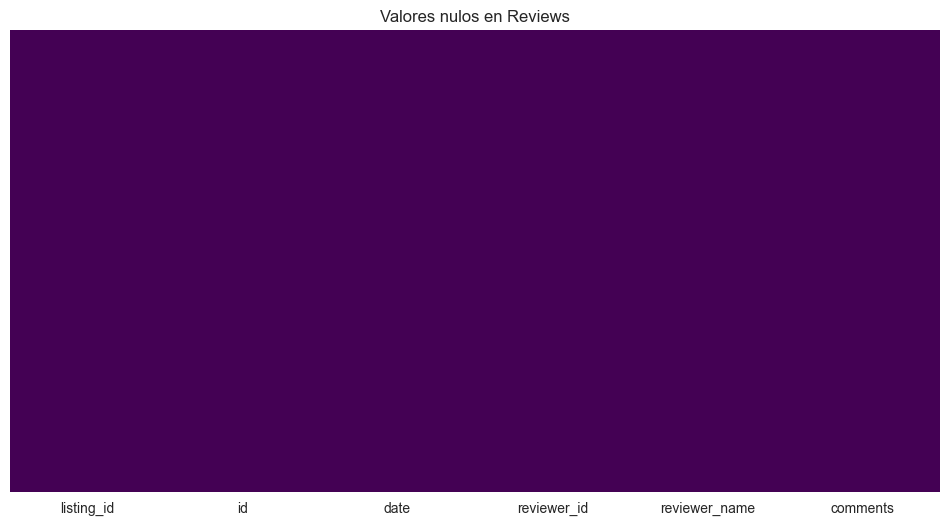


Porcentaje de valores nulos en Reviews:
comments    0.00568
dtype: float64


In [47]:
# Función para visualizar valores nulos
def plot_null_values(df, title):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.title(f'Valores nulos en {title}')
    plt.show()

    # Calcular y mostrar el porcentaje de valores nulos
    null_percentages = df.isnull().sum() / len(df) * 100
    print(f"\nPorcentaje de valores nulos en {title}:")
    print(null_percentages[null_percentages > 0].sort_values(ascending=False))

# Visualizar valores nulos
plot_null_values(listings, 'Listings')
plot_null_values(calendar, 'Calendar')
plot_null_values(reviews, 'Reviews')


Proporción moderada de valores nulos: En los tres datasets (Listings, Calendar y Reviews), la proporción de valores nulos es del 20% en la mayoría de las columnas afectadas. Esta proporción no es lo suficientemente alta como para justificar la eliminación de filas enteras, ya que podría resultar en una pérdida significativa de información. 
Excepto en Calendar Ajusted Price

In [48]:
# Eliminar la columna 'adjusted_price' de la tabla calendar
calendar.drop(columns=['adjusted_price'], inplace=True)

print("Columnas en calendar después de eliminar 'adjusted_price':")
print(calendar.columns.tolist())

Columnas en calendar después de eliminar 'adjusted_price':
['listing_id', 'date', 'available', 'price', 'minimum_nights', 'maximum_nights']


In [49]:
#Función para manejar valores nulos
def handle_null_values(df):
    # Para columnas numéricas, rellenar con la mediana
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
    
    # Para columnas categóricas, rellenar con el valor más frecuente
    categorical_columns = df.select_dtypes(include=['object']).columns
    df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])
    
    return df

# Aplicar manejo de valores nulos
listings = handle_null_values(listings)
calendar = handle_null_values(calendar)
reviews = handle_null_values(reviews)


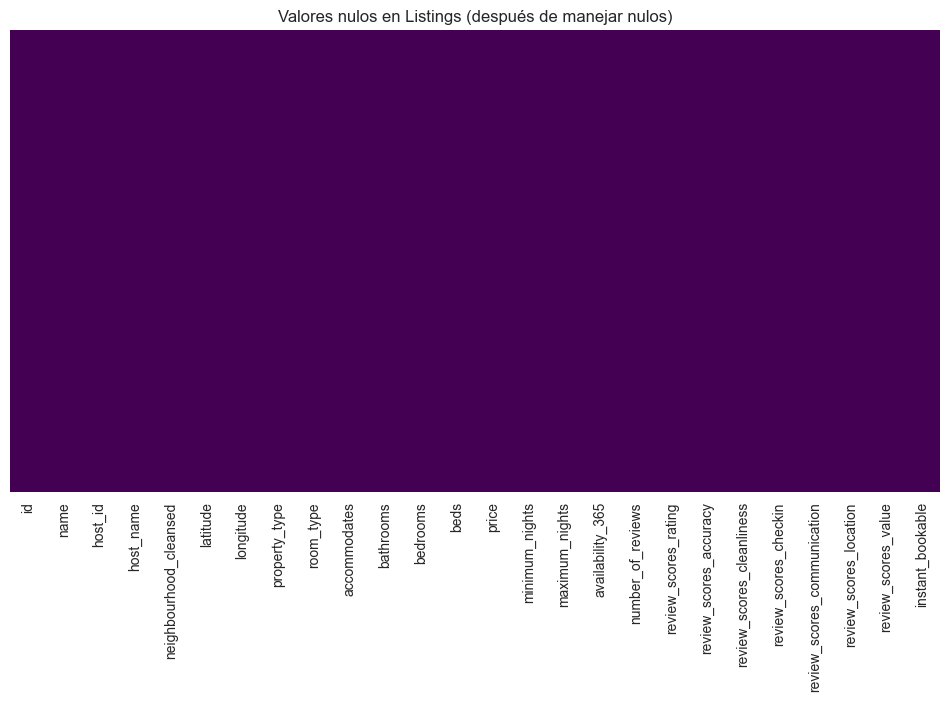


Porcentaje de valores nulos en Listings (después de manejar nulos):
Series([], dtype: float64)


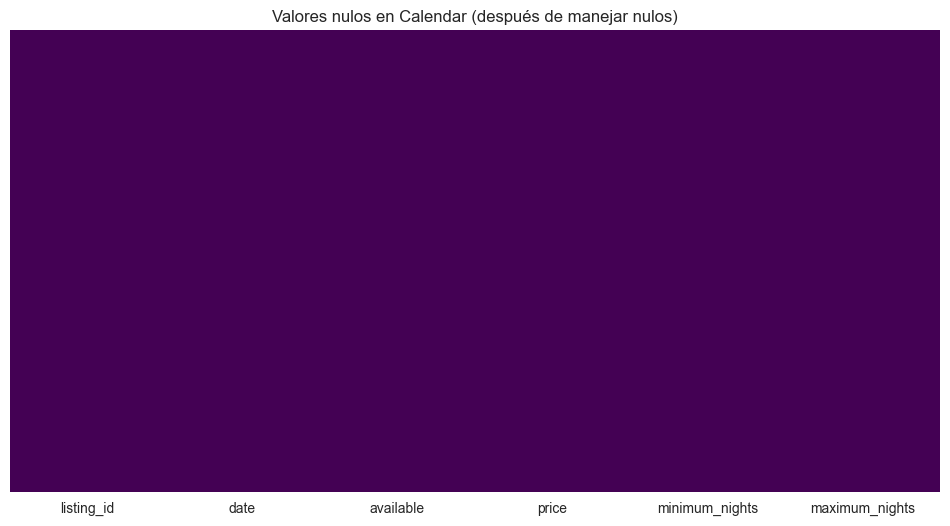


Porcentaje de valores nulos en Calendar (después de manejar nulos):
Series([], dtype: float64)


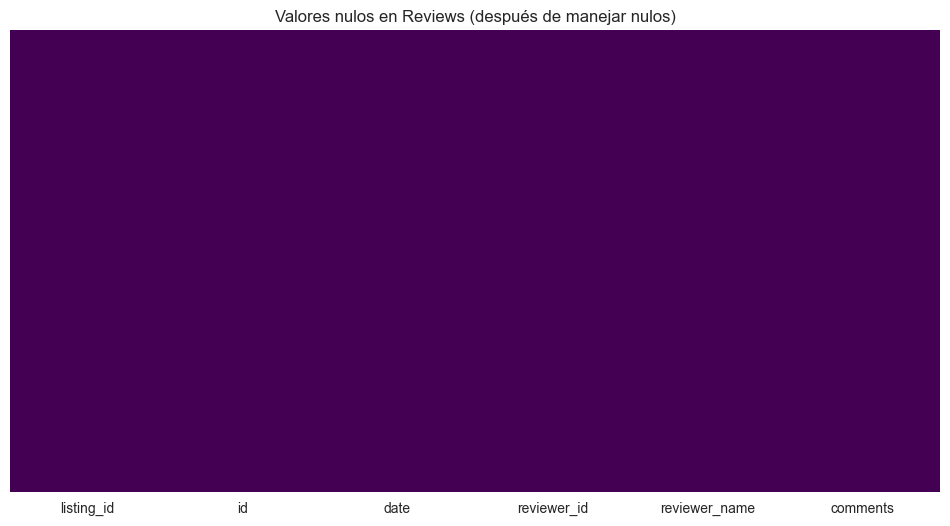


Porcentaje de valores nulos en Reviews (después de manejar nulos):
Series([], dtype: float64)


In [50]:
# Visualizar nuevamente para confirmar que se han manejado los valores nulos
plot_null_values(listings, 'Listings (después de manejar nulos)')
plot_null_values(calendar, 'Calendar (después de manejar nulos)')
plot_null_values(reviews, 'Reviews (después de manejar nulos)')

Desestimamos para el análisis el listado Neighbourhoods

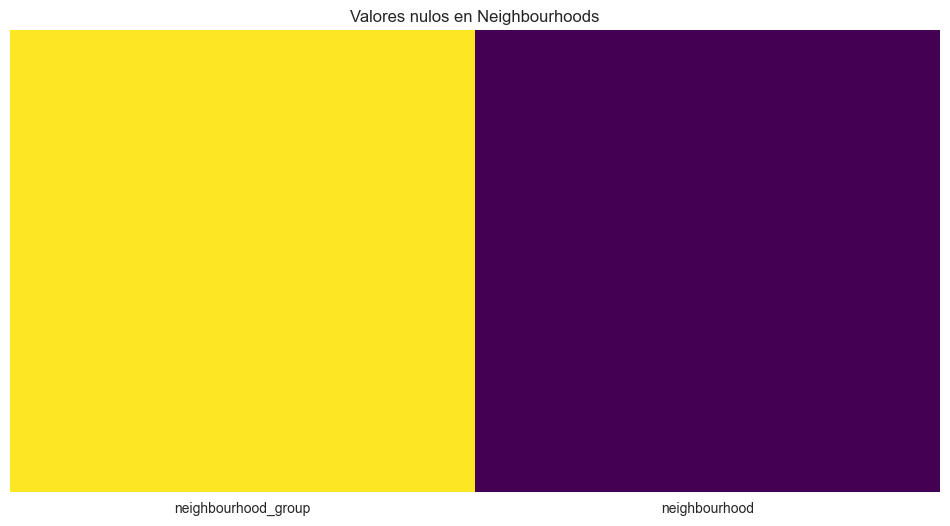


Porcentaje de valores nulos en Neighbourhoods:
neighbourhood_group    100.0
dtype: float64


In [51]:
# Visualizar valores nulos para el DataFrame neighbourhoods
plot_null_values(neighbourhoods, 'Neighbourhoods')

# 1.3 Conversion tipo de datos

In [52]:
#Identificar tipos de datos
print(listings.dtypes)
print(calendar.dtypes)
print(neighbourhoods.dtypes)
print(reviews.dtypes)

id                               int64
name                            object
host_id                          int64
host_name                       object
neighbourhood_cleansed          object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
price                           object
minimum_nights                   int64
maximum_nights                   int64
availability_365                 int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
instant_bookable         

In [53]:
# Realizar una copia de cada DataFrame
listings_copy = listings.copy()

# Identificar los tipos de datos actuales
print("Tipos de datos antes de la conversión:")
print(listings.dtypes)

# Convertir fechas a tipo datetime si la columna existe
if 'last_review' in listings.columns:
    listings['last_review'] = pd.to_datetime(listings['last_review'], errors='coerce')

# Convertir precios y valores monetarios a tipo float si las columnas existen, utilizamos if tras el primer cambio para evitar errores,
if 'price' in listings.columns:
    listings['price'] = pd.to_numeric(listings['price'].replace('[\$,]', '', regex=True), errors='coerce')
if 'weekly_price' in listings.columns:
    listings['weekly_price'] = pd.to_numeric(listings['weekly_price'].replace('[\$,]', '', regex=True), errors='coerce')
if 'monthly_price' in listings.columns:
    listings['monthly_price'] = pd.to_numeric(listings['monthly_price'].replace('[\$,]', '', regex=True), errors='coerce')
if 'security_deposit' in listings.columns:
    listings['security_deposit'] = pd.to_numeric(listings['security_deposit'].replace('[\$,]', '', regex=True), errors='coerce')
if 'cleaning_fee' in listings.columns:
    listings['cleaning_fee'] = pd.to_numeric(listings['cleaning_fee'].replace('[\$,]', '', regex=True), errors='coerce')

# Convertir valores booleanos a tipo bool si las columnas existen
if 'is_location_exact' in listings.columns:
    listings['is_location_exact'] = listings['is_location_exact'].astype(bool)
if 'instant_bookable' in listings.columns:
    listings['instant_bookable'] = listings['instant_bookable'].astype(bool)

# Convertir identificadores y códigos a tipo str si las columnas existen
if 'id' in listings.columns:
    listings['id'] = listings['id'].astype(str)
if 'host_id' in listings.columns:
    listings['host_id'] = listings['host_id'].astype(str)
if 'zipcode' in listings.columns:
    listings['zipcode'] = listings['zipcode'].astype(str)

# Convertir datos categóricos a tipo category si las columnas existen
if 'property_type' in listings.columns:
    listings['property_type'] = listings['property_type'].astype('category')
if 'room_type' in listings.columns:
    listings['room_type'] = listings['room_type'].astype('category')
if 'cancellation_policy' in listings.columns:
    listings['cancellation_policy'] = listings['cancellation_policy'].astype('category')



# Verificar los tipos de datos después de la conversión
print("Tipos de datos después de la conversión:")
print(listings.dtypes)

# Mostrar una muestra de los datos convertidos
print(listings.head())

Tipos de datos antes de la conversión:
id                               int64
name                            object
host_id                          int64
host_name                       object
neighbourhood_cleansed          object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
price                           object
minimum_nights                   int64
maximum_nights                   int64
availability_365                 int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value      

In [54]:
# Realizar una copia de cada DataFrame
calendar_copy = calendar.copy()
reviews_copy = reviews.copy()

# Identificar los tipos de datos actuales en calendar
print("Tipos de datos en calendar antes de la conversión:")
print(calendar.dtypes)

# Convertir fechas a tipo datetime en calendar
calendar['date'] = pd.to_datetime(calendar['date'], errors='coerce')

# Convertir precios a tipo float en calendar y quitamos el signo de dolar
calendar['price'] = pd.to_numeric(calendar['price'].replace('[\$,]', '', regex=True), errors='coerce')

# Convertir la columna 'available' a booleanos y luego a enteros
calendar_copy['available'] = calendar_copy['available'].map({'t': 1, 'f': 0})

# Verificar los tipos de datos después de la conversión en calendar
print("Tipos de datos en calendar después de la conversión:")
print(calendar.dtypes)

# Mostrar una muestra de los datos convertidos en calendar
print(calendar.head())

# Identificar los tipos de datos actuales en reviews
print("Tipos de datos en reviews antes de la conversión:")
print(reviews.dtypes)

# Convertir fechas a tipo datetime en reviews
reviews['date'] = pd.to_datetime(reviews['date'], errors='coerce')

# Convertir identificadores a tipo str en reviews

reviews['listing_id'] = reviews['listing_id'].astype(str)

# Verificar los tipos de datos después de la conversión en reviews
print("Tipos de datos en reviews después de la conversión:")
print(reviews.dtypes)

# Mostrar una muestra de los datos convertidos en reviews
print(reviews.head())

Tipos de datos en calendar antes de la conversión:
listing_id         int64
date              object
available         object
price             object
minimum_nights     int64
maximum_nights     int64
dtype: object
Tipos de datos en calendar después de la conversión:
listing_id                 int64
date              datetime64[ns]
available                 object
price                    float64
minimum_nights             int64
maximum_nights             int64
dtype: object
   listing_id       date available  price  minimum_nights  maximum_nights
0       23163 2024-06-24         f  156.0               1             731
1       23163 2024-06-25         f  156.0               1             731
2       23163 2024-06-26         f  156.0               1             731
3       23163 2024-06-27         f  156.0               1             731
4       23163 2024-06-28         f  156.0               1             731
Tipos de datos en reviews antes de la conversión:
listing_id        int64
id

In [55]:
# Realizar una copia del DataFrame
neighbourhoods_copy = neighbourhoods.copy()

# Identificar los tipos de datos actuales en neighbourhoods
print("Tipos de datos en neighbourhoods antes de la conversión:")
print(neighbourhoods_copy.dtypes)

# Convertir identificadores a tipo str si las columnas existen
if 'neighbourhood_group' in neighbourhoods_copy.columns:
    neighbourhoods_copy['neighbourhood_group'] = neighbourhoods_copy['neighbourhood_group'].astype(str)
if 'neighbourhood' in neighbourhoods_copy.columns:
    neighbourhoods_copy['neighbourhood'] = neighbourhoods_copy['neighbourhood'].astype(str)

# Convertir datos categóricos a tipo category si las columnas existen
if 'neighbourhood_group' in neighbourhoods_copy.columns:
    neighbourhoods_copy['neighbourhood_group'] = neighbourhoods_copy['neighbourhood_group'].astype('category')
if 'neighbourhood' in neighbourhoods_copy.columns:
    neighbourhoods_copy['neighbourhood'] = neighbourhoods_copy['neighbourhood'].astype('category')

# Verificar los tipos de datos después de la conversión en neighbourhoods
print("Tipos de datos en neighbourhoods después de la conversión:")
print(neighbourhoods_copy.dtypes)

# Mostrar una muestra de los datos convertidos en neighbourhoods
print(neighbourhoods_copy.head())

Tipos de datos en neighbourhoods antes de la conversión:
neighbourhood_group    float64
neighbourhood           object
dtype: object
Tipos de datos en neighbourhoods después de la conversión:
neighbourhood_group    category
neighbourhood          category
dtype: object
  neighbourhood_group neighbourhood
0                 nan     Běchovice
1                 nan        Benice
2                 nan    Březiněves
3                 nan      Čakovice
4                 nan       Ďáblice


## 1.4 Unimos en un df 

In [56]:
import pandas as pd

# Realizar una copia de cada DataFrame
listings_copy = listings.copy()
calendar_copy = calendar.copy()
reviews_copy = reviews.copy()

# Convertir las columnas 'id' y 'listing_id' a tipo str
listings_copy['id'] = listings_copy['id'].astype(str)
calendar_copy['listing_id'] = calendar_copy['listing_id'].astype(str)
reviews_copy['listing_id'] = reviews_copy['listing_id'].astype(str)

# Calcular el rango de fechas total
calendar_copy['date'] = pd.to_datetime(calendar_copy['date'])
total_days = (calendar_copy['date'].max() - calendar_copy['date'].min()).days + 1

# Agrupar calendar por listing_id y calcular el precio promedio y la disponibilidad total
calendar_agg = calendar_copy.groupby(['listing_id', 'date']).agg({
    'price': 'mean',
    'available': 'sum'
}).reset_index().rename(columns={'price': 'price_average'})

# Convertir 'listing_id' a tipo str en calendar_agg
calendar_agg['listing_id'] = calendar_agg['listing_id'].astype(str)

# Agrupar reviews por listing_id y calcular el número de reseñas
# Ajustar la agrupación según las columnas disponibles
if 'review_scores_rating' in reviews_copy.columns:
    reviews_grouped = reviews_copy.groupby('listing_id').agg({
        'id': 'count',
        'review_scores_rating': 'mean'
    }).reset_index().rename(columns={'id': 'review_count'})
else:
    reviews_grouped = reviews_copy.groupby('listing_id').agg({
        'id': 'count'
    }).reset_index().rename(columns={'id': 'review_count'})

# Unir los DataFrames utilizando listing_id
merged_df = pd.merge(listings_copy, calendar_agg, left_on='id', right_on='listing_id', how='inner', suffixes=('', '_calendar'))
merged_df = pd.merge(merged_df, reviews_grouped, left_on='id', right_on='listing_id', how='inner', suffixes=('', '_reviews'))

# Verificar las columnas disponibles en merged_df
print("Columnas disponibles en merged_df:")
print(merged_df.columns)

# Mostrar una muestra del DataFrame final utilizando display
display(merged_df.head())

Columnas disponibles en merged_df:
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'listing_id', 'date',
       'price_average', 'available', 'listing_id_reviews', 'review_count'],
      dtype='object')


id                          name host_id host_name  \
0  23163  Residence Karolina - KAROL12    5282     Klara   
1  23163  Residence Karolina - KAROL12    5282     Klara   
2  23163  Residence Karolina - KAROL12    5282     Klara   
3  23163  Residence Karolina - KAROL12    5282     Klara   
4  23163  Residence Karolina - KAROL12    5282     Klara   

  neighbourhood_cleansed  latitude  longitude       property_type  \
0                Praha 1  50.08229   14.41552  Entire rental unit   
1                Praha 1  50.08229   14.41552  Entire rental unit   
2                Praha 1  50.08229   14.41552  Entire rental unit   
3                Praha 1  50.08229   14.41552  Entire rental unit   
4                Praha 1  50.08229   14.41552  Entire rental unit   

         room_type  accommodates  bathrooms  bedrooms  beds   price  \
0  Entire home/apt             4        1.0       1.0   2.0  1200.0   
1  Entire home/apt             4        1.0       1.0   2.0  1200.0   
2  Entire home/apt             4        1.0       1.0   2.0  1200.0   
3  Entire home/apt             4        1.0       1.0   2.0  1200.0   
4  Entire home/apt             4        1.0       1.0   2.0  1200.0   

   minimum_nights  maximum_nights  availability_365  number_of_reviews  \
0               1             365                 0                 31   
1               1             365                 0                 31   
2               1             365                 0                 31   
3               1             365                 0                 31   
4               1             365                 0                 31   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                   4.9                    4.83                        5.0   
1                   4.9                    4.83                        5.0   
2                   4.9                    4.83                        5.0   
3                   4.9                    4.83                        5.0   
4                   4.9                    4.83                        5.0   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                    5.0                         4.97                    4.93   
1                    5.0                         4.97                    4.93   
2                    5.0                         4.97                    4.93   
3                    5.0                         4.97                    4.93   
4                    5.0                         4.97                    4.93   

   review_scores_value  instant_bookable listing_id       date  price_average  \
0                 4.86              True      23163 2024-06-24          156.0   
1                 4.86              True      23163 2024-06-25          156.0   
2                 4.86              True      23163 2024-06-26          156.0   
3                 4.86              True      23163 2024-06-27          156.0   
4                 4.86              True      23163 2024-06-28          156.0   

  available listing_id_reviews  review_count  
0         f              23163            31  
1         f              23163            31  
2         f              23163            31  
3         f              23163            31  
4         f              23163            31

In [57]:
# Eliminar la variable df si existe
if 'df' in globals():
    del df

# Unir los DataFrames utilizando listing_id
merged_df = pd.merge(listings_copy, calendar_agg, left_on='id', right_on='listing_id', how='inner')
merged_df = pd.merge(merged_df, reviews_grouped, left_on='id', right_on='listing_id', how='inner')

# Mostrar todas las columnas del DataFrame merged_df
pd.set_option('display.max_columns', None)
display(merged_df)

id                          name    host_id  \
0                      23163  Residence Karolina - KAROL12       5282   
1                      23163  Residence Karolina - KAROL12       5282   
2                      23163  Residence Karolina - KAROL12       5282   
3                      23163  Residence Karolina - KAROL12       5282   
4                      23163  Residence Karolina - KAROL12       5282   
...                      ...                           ...        ...   
3022902  1181274100952577498    Prague City vibe apartment  583824671   
3022903  1181274100952577498    Prague City vibe apartment  583824671   
3022904  1181274100952577498    Prague City vibe apartment  583824671   
3022905  1181274100952577498    Prague City vibe apartment  583824671   
3022906  1181274100952577498    Prague City vibe apartment  583824671   

        host_name neighbourhood_cleansed   latitude  longitude  \
0           Klara                Praha 1  50.082290  14.415520   
1           Klara                Praha 1  50.082290  14.415520   
2           Klara                Praha 1  50.082290  14.415520   
3           Klara                Praha 1  50.082290  14.415520   
4           Klara                Praha 1  50.082290  14.415520   
...           ...                    ...        ...        ...   
3022902     Peter                Praha 2  50.074277  14.433446   
3022903     Peter                Praha 2  50.074277  14.433446   
3022904     Peter                Praha 2  50.074277  14.433446   
3022905     Peter                Praha 2  50.074277  14.433446   
3022906     Peter                Praha 2  50.074277  14.433446   

              property_type        room_type  accommodates  bathrooms  \
0        Entire rental unit  Entire home/apt             4        1.0   
1        Entire rental unit  Entire home/apt             4        1.0   
2        Entire rental unit  Entire home/apt             4        1.0   
3        Entire rental unit  Entire home/apt             4        1.0   
4        Entire rental unit  Entire home/apt             4        1.0   
...                     ...              ...           ...        ...   
3022902  Entire rental unit  Entire home/apt             5        1.5   
3022903  Entire rental unit  Entire home/apt             5        1.5   
3022904  Entire rental unit  Entire home/apt             5        1.5   
3022905  Entire rental unit  Entire home/apt             5        1.5   
3022906  Entire rental unit  Entire home/apt             5        1.5   

         bedrooms  beds   price  minimum_nights  maximum_nights  \
0             1.0   2.0  1200.0               1             365   
1             1.0   2.0  1200.0               1             365   
2             1.0   2.0  1200.0               1             365   
3             1.0   2.0  1200.0               1             365   
4             1.0   2.0  1200.0               1             365   
...           ...   ...     ...             ...             ...   
3022902       1.0   4.0  3163.0               1             365   
3022903       1.0   4.0  3163.0               1             365   
3022904       1.0   4.0  3163.0               1             365   
3022905       1.0   4.0  3163.0               1             365   
3022906       1.0   4.0  3163.0               1             365   

         availability_365  number_of_reviews  review_scores_rating  \
0                       0                 31                   4.9   
1                       0                 31                   4.9   
2                       0                 31                   4.9   
3                       0                 31                   4.9   
4                       0                 31                   4.9   
...                   ...                ...                   ...   
3022902               350                  1                   5.0   
3022903               350                  1                   5.0   
3022904               350                  1

## 1.5 Vemos correlación:

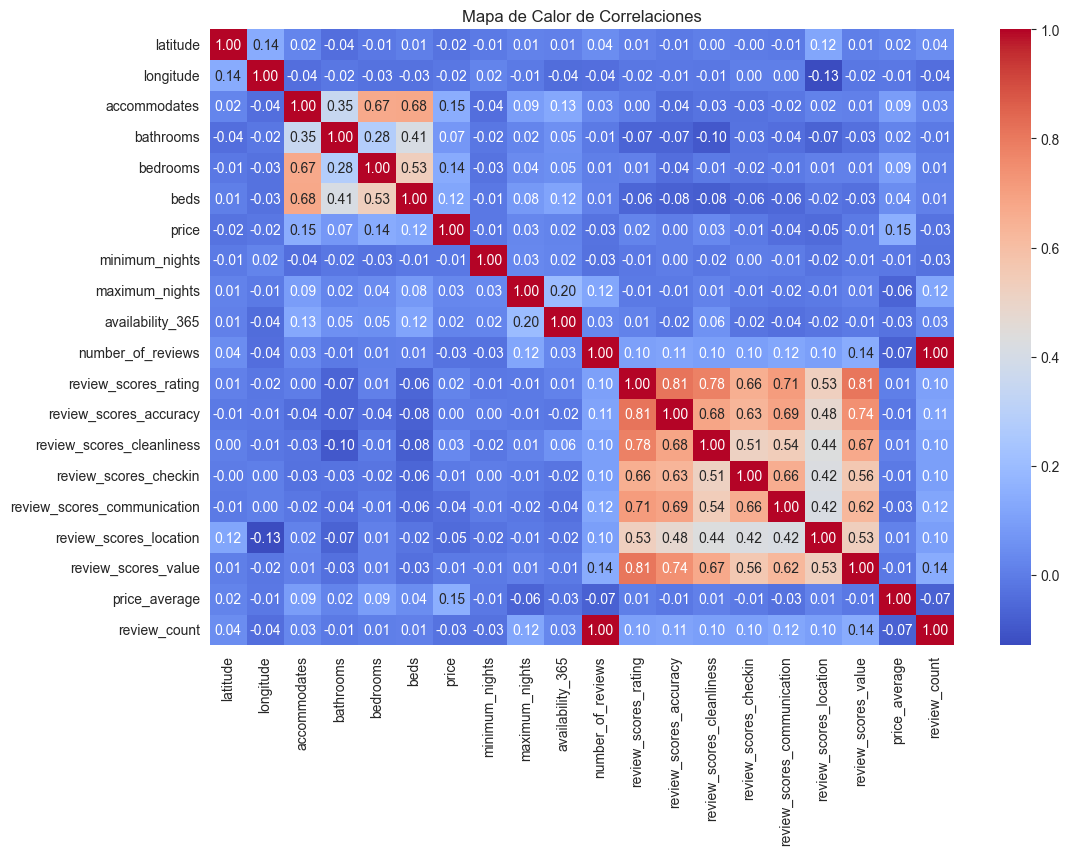

In [58]:
# Seleccionar solo las columnas numéricas
numeric_df = merged_df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones')
plt.show()

## 1.5 Unificación de Métricas y Creación de Índices para el df_merged (Df de listings, calendar y reviews)

Vamos a unificar las métricas de las propiedades para simplificar el análisis. Para ello, seguiremos los siguientes pasos:  

1. Eliminar columnas con correlaciones bajas**: Eliminaremos las columnas que no aportan significativamente al análisis.
2. Unificar métricas de reseñas**: Calcularemos un puntaje promedio de las reseñas, manteniendo la puntuación de ubicación por separado.
3. Crear un índice de capacidad**: Unificaremos las características de la propiedad en un índice de capacidad.
4. Unificar métricas de disponibilidad**: Mantendremos solo la métrica de porcentaje de disponibilidad.
5. Eliminar columnas originales**: Eliminaremos las columnas originales que ya han sido unificadas en nuevas métricas.
6. Verificar las columnas resultantes**: Mostraremos las columnas del DataFrame final para verificar los cambios realizados.

In [59]:
# Eliminar columnas con correlaciones bajas
merged_df = merged_df.drop(columns=['minimum_nights', 'maximum_nights'])

# Unificar métricas de reseñas
review_scores_columns = [
    'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_value'
]

# Calcular score promedio manteniendo review_scores_location separado
merged_df['review_scores_avg'] = merged_df[review_scores_columns].mean(axis=1)

# Unificar características de la propiedad en un índice de capacidad
capacity_columns = ['accommodates', 'bedrooms', 'beds', 'bathrooms']
merged_df['capacity_index'] = (
    merged_df['accommodates'] * 1 + 
    merged_df['bedrooms'] * 1 + 
    merged_df['beds'] * 0.5 + 
    merged_df['bathrooms'] * 0.5
)

# Unificar métricas de disponibilidad
# Como availability_365 y availability_percentage tienen correlación 1.0,
# mantenemos solo availability_percentage
merged_df = merged_df.drop(columns=['availability_365'])

# Eliminar las columnas originales que ya están unificadas
columns_to_drop = (
    review_scores_columns +  # Columnas de reseñas unificadas en review_scores_avg
    capacity_columns        # Columnas de capacidad unificadas en capacity_index
)
merged_df = merged_df.drop(columns=columns_to_drop)

# Verificar las columnas resultantes
print("Columnas en el DataFrame final:")
print(merged_df.columns.tolist())

# Mostrar todas las columnas del DataFrame merged_df
pd.set_option('display.max_columns', None)
display(merged_df)

Columnas en el DataFrame final:
['id', 'name', 'host_id', 'host_name', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'price', 'number_of_reviews', 'review_scores_location', 'instant_bookable', 'listing_id_x', 'date', 'price_average', 'available', 'listing_id_y', 'review_count', 'review_scores_avg', 'capacity_index']


id                          name    host_id  \
0                      23163  Residence Karolina - KAROL12       5282   
1                      23163  Residence Karolina - KAROL12       5282   
2                      23163  Residence Karolina - KAROL12       5282   
3                      23163  Residence Karolina - KAROL12       5282   
4                      23163  Residence Karolina - KAROL12       5282   
...                      ...                           ...        ...   
3022902  1181274100952577498    Prague City vibe apartment  583824671   
3022903  1181274100952577498    Prague City vibe apartment  583824671   
3022904  1181274100952577498    Prague City vibe apartment  583824671   
3022905  1181274100952577498    Prague City vibe apartment  583824671   
3022906  1181274100952577498    Prague City vibe apartment  583824671   

        host_name neighbourhood_cleansed   latitude  longitude  \
0           Klara                Praha 1  50.082290  14.415520   
1           Klara                Praha 1  50.082290  14.415520   
2           Klara                Praha 1  50.082290  14.415520   
3           Klara                Praha 1  50.082290  14.415520   
4           Klara                Praha 1  50.082290  14.415520   
...           ...                    ...        ...        ...   
3022902     Peter                Praha 2  50.074277  14.433446   
3022903     Peter                Praha 2  50.074277  14.433446   
3022904     Peter                Praha 2  50.074277  14.433446   
3022905     Peter                Praha 2  50.074277  14.433446   
3022906     Peter                Praha 2  50.074277  14.433446   

              property_type        room_type   price  number_of_reviews  \
0        Entire rental unit  Entire home/apt  1200.0                 31   
1        Entire rental unit  Entire home/apt  1200.0                 31   
2        Entire rental unit  Entire home/apt  1200.0                 31   
3        Entire rental unit  Entire home/apt  1200.0                 31   
4        Entire rental unit  Entire home/apt  1200.0                 31   
...                     ...              ...     ...                ...   
3022902  Entire rental unit  Entire home/apt  3163.0                  1   
3022903  Entire rental unit  Entire home/apt  3163.0                  1   
3022904  Entire rental unit  Entire home/apt  3163.0                  1   
3022905  Entire rental unit  Entire home/apt  3163.0                  1   
3022906  Entire rental unit  Entire home/apt  3163.0                  1   

         review_scores_location  instant_bookable         listing_id_x  \
0                          4.93              True                23163   
1                          4.93              True                23163   
2                          4.93              True                23163   
3                          4.93              True                23163   
4                          4.93              True                23163   
...                         ...               ...                  ...   
3022902                    4.87              True  1181274100952577498   
3022903                    4.87              True  1181274100952577498   
3022904                    4.87              True  1181274100952577498   
3022905                    4.87              True  1181274100952577498   
3022906                    4.87              True  1181274100952577498   

              date  price_average available         listing_id_y  \
0       2024-06-24          156.0         f                23163   
1       2024-06-25          156.0         f                23163   
2       2024-06-26          156.0         f                23163   
3       2024-06-27          156.0         f                23163   
4       2024-06-28          156.0         f                23163   
...            ...            ...       ...                  ...   
3022902 2025-06-19        12000.0         t  1181274100952577498   
3022903 2025-06-20    

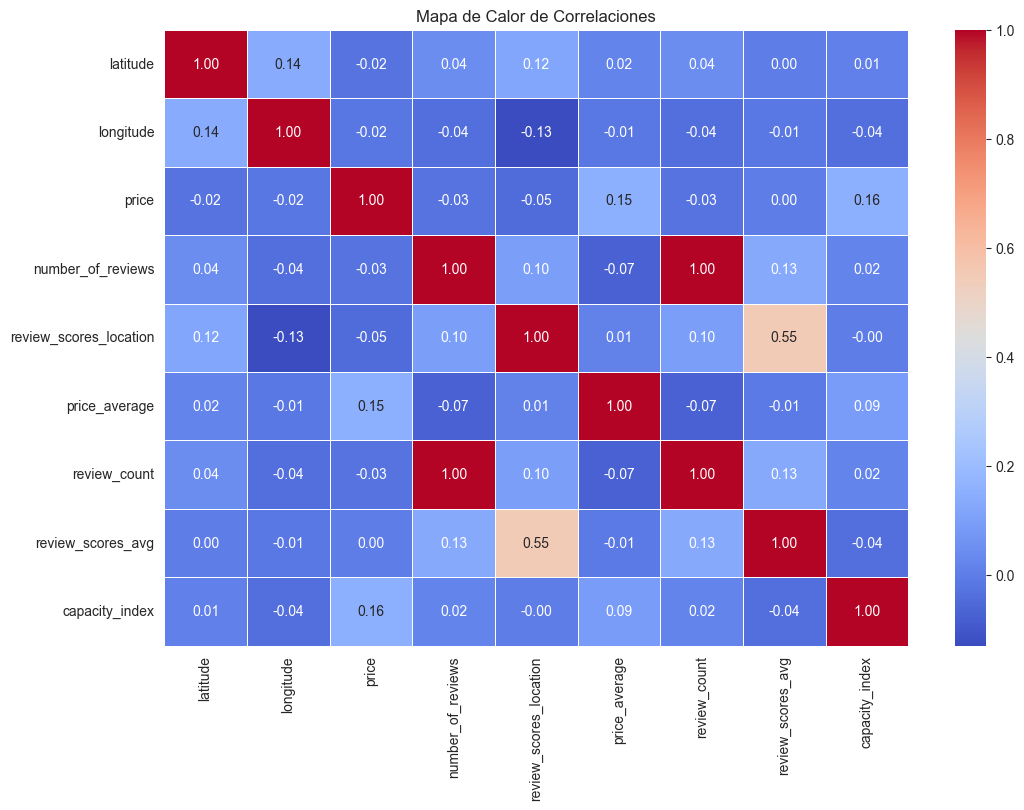

In [60]:
# Calcular la matriz de correlación
numeric_df = merged_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el mapa de calor sin la máscara
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Título del mapa de calor
plt.title('Mapa de Calor de Correlaciones')

# Mostrar el mapa de calor
plt.show()


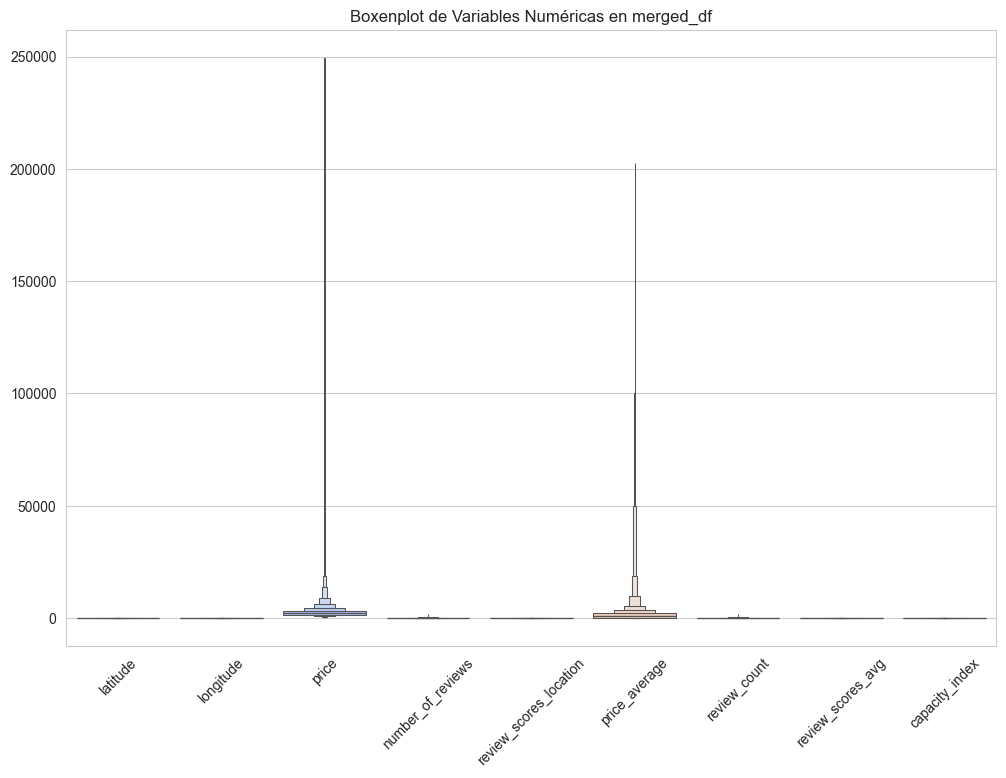

In [61]:
# Crear un boxenplot de las variables numéricas en merged_df
plt.figure(figsize=(12, 8))
sns.boxenplot(data=merged_df.select_dtypes(include=[np.number]), palette="coolwarm")
plt.title('Boxenplot de Variables Numéricas en merged_df')
plt.xticks(rotation=45)
plt.show()

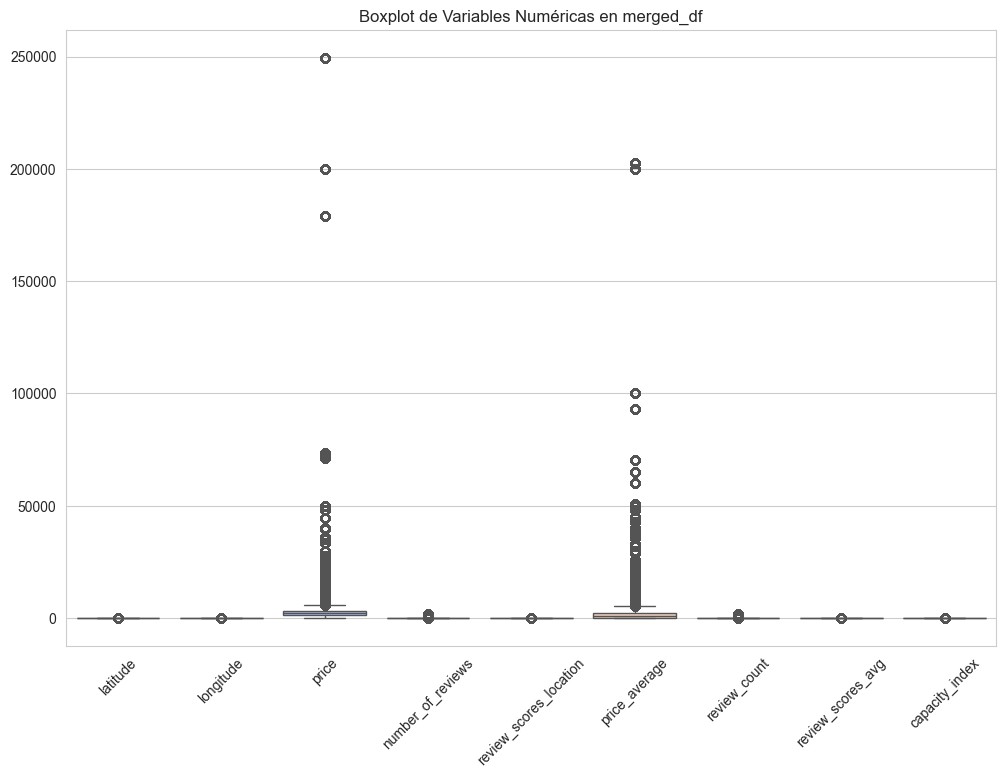

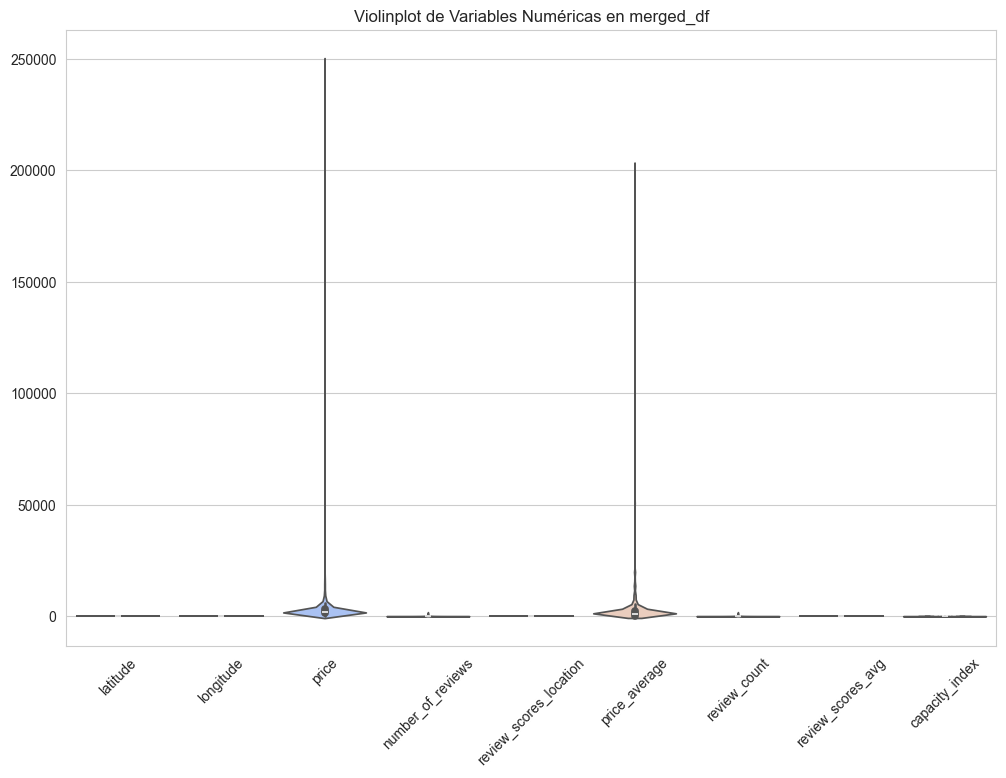

In [62]:
# Crear un boxplot de las variables numéricas en merged_df
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_df.select_dtypes(include=[np.number]), palette="coolwarm")
plt.title('Boxplot de Variables Numéricas en merged_df')
plt.xticks(rotation=45)
plt.show()
# Crear un gráfico de violín de las variables numéricas en merged_df
plt.figure(figsize=(12, 8))
sns.violinplot(data=merged_df.select_dtypes(include=[np.number]), palette="coolwarm")
plt.title('Violinplot de Variables Numéricas en merged_df')
plt.xticks(rotation=45)
plt.show()

## Análisis de Outliers por Variable

### Precio y Precio Promedio:
- Existen valores extremos muy alejados (hasta 250,000).
- La mayoría de los precios se concentran por debajo de 50,000.
- Estos outliers podrían ser propiedades de lujo o especiales que NO deberíamos eliminar, ya que son relevantes para un análisis de inversión.

### Review Scores Average:
- La distribución es asimétrica negativa.
- Los outliers están principalmente en la parte inferior (puntuaciones bajas).
- Estos valores atípicos son importantes para identificar propiedades problemáticas.

### Capacity Index:
- Muestra outliers por encima de 30.
- La mayoría de las propiedades tienen un índice entre 2 y 10.
- Estos valores atípicos representan propiedades de gran capacidad que son relevantes para inversores.

### Recomendación:
Para nuestro análisis de inversión, NO recomiendo suavizar o eliminar los outliers porque:
- Los precios extremos representan oportunidades de inversión en el segmento de lujo.
- Las puntuaciones bajas ayudan a identificar áreas problemáticas.
- Las propiedades con alta capacidad son relevantes para inversores interesados en alojamientos grandes.

En lugar de eliminar outliers, sería más útil:
- Segmentar el análisis por rangos de precios.
- Crear categorías de propiedades (económicas, medias, premium, lujo).
- Analizar separadamente las propiedades de gran capacidad.

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer paleta de colores personalizada
coral_palette = ['lightcoral', 'lightpink', 'white', 'lightgray']
sns.set_palette(coral_palette)
sns.set_style("whitegrid")

# Crear subplots para boxplots
def plot_custom_boxplots(merged_df):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    sns.boxplot(data=merged_df, y='price', ax=axes[0,0], color='lightcoral')
    axes[0,0].set_title('Distribución de Precios', color='dimgray')
    
    sns.boxplot(data=merged_df, y='avg_price', ax=axes[0,1], color='lightpink')
    axes[0,1].set_title('Distribución de Precios Promedio', color='dimgray')
    
    sns.boxplot(data=merged_df, y='review_scores_avg', ax=axes[1,0], color='lightcoral')
    axes[1,0].set_title('Distribución de Puntuaciones', color='dimgray')
    
    sns.boxplot(data=merged_df, y='capacity_index', ax=axes[1,1], color='lightpink')
    axes[1,1].set_title('Distribución de Índice de Capacidad', color='dimgray')
    
    plt.tight_layout()
    plt.show()

# Crear subplots para histogramas
def plot_custom_histograms(merged_df):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    sns.histplot(data=merged_df, x='price', ax=axes[0,0], color='lightcoral', kde=True)
    axes[0,0].set_title('Histograma de Precios', color='dimgray')
    
    sns.histplot(data=merged_df, x='avg_price', ax=axes[0,1], color='lightpink', kde=True)
    axes[0,1].set_title('Histograma de Precios Promedio', color='dimgray')
    
    sns.histplot(data=merged_df, x='review_scores_avg', ax=axes[1,0], color='lightcoral', kde=True)
    axes[1,0].set_title('Histograma de Puntuaciones', color='dimgray')
    
    sns.histplot(data=merged_df, x='capacity_index', ax=axes[1,1], color='lightpink', kde=True)
    axes[1,1].set_title('Histograma de Índice de Capacidad', color='dimgray')
    
    plt.tight_layout()
    plt.show()


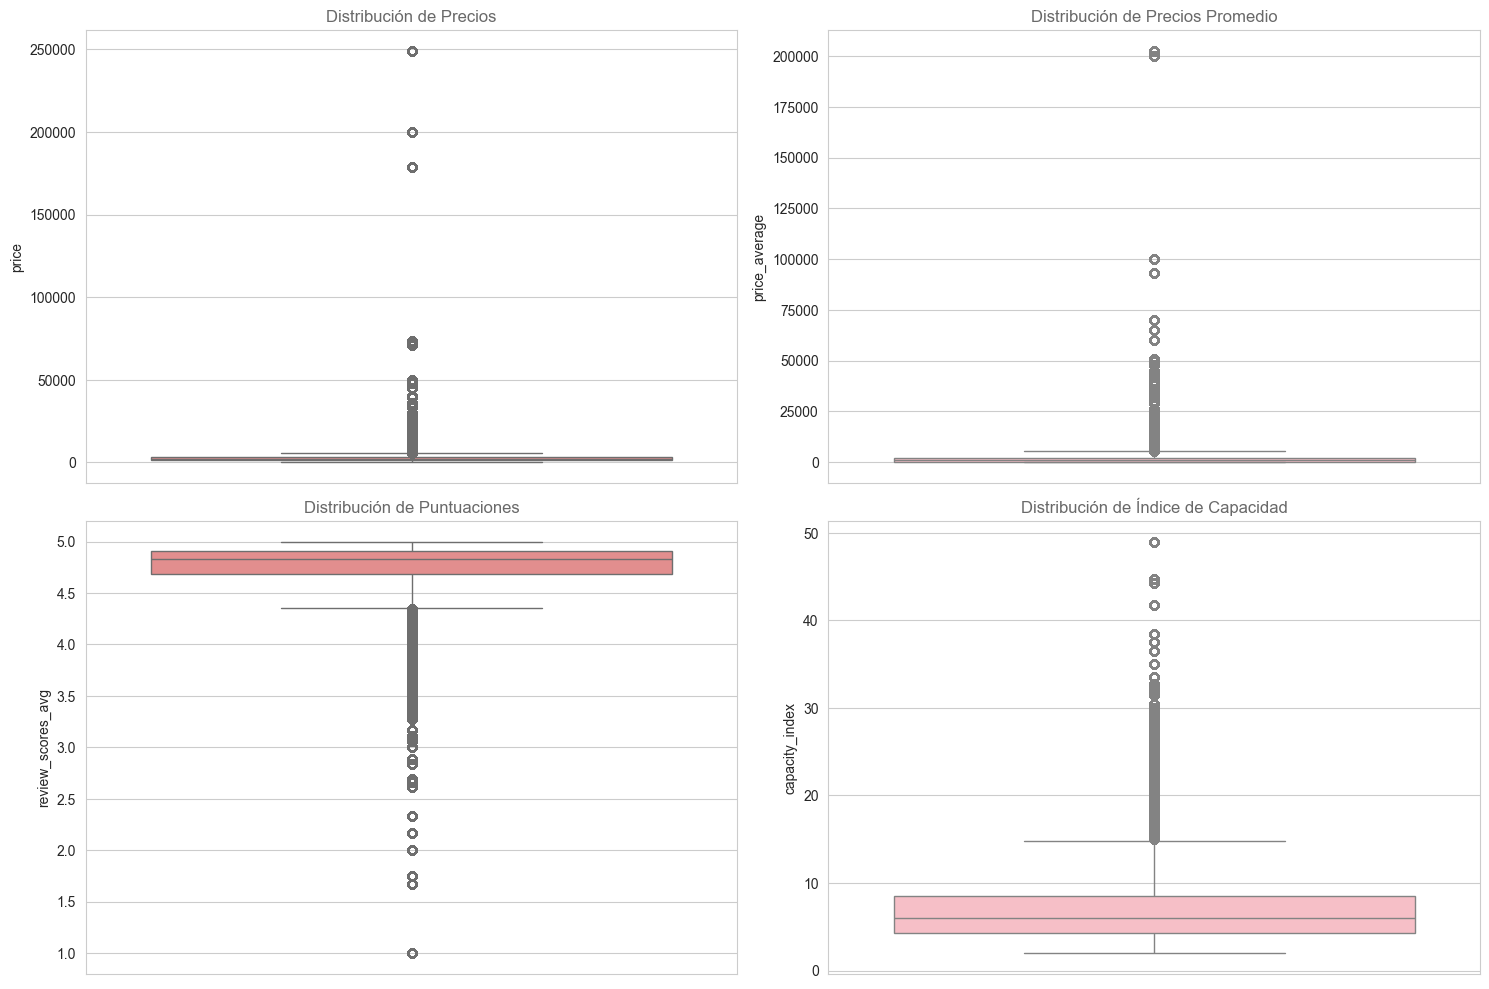

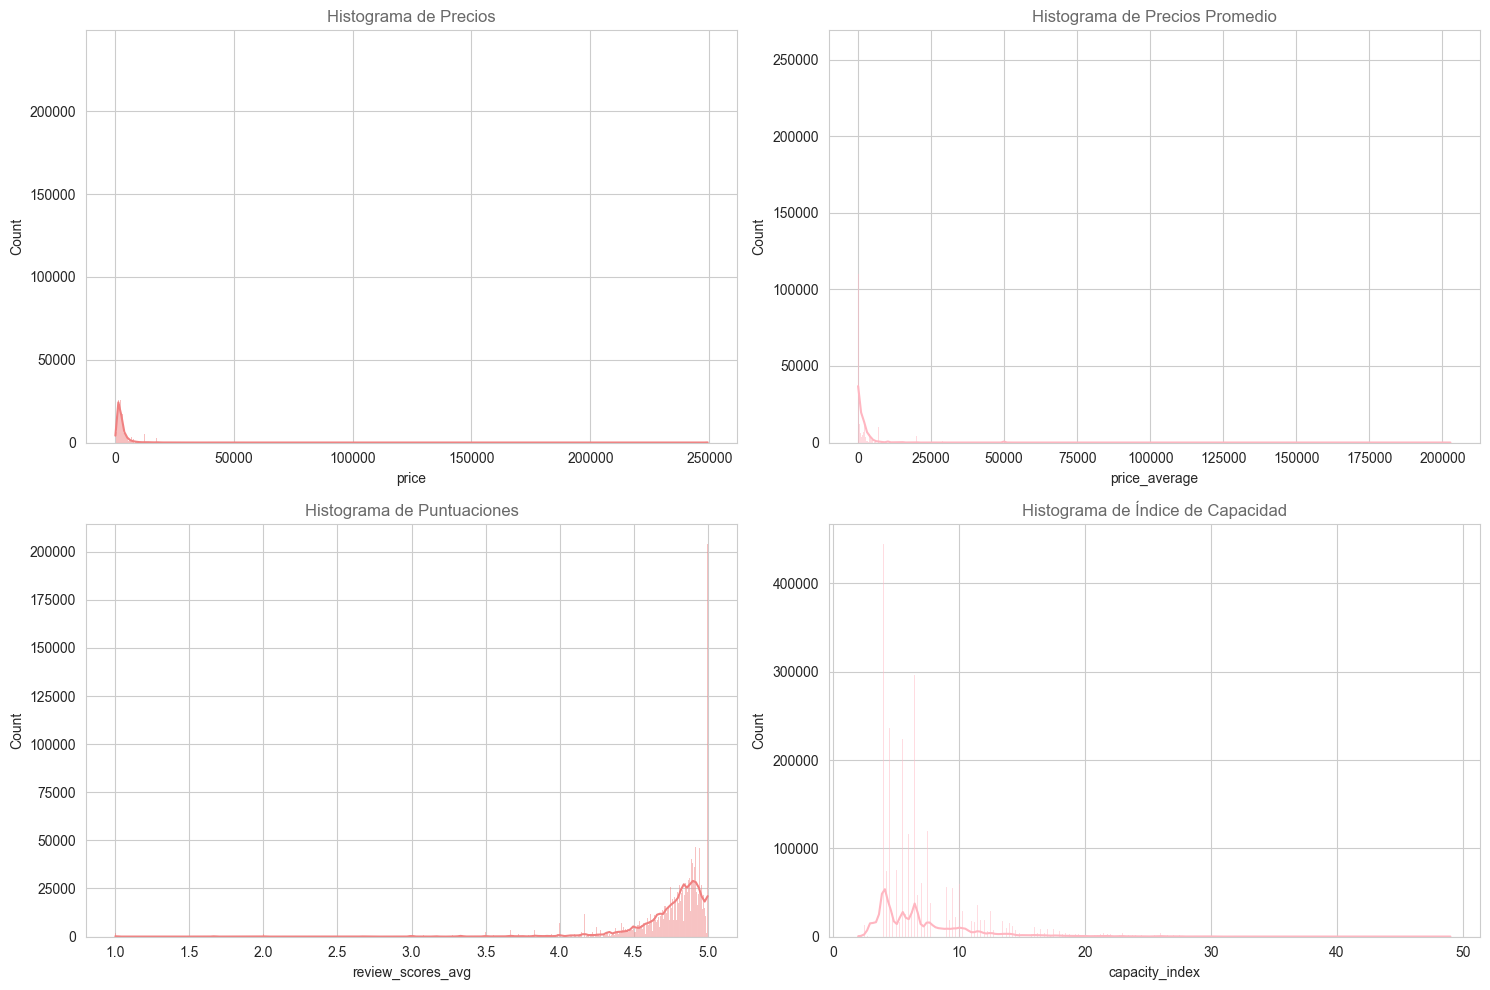

In [64]:
import seaborn as sns

import matplotlib.pyplot as plt

# Establecer paleta de colores personalizada
coral_palette = ['lightcoral', 'lightpink', 'white', 'lightgray']
sns.set_palette(coral_palette)
sns.set_style("whitegrid")

# Crear subplots para boxplots
def plot_custom_boxplots(merged_df):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    sns.boxplot(data=merged_df, y='price', ax=axes[0,0], color='lightcoral')
    axes[0,0].set_title('Distribución de Precios', color='dimgray')
    
    sns.boxplot(data=merged_df, y='price_average', ax=axes[0,1], color='lightpink')
    axes[0,1].set_title('Distribución de Precios Promedio', color='dimgray')
    
    sns.boxplot(data=merged_df, y='review_scores_avg', ax=axes[1,0], color='lightcoral')
    axes[1,0].set_title('Distribución de Puntuaciones', color='dimgray')
    
    sns.boxplot(data=merged_df, y='capacity_index', ax=axes[1,1], color='lightpink')
    axes[1,1].set_title('Distribución de Índice de Capacidad', color='dimgray')
    
    plt.tight_layout()
    plt.show()

# Crear subplots para histogramas
def plot_custom_histograms(merged_df):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    sns.histplot(data=merged_df, x='price', ax=axes[0,0], color='lightcoral', kde=True)
    axes[0,0].set_title('Histograma de Precios', color='dimgray')
    
    sns.histplot(data=merged_df, x='price_average', ax=axes[0,1], color='lightpink', kde=True)
    axes[0,1].set_title('Histograma de Precios Promedio', color='dimgray')
    
    sns.histplot(data=merged_df, x='review_scores_avg', ax=axes[1,0], color='lightcoral', kde=True)
    axes[1,0].set_title('Histograma de Puntuaciones', color='dimgray')
    
    sns.histplot(data=merged_df, x='capacity_index', ax=axes[1,1], color='lightpink', kde=True)
    axes[1,1].set_title('Histograma de Índice de Capacidad', color='dimgray')
    
    plt.tight_layout()
    plt.show()

# Llamar a las funciones para generar los gráficos
plot_custom_boxplots(merged_df)
plot_custom_histograms(merged_df)

Observando los boxplots y histogramas de precio:

**Económicas (0-200):**
- Representan la mayoría de las propiedades
- Alta concentración en este rango
- Ideal para inversores que buscan volumen

**Medias (200-400):**
- Segunda categoría más numerosa
- Representa el rango intercuartílico en el boxplot
- Mercado principal para inversores medianos

**Premium (400-1000):**
- Menor cantidad de propiedades
- Representan outliers moderados
- Oportunidad para inversión diferenciada

**Lujo (>1000):**
- Outliers extremos
- Muy pocas propiedades
- Segmento de inversión especializada

### Análisis por Capacidad

**Según el capacity_index mostrado:**

**Pequeña (0-5):**
- Mayor concentración de propiedades
- Correlaciona con precios económicos y medios

**Mediana (5-10):**
- Segunda categoría más común
- Ideal para inversión equilibrada

**Grande (10-20):**
- Menos frecuente
- Potencial para mercado premium

**Extra grande (>20):**
- Outliers en capacity_index
- Correlaciona con precios de lujo

### Recomendaciones

**Para inversión segura:**
- Enfocarse en propiedades medianas (200-400)
- Capacity_index entre 5-10
- Review_scores_avg > 4.0

**Para máximo retorno:**
- Considerar propiedades premium (400-1000)
- Capacity_index > 10
- Ubicaciones premium (review_scores_location alto)

**Para inversión especializada:**
- Segmento lujo (>1000)
- Capacity_index > 20
- Evaluación caso por caso

Esta segmentación permite una estrategia de inversión más precisa según el perfil del inversor y el mercado objetivo.

/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/288629335.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_category', y='price_average', palette=colors, ax=ax1)
/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/288629335.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='price_category', palette=colors, ax=ax2)


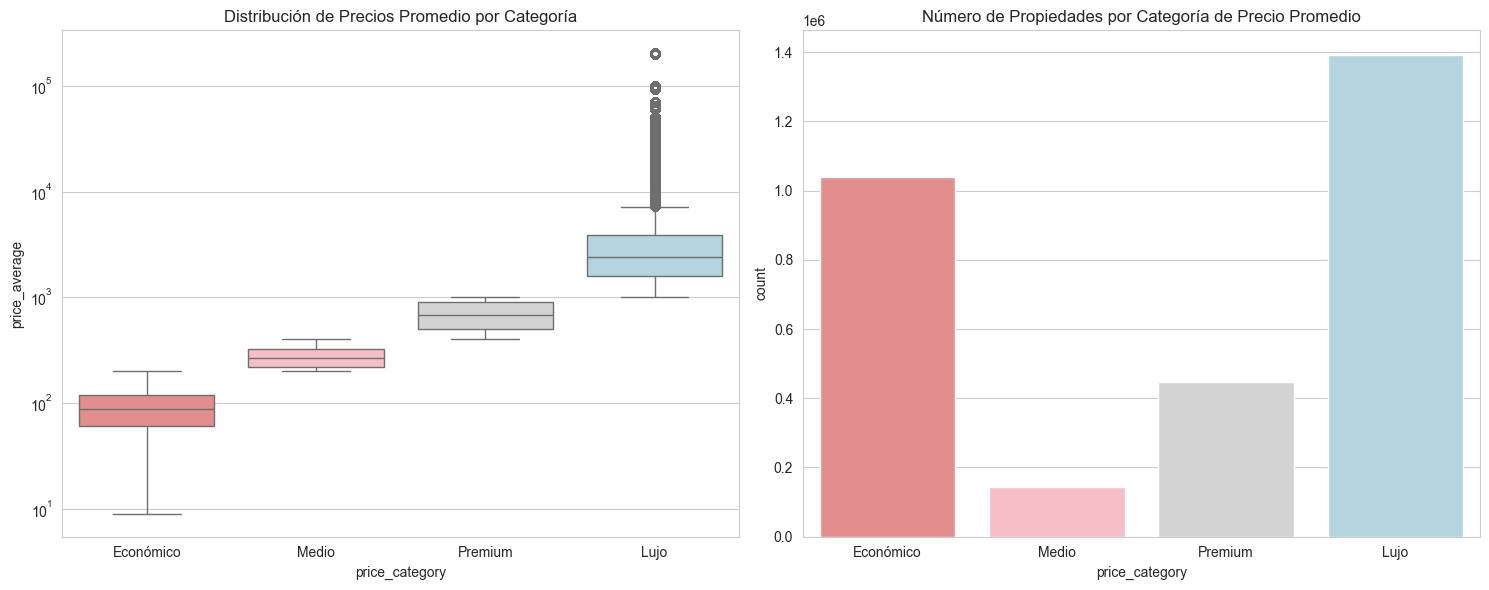

/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/288629335.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='capacity_category', y='price_average', palette=colors, ax=ax1)
/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/288629335.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='capacity_category', palette=colors, ax=ax2)


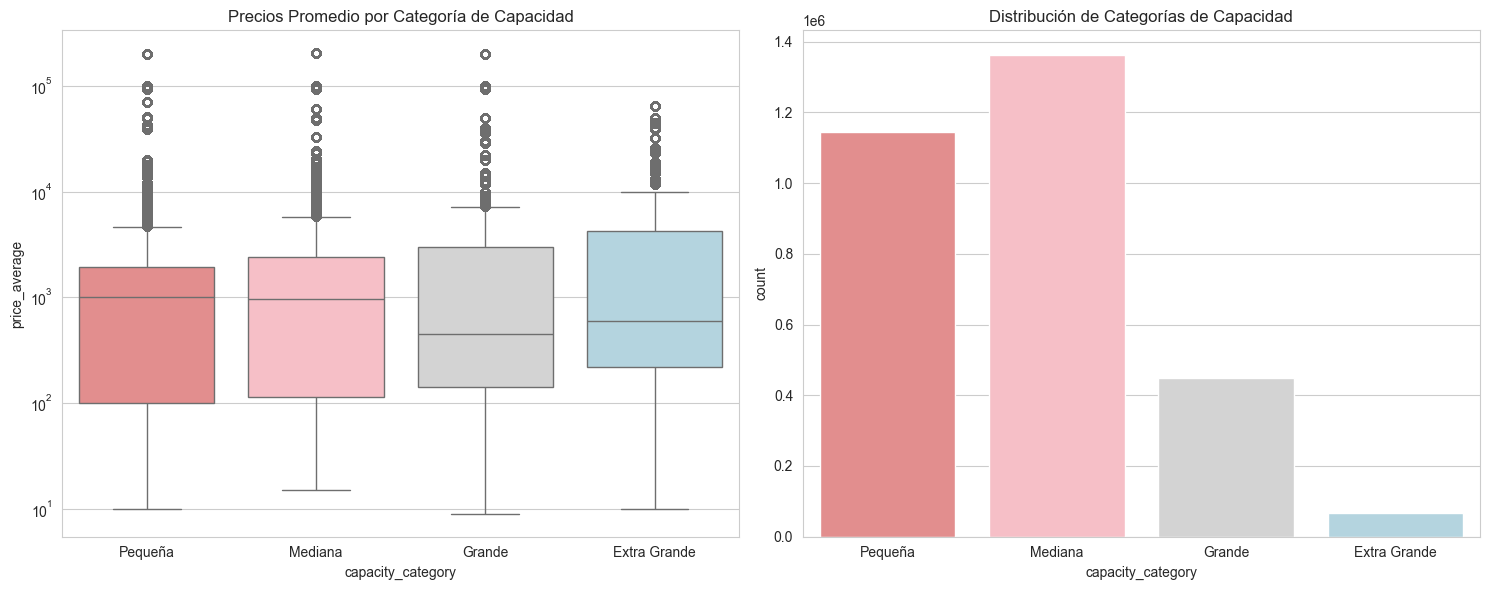

/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/288629335.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,
/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/288629335.py:62: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(data=df,
/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/288629335.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,
/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/288629335.py:72: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(data=df,


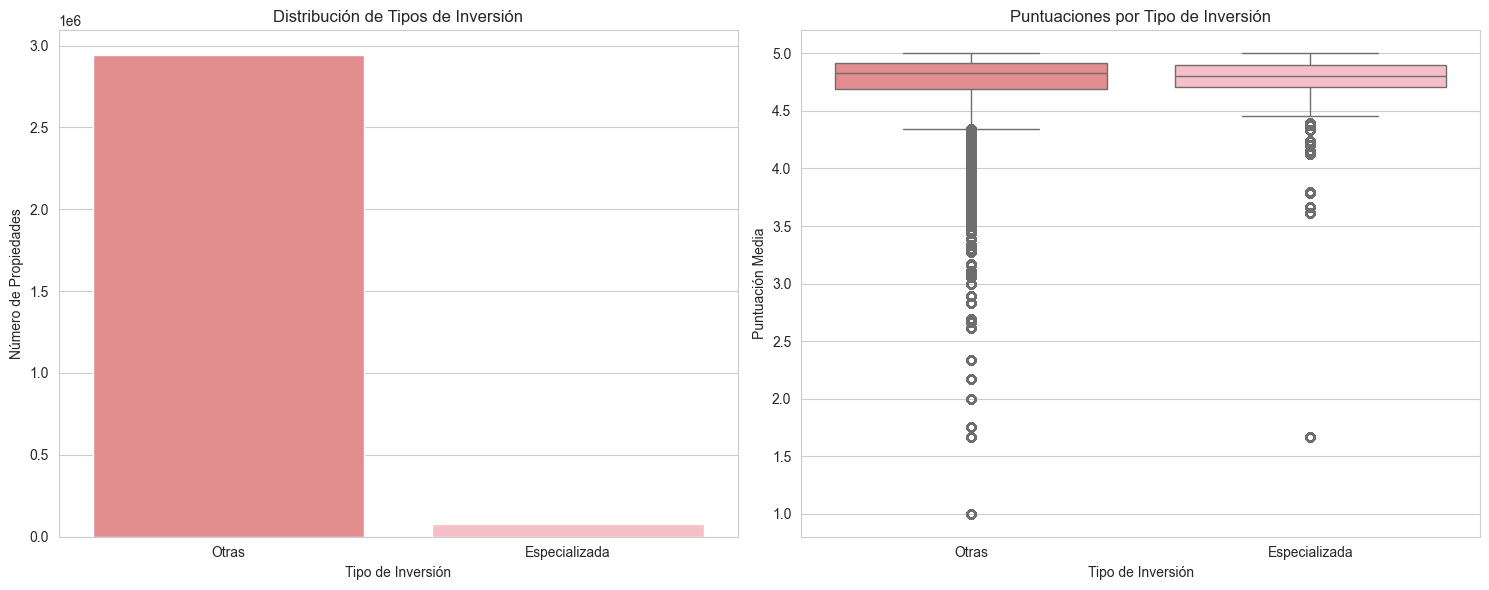

In [65]:
# 1. Análisis por Categorías de Precio

colors = ['lightcoral', 'lightpink', 'lightgray', 'lightblue']
def plot_price_categories(df):
    # Crear categorías de precio basadas en avg_price
    df['price_category'] = pd.cut(df['price_average'], 
                                  bins=[0, 200, 400, 1000, float('inf')],
                                  labels=['Económico', 'Medio', 'Premium', 'Lujo'])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Boxplot por categoría
    sns.boxplot(data=df, x='price_category', y='price_average', palette=colors, ax=ax1)
    ax1.set_title('Distribución de Precios Promedio por Categoría')
    ax1.set_yscale('log')
    
    # Countplot de categorías
    sns.countplot(data=df, x='price_category', palette=colors, ax=ax2)
    ax2.set_title('Número de Propiedades por Categoría de Precio Promedio')
    plt.tight_layout()
    plt.show()

# 2. Análisis por Capacidad
def plot_capacity_analysis(df):
    # Crear categorías de capacidad
    df['capacity_category'] = pd.cut(df['capacity_index'], 
                                     bins=[0, 5, 10, 20, float('inf')],
                                     labels=['Pequeña', 'Mediana', 'Grande', 'Extra Grande'])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Boxplot de precio promedio por categoría de capacidad
    sns.boxplot(data=df, x='capacity_category', y='price_average', palette=colors, ax=ax1)
    ax1.set_title('Precios Promedio por Categoría de Capacidad')
    ax1.set_yscale('log')
    
    # Distribución de categorías de capacidad
    sns.countplot(data=df, x='capacity_category', palette=colors, ax=ax2)
    ax2.set_title('Distribución de Categorías de Capacidad')
    plt.tight_layout()
    plt.show()

# 3. Análisis de Recomendaciones de Inversión
def plot_investment_recommendations(df):
    # Crear categorías de inversión con rangos ajustados basados en avg_price
    conditions = [
        (df['price_average'].between(50, 150) & 
         df['capacity_index'].between(2, 6) & 
         df['review_scores_avg'] > 4.5),
        (df['price_average'].between(150, 500) & 
         df['capacity_index'].between(6, 15) &
         df['review_scores_avg'] > 4.0),
        (df['price_average'] > 500) & 
        (df['capacity_index'] > 15)
    ]
    
    choices = ['Inversión Segura', 'Alto Retorno', 'Especializada']
    df['tipo_inversion'] = np.select(conditions, choices, default='Otras')
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    sns.countplot(data=df, 
                 x='tipo_inversion', 
                 palette=colors, 
                 ax=ax1,
                 order=df['tipo_inversion'].value_counts().index)
    
    ax1.set_title('Distribución de Tipos de Inversión')
    ax1.set_xlabel('Tipo de Inversión')
    ax1.set_ylabel('Número de Propiedades')
    
    sns.boxplot(data=df, 
                x='tipo_inversion', 
                y='review_scores_avg', 
                palette=colors, 
                ax=ax2,
                order=df['tipo_inversion'].value_counts().index)
    
    ax2.set_title('Puntuaciones por Tipo de Inversión')
    ax2.set_xlabel('Tipo de Inversión')
    ax2.set_ylabel('Puntuación Media')
    
    plt.tight_layout()
    plt.show()

# Llamar a las funciones para generar los gráficos
plot_price_categories(merged_df)
plot_capacity_analysis(merged_df)
plot_investment_recommendations(merged_df)

/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/4190266301.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_category', y='price', palette=colors, ax=ax1)
/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/4190266301.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='price_category', palette=colors, ax=ax2)


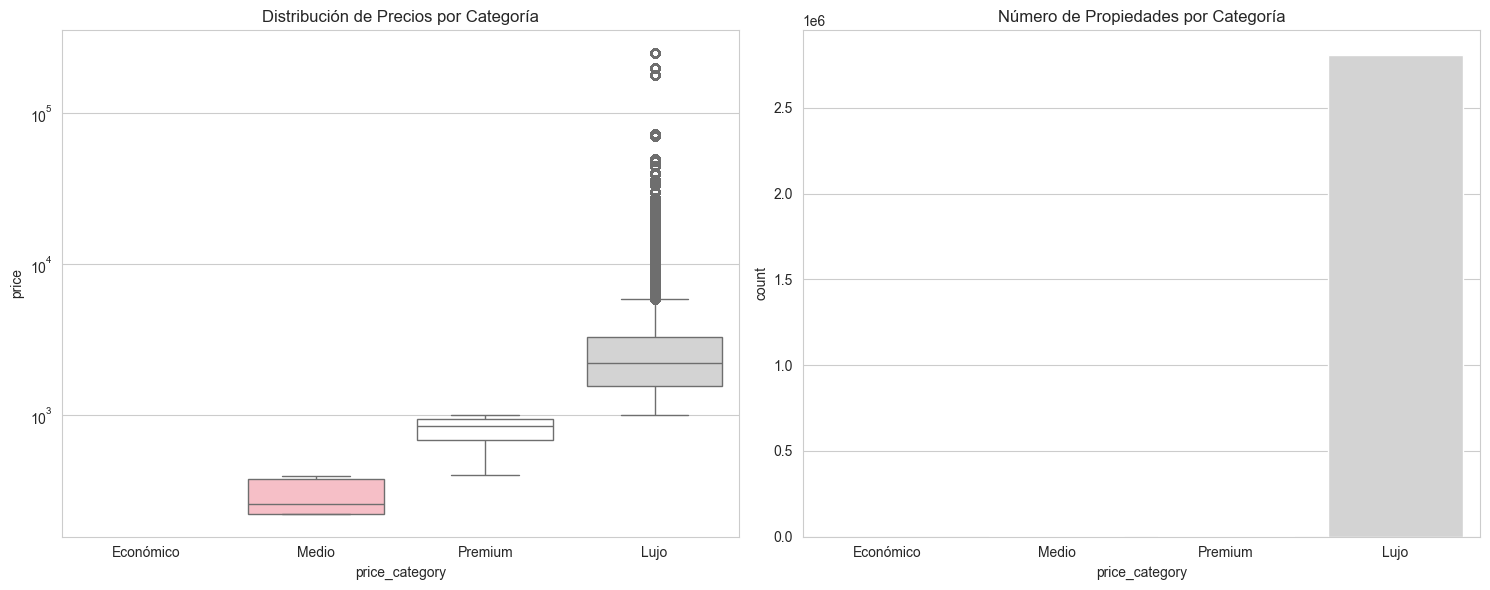

/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/4190266301.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='capacity_category', y='price', palette=colors, ax=ax1)
/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/4190266301.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='capacity_category', palette=colors, ax=ax2)


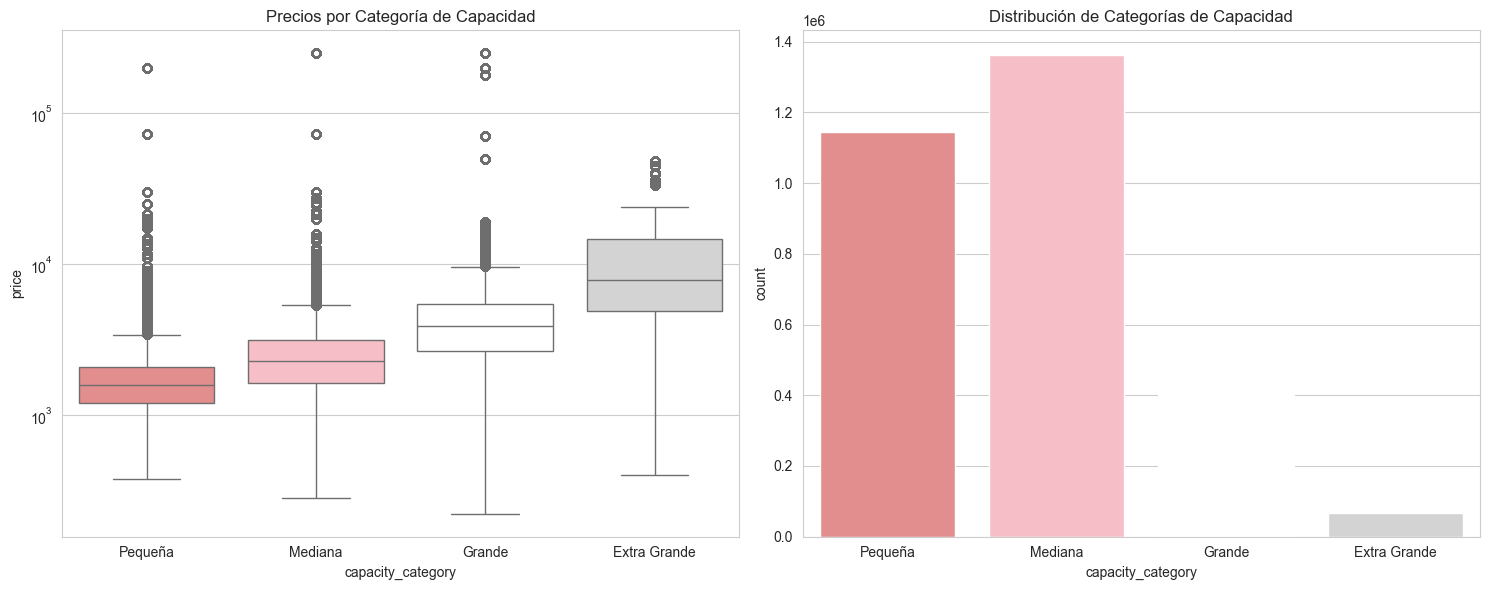

/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/4190266301.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,
/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/4190266301.py:78: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.countplot(data=df,
/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/4190266301.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,
/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/4190266301.py:89: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(data=df,


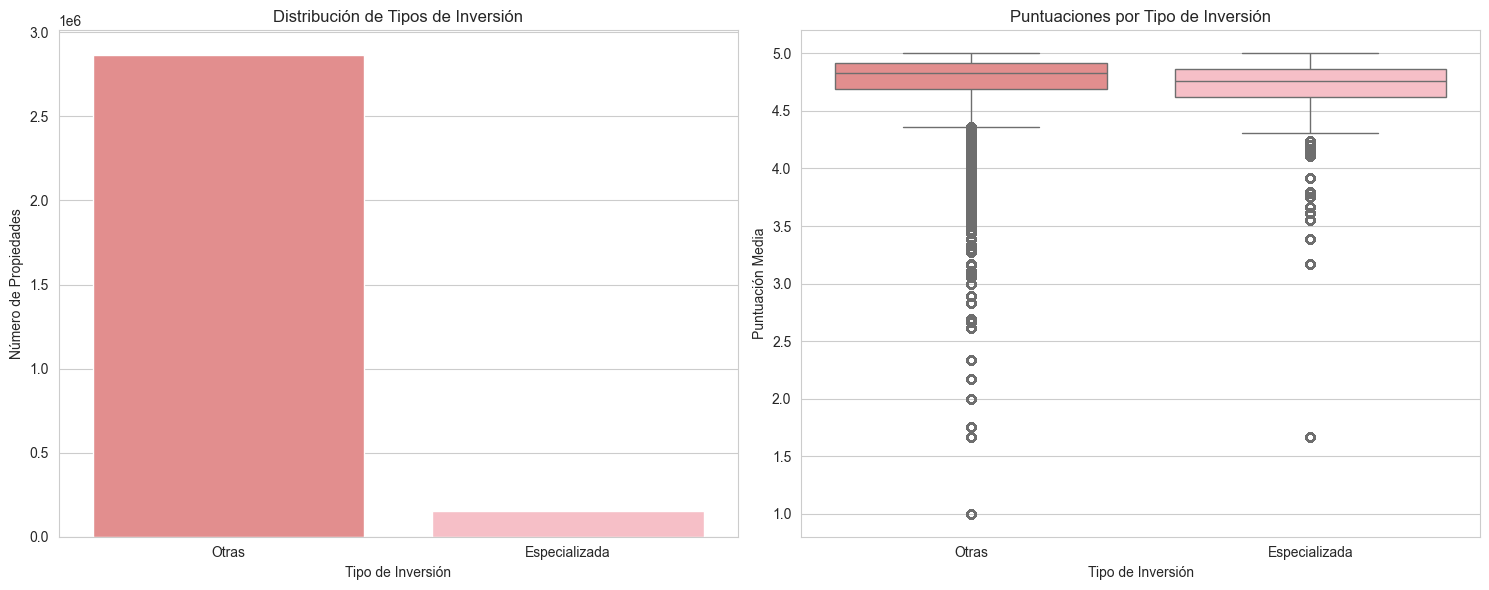

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Definir la paleta de colores
colors = ['lightcoral', 'lightpink', 'white', 'lightgray']

# 1. Análisis por Categorías de Precio
def plot_price_categories(df):
    # Crear categorías de precio
    df['price_category'] = pd.cut(df['price'], 
                                  bins=[0, 200, 400, 1000, float('inf')],
                                  labels=['Económico', 'Medio', 'Premium', 'Lujo'])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Boxplot por categoría
    sns.boxplot(data=df, x='price_category', y='price', palette=colors, ax=ax1)
    ax1.set_title('Distribución de Precios por Categoría')
    ax1.set_yscale('log')
    
    # Countplot de categorías
    sns.countplot(data=df, x='price_category', palette=colors, ax=ax2)
    ax2.set_title('Número de Propiedades por Categoría')
    plt.tight_layout()
    plt.show()

# 2. Análisis por Capacidad
def plot_capacity_analysis(df):
    # Crear categorías de capacidad
    df['capacity_category'] = pd.cut(df['capacity_index'], 
                                     bins=[0, 5, 10, 20, float('inf')],
                                     labels=['Pequeña', 'Mediana', 'Grande', 'Extra Grande'])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Boxplot de precio por categoría de capacidad
    sns.boxplot(data=df, x='capacity_category', y='price', palette=colors, ax=ax1)
    ax1.set_title('Precios por Categoría de Capacidad')
    ax1.set_yscale('log')
    
    # Distribución de categorías de capacidad
    sns.countplot(data=df, x='capacity_category', palette=colors, ax=ax2)
    ax2.set_title('Distribución de Categorías de Capacidad')
    plt.tight_layout()
    plt.show()

# 3. Análisis de Recomendaciones de Inversión
def plot_investment_recommendations(df):
    # Crear categorías de inversión con rangos ajustados
    conditions = [
        # Inversión Segura: precios más bajos, capacidad moderada, buenas reseñas
        (df['price'].between(50, 150) & 
         df['capacity_index'].between(2, 6) & 
         df['review_scores_avg'] > 4.5),
        
        # Alto Retorno: precios medios, capacidad media-alta
        (df['price'].between(150, 500) & 
         df['capacity_index'].between(6, 15) &
         df['review_scores_avg'] > 4.0),
        
        # Especializada: precios altos, alta capacidad
        (df['price'] > 500) & 
        (df['capacity_index'] > 15)
    ]
    
    choices = ['Inversión Segura', 'Alto Retorno', 'Especializada']
    df['tipo_inversion'] = np.select(conditions, choices, default='Otras')
    
    # Crear subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Paleta de colores personalizada
    colors = ['lightcoral', 'lightpink', 'lightgray', 'white']
    
    # Gráfico de distribución de tipos de inversión
    sns.countplot(data=df, 
                 x='tipo_inversion', 
                 palette=colors, 
                 ax=ax1,
                 order=df['tipo_inversion'].value_counts().index)
    
    ax1.set_title('Distribución de Tipos de Inversión')
    ax1.set_xlabel('Tipo de Inversión')
    ax1.set_ylabel('Número de Propiedades')
    
    # Boxplot de puntuaciones por tipo de inversión
    sns.boxplot(data=df, 
                x='tipo_inversion', 
                y='review_scores_avg', 
                palette=colors, 
                ax=ax2,
                order=df['tipo_inversion'].value_counts().index)
    
    ax2.set_title('Puntuaciones por Tipo de Inversión')
    ax2.set_xlabel('Tipo de Inversión')
    ax2.set_ylabel('Puntuación Media')
    
    # Ajustar el diseño
    plt.tight_layout()
    plt.show()



# Crear los gráficos de categorías de precio
plot_price_categories(merged_df)

# Crear los gráficos de análisis de capacidad
plot_capacity_analysis(merged_df)

# Crear los gráficos de recomendaciones de inversión
plot_investment_recommendations(merged_df)

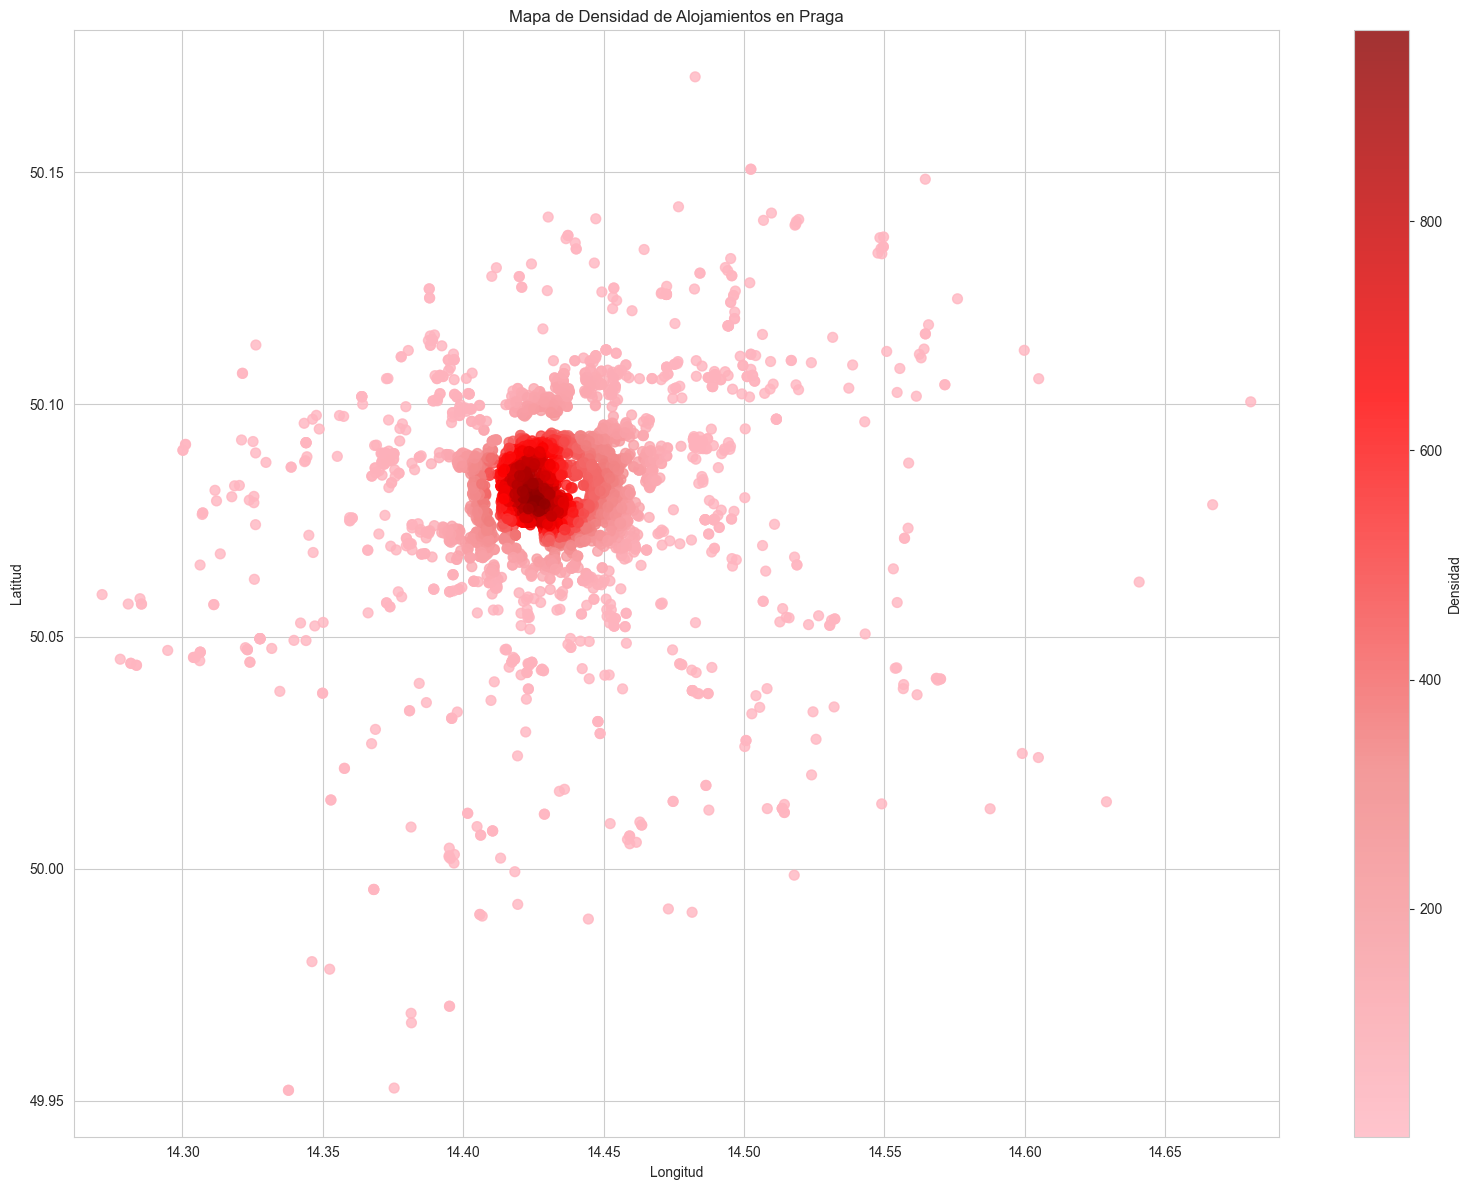

In [78]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Reducir la muestra para mejor rendimiento
n_samples = min(5000, len(merged_df))
sample_df = merged_df.sample(n=n_samples, random_state=42)

# Crear el mapa
plt.figure(figsize=(16, 12))  # Aumentar el tamaño de la figura

# Calcular densidad con muestra reducida
xy = np.vstack([sample_df['longitude'], sample_df['latitude']])
z = gaussian_kde(xy, bw_method='silverman')(xy)

# Crear scatter plot con una paleta de colores sin blanco
plt.scatter(sample_df['longitude'], 
            sample_df['latitude'],
            c=z,
            s=50,  # Aumentar el tamaño de los puntos
            alpha=0.8,  # Aumentar la opacidad de los puntos
            cmap=mcolors.LinearSegmentedColormap.from_list('custom', 
                                                           ['lightpink', 'lightcoral', 'red', 'darkred']))

# Personalizar el mapa
plt.title('Mapa de Densidad de Alojamientos en Praga')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.colorbar(label='Densidad')

# Ajustar los límites de los ejes para una mejor visualización
plt.xlim(sample_df['longitude'].min() - 0.01, sample_df['longitude'].max() + 0.01)
plt.ylim(sample_df['latitude'].min() - 0.01, sample_df['latitude'].max() + 0.01)

# Optimizar renderizado
plt.rcParams['figure.dpi'] = 100
plt.tight_layout()
plt.show()

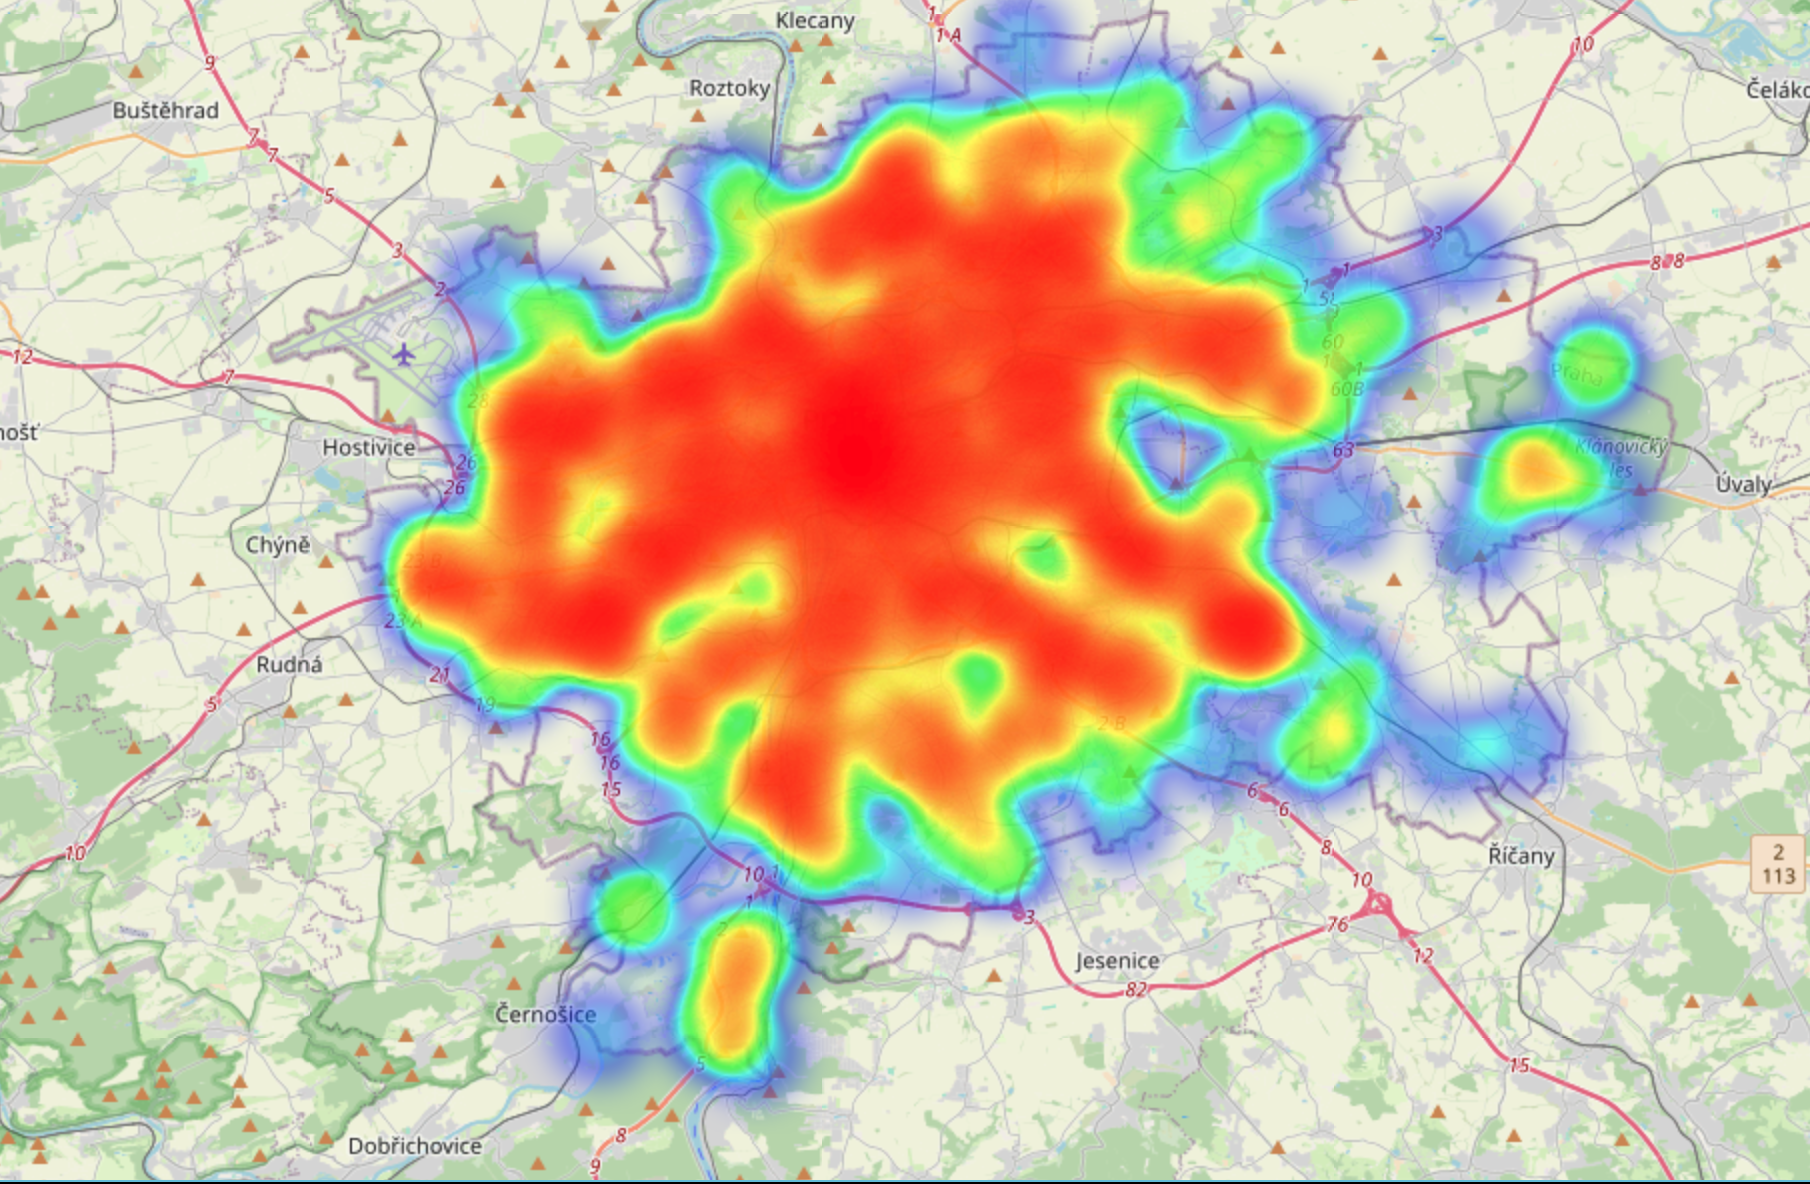

In [1]:
from IPython.display import Image

# Mostrar una imagen en el notebook
Image(filename='Captura de pantalla 2024-12-03 a las 17.57.26.png')

In [68]:
import pandas as pd
import numpy as np
from math import radians, sin, cos, sqrt, atan2

def haversine_distance_vectorized(lat1, lon1, lat2, lon2):
    """Versión vectorizada del cálculo de distancia Haversine"""
    R = 6371.0
    
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Definir puntos de interés principales (reducidos a los más relevantes)
points_of_interest = {
    'Centro_Historico': (50.0875, 14.4213),
    'Aeropuerto': (50.1008, 14.2600),
    'Centro_Negocios': (50.0789, 14.4394)
}

def calculate_distances_optimized(df):
    """Calcula las distancias de forma vectorizada"""
    for poi_name, (poi_lat, poi_lon) in points_of_interest.items():
        df[f'dist_{poi_name}'] = haversine_distance_vectorized(
            df['latitude'].values,
            df['longitude'].values,
            poi_lat,
            poi_lon
        )
    return df

# Categorización vectorizada
def categorize_distances_vectorized(df):
    """Categoriza las distancias de forma vectorizada"""
    bins = [0, 1, 3, 5, np.inf]
    labels = ['Muy Cerca', 'Cerca', 'Moderado', 'Lejos']
    
    for poi_name in points_of_interest.keys():
        df[f'proximidad_{poi_name}'] = pd.cut(
            df[f'dist_{poi_name}'],
            bins=bins,
            labels=labels
        )
    return df

# Función principal optimizada
def process_locations_fast(df):
    df = calculate_distances_optimized(df)
    df = categorize_distances_vectorized(df)
    return df

/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/3971505097.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=f'proximidad_{poi_name}', y='price', palette=colors)


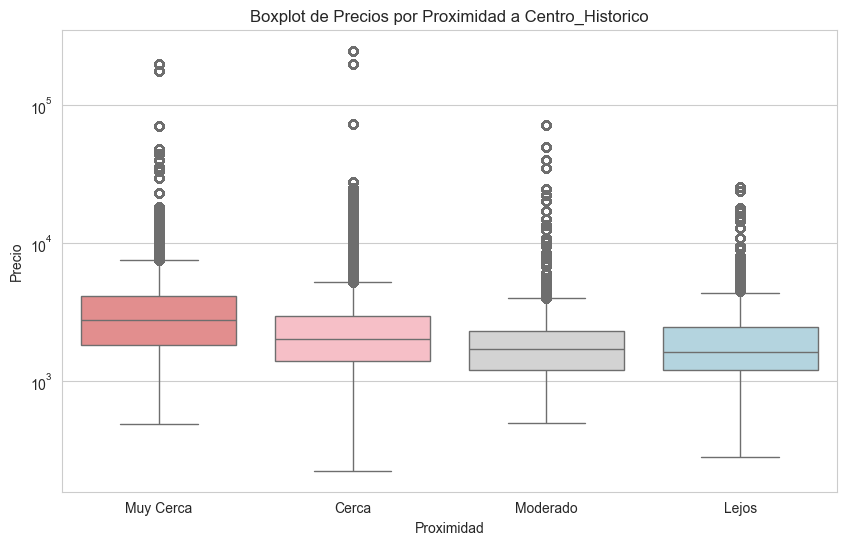

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


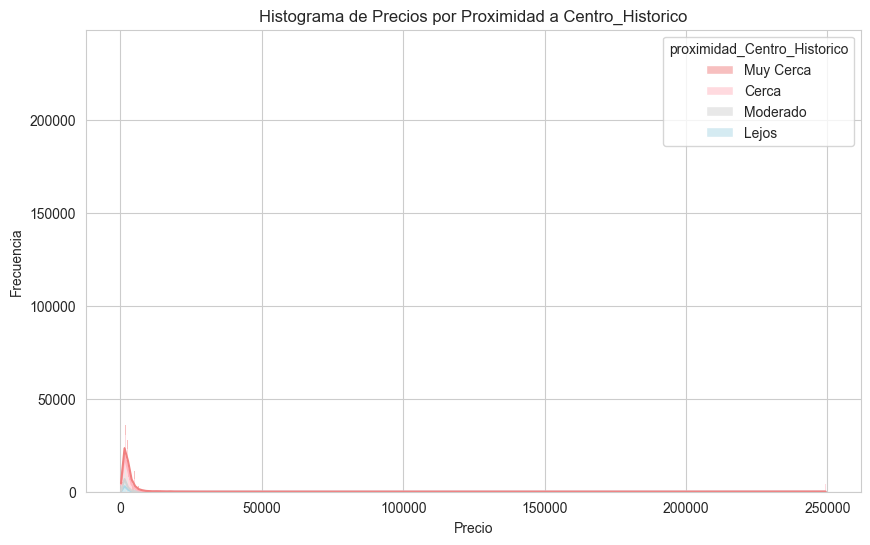

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


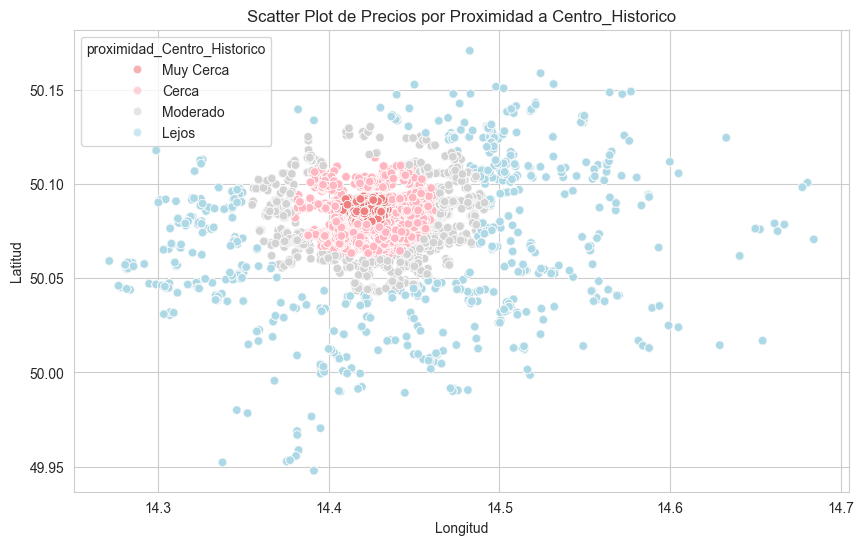

/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/3971505097.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=f'proximidad_{poi_name}', y='price', palette=colors)


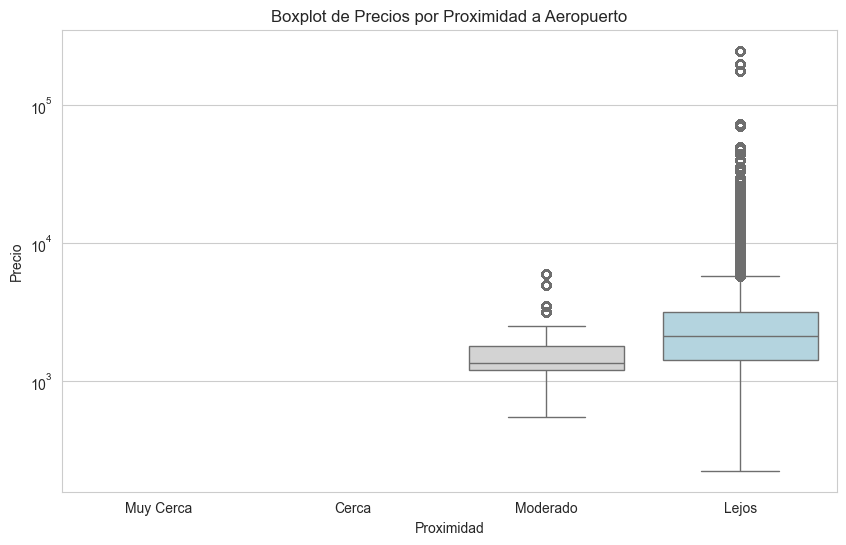

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


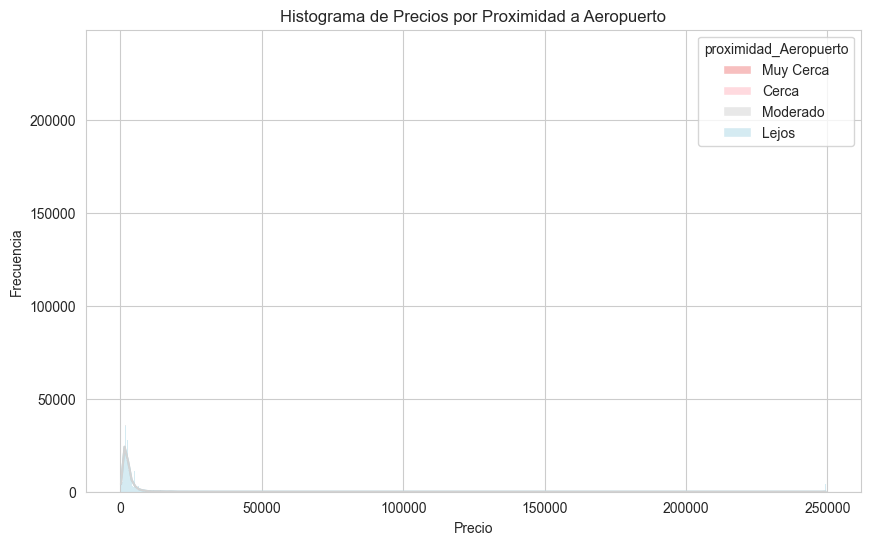

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


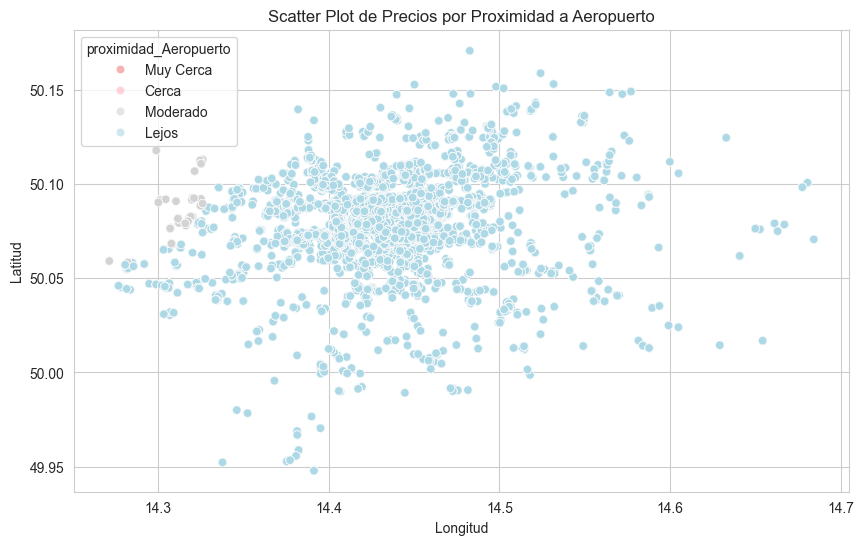

/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/3971505097.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=f'proximidad_{poi_name}', y='price', palette=colors)


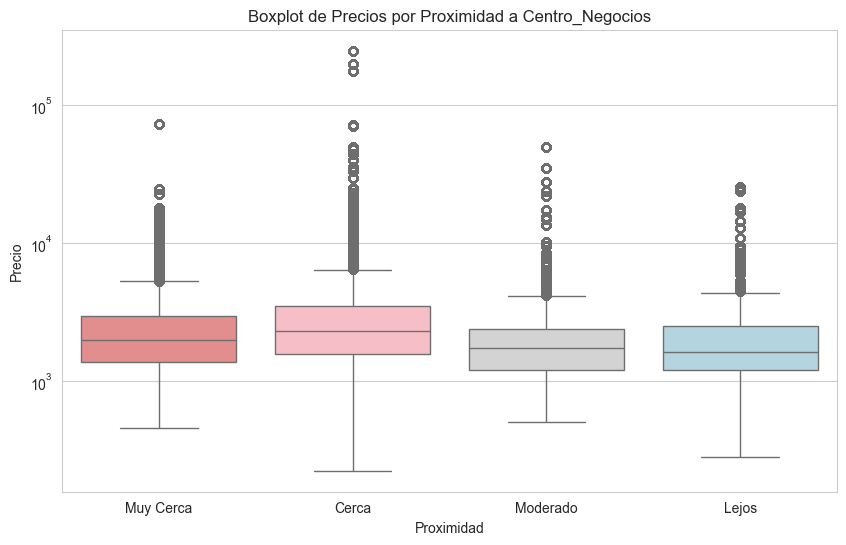

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


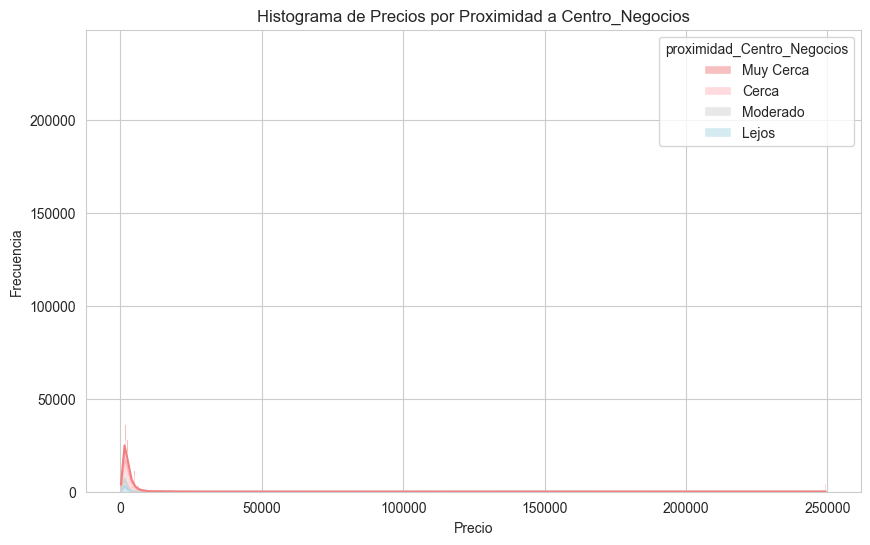

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


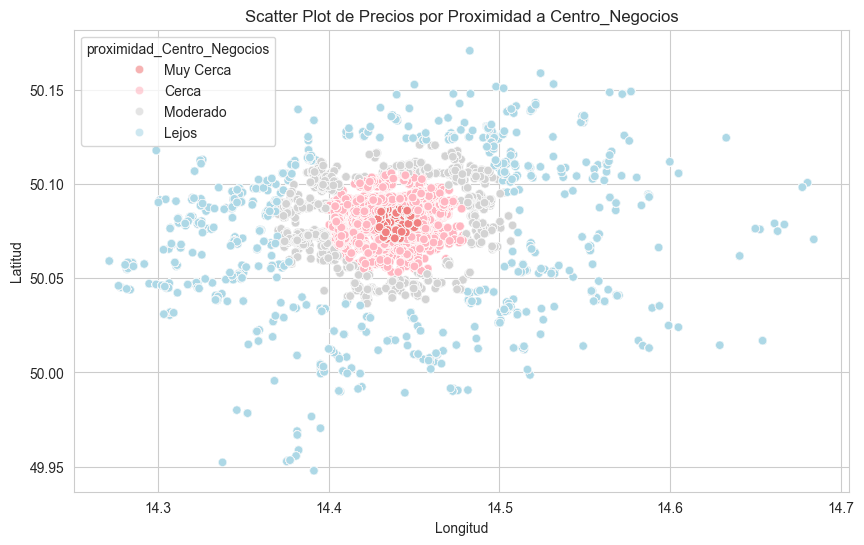

In [90]:
import seaborn as sns

import matplotlib.pyplot as plt

# Establecer paleta de colores personalizada
colors = ['lightcoral', 'lightpink', 'lightgray', 'lightblue']
sns.set_palette(colors)
sns.set_style("whitegrid")

# Función para crear boxplots
def plot_boxplots(df, poi_name):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=f'proximidad_{poi_name}', y='price', palette=colors)
    plt.title(f'Boxplot de Precios por Proximidad a {poi_name}')
    plt.yscale('log')
    plt.xlabel('Proximidad')
    plt.ylabel('Precio')
    plt.show()



# Función para crear scatter plots
# Asegurarse de que las columnas de proximidad estén creadas
merged_df = process_locations_fast(merged_df)

def plot_scatter(df, poi_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='longitude', y='latitude', hue=f'proximidad_{poi_name}', palette=colors, alpha=0.6)
    plt.title(f'Scatter Plot de Precios por Proximidad a {poi_name}')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.show()

# Crear gráficos para cada punto de interés
for poi_name in points_of_interest.keys():
    plot_boxplots(merged_df, poi_name)
    plot_histograms(merged_df, poi_name)
    plot_scatter(merged_df, poi_name)

In [81]:
# Crear categorías de precio basadas en la columna 'price'
merged_df['price_category'] = pd.cut(merged_df['price'], 
                                     bins=[0, 200, 400, 1000, float('inf')],
                                     labels=['Económica', 'Media', 'Premium', 'Lujo'])

# Verificar la distribución de las categorías de precio
print(merged_df['price_category'].value_counts())

# Mostrar una muestra del DataFrame con la nueva columna de categorías de precio
display(merged_df.head())

price_category
Lujo         2811572
Premium       209145
Media           2190
Económica          0
Name: count, dtype: int64


id                          name host_id host_name  \
0  23163  Residence Karolina - KAROL12    5282     Klara   
1  23163  Residence Karolina - KAROL12    5282     Klara   
2  23163  Residence Karolina - KAROL12    5282     Klara   
3  23163  Residence Karolina - KAROL12    5282     Klara   
4  23163  Residence Karolina - KAROL12    5282     Klara   

  neighbourhood_cleansed  latitude  longitude       property_type  \
0                Praha 1  50.08229   14.41552  Entire rental unit   
1                Praha 1  50.08229   14.41552  Entire rental unit   
2                Praha 1  50.08229   14.41552  Entire rental unit   
3                Praha 1  50.08229   14.41552  Entire rental unit   
4                Praha 1  50.08229   14.41552  Entire rental unit   

         room_type   price  number_of_reviews  review_scores_location  \
0  Entire home/apt  1200.0                 31                    4.93   
1  Entire home/apt  1200.0                 31                    4.93   
2  Entire home/apt  1200.0                 31                    4.93   
3  Entire home/apt  1200.0                 31                    4.93   
4  Entire home/apt  1200.0                 31                    4.93   

   instant_bookable listing_id_x       date  price_average available  \
0              True        23163 2024-06-24          156.0         f   
1              True        23163 2024-06-25          156.0         f   
2              True        23163 2024-06-26          156.0         f   
3              True        23163 2024-06-27          156.0         f   
4              True        23163 2024-06-28          156.0         f   

  listing_id_y  review_count  review_scores_avg  capacity_index  \
0        23163            31           4.926667             6.5   
1        23163            31           4.926667             6.5   
2        23163            31           4.926667             6.5   
3        23163            31           4.926667             6.5   
4        23163            31           4.926667             6.5   

  price_category capacity_category tipo_inversion  dist_Centro_Historico  \
0           Lujo           Mediana          Otras               0.711117   
1           Lujo           Mediana          Otras               0.711117   
2           Lujo           Mediana          Otras               0.711117   
3           Lujo           Mediana          Otras               0.711117   
4           Lujo           Mediana          Otras               0.711117   

   dist_Aeropuerto  dist_Centro_Negocios proximidad_Centro_Historico  \
0        11.283867               1.74515                   Muy Cerca   
1        11.283867               1.74515                   Muy Cerca   
2        11.283867               1.74515                   Muy Cerca   
3        11.283867               1.74515                   Muy Cerca   
4        11.283867               1.74515                   Muy Cerca   

  proximidad_Aeropuerto proximidad_Centro_Negocios  
0                 Lejos                      Cerca  
1                 Lejos                      Cerca  
2                 Lejos                      Cerca  
3                 Lejos                      Cerca  
4                 Lejos                      Cerca

## Analisis comparativo por categoria de proximidad y categoria de Precio

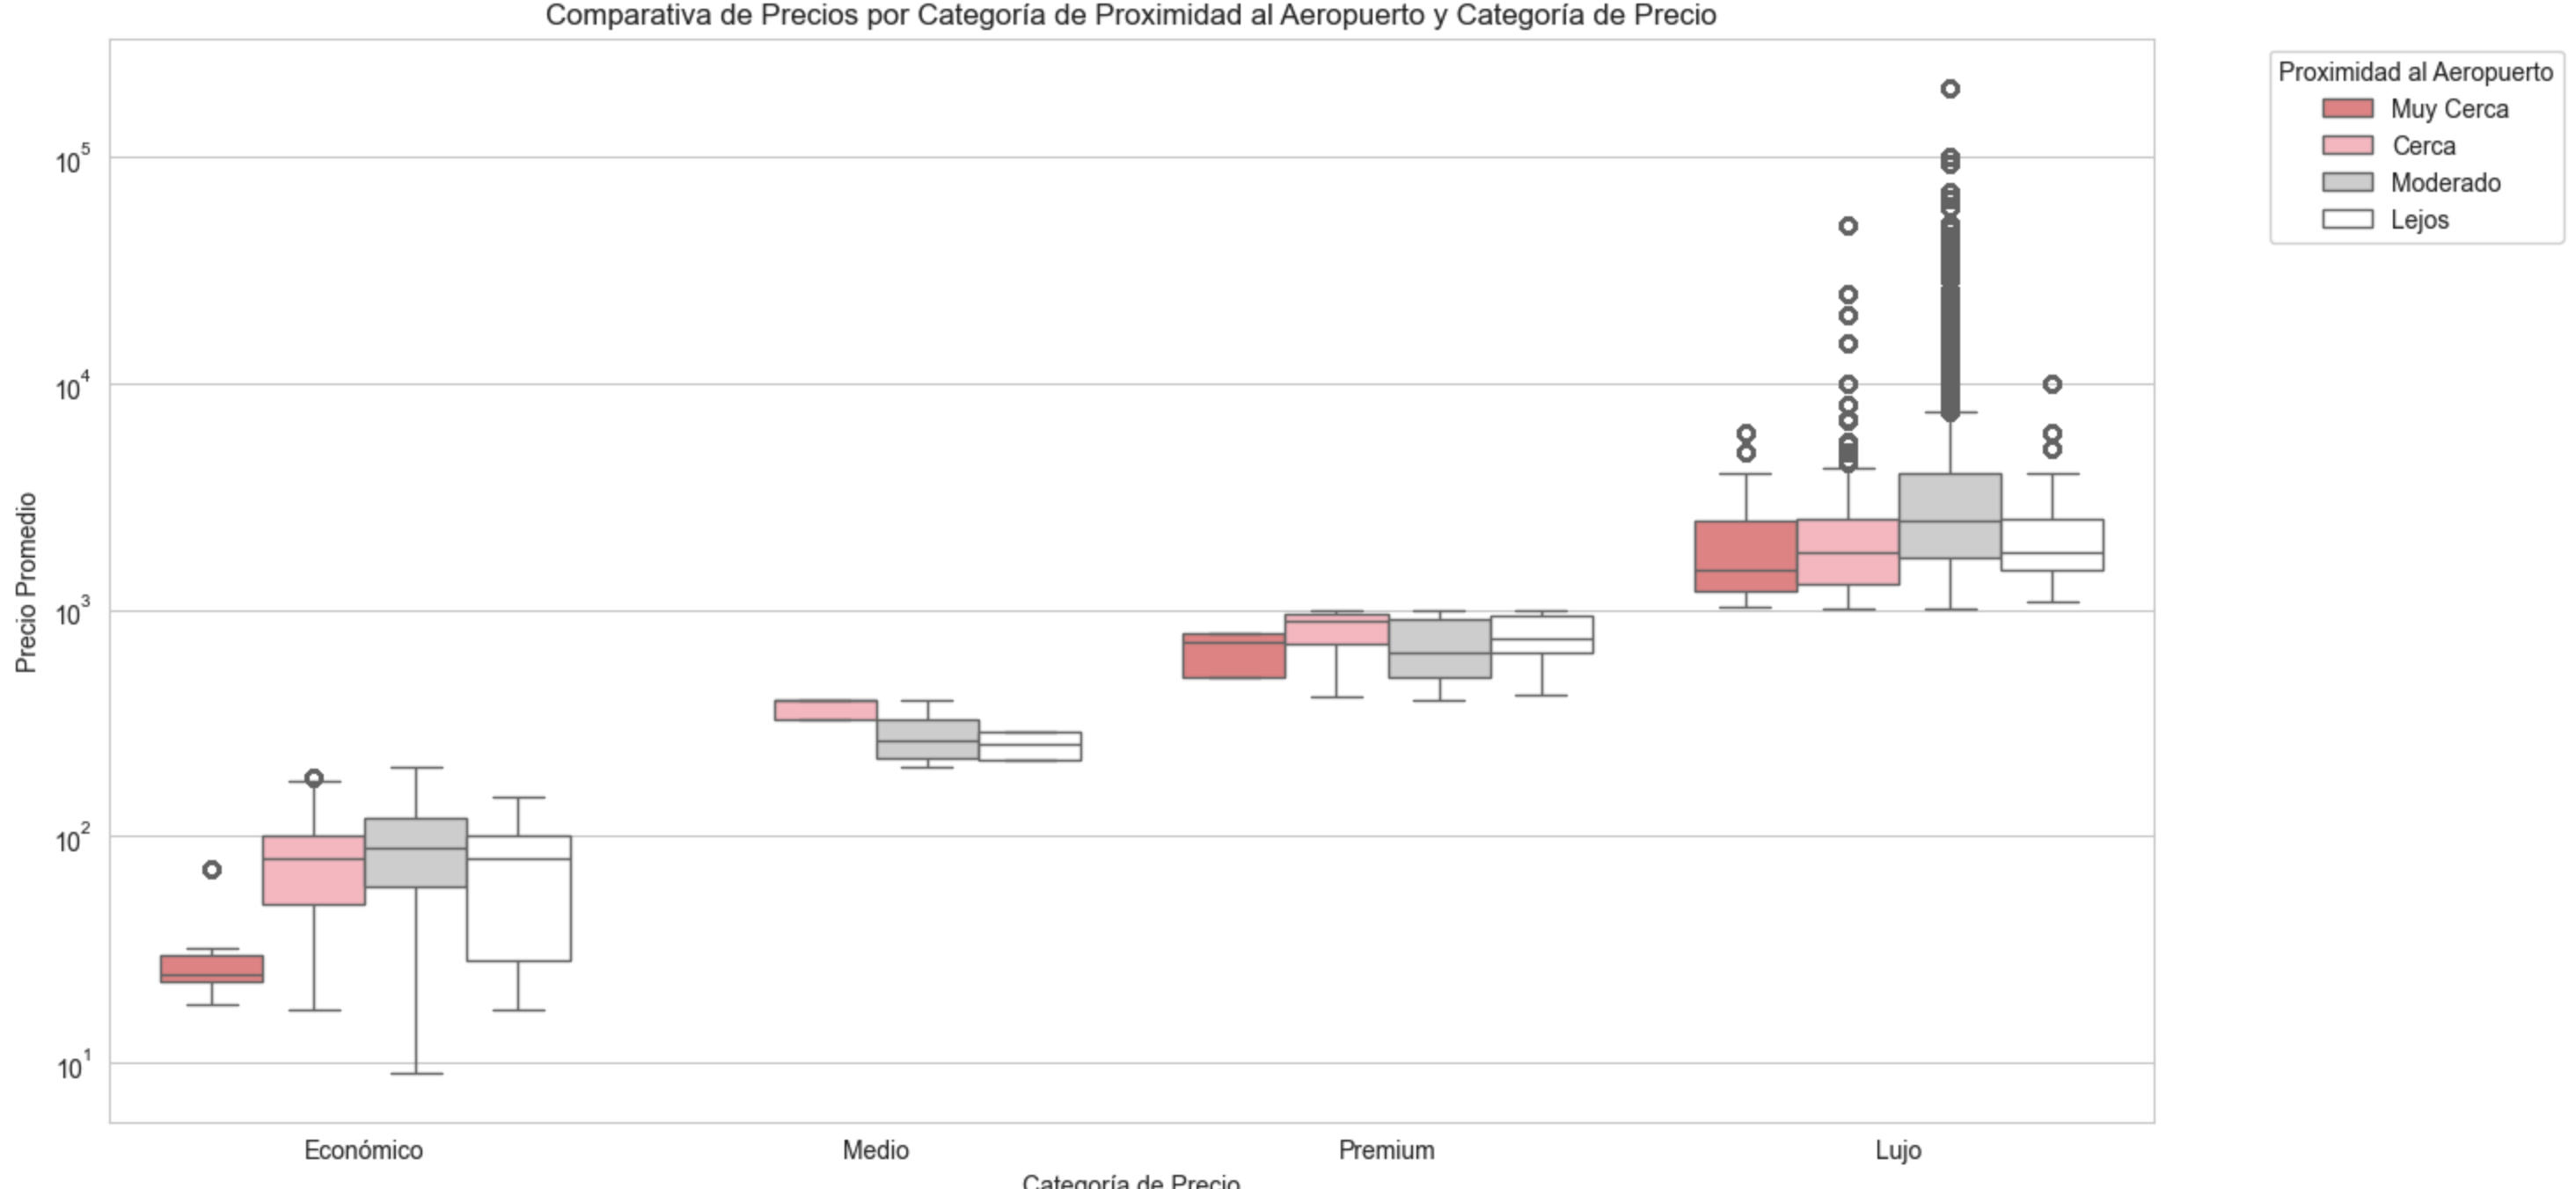

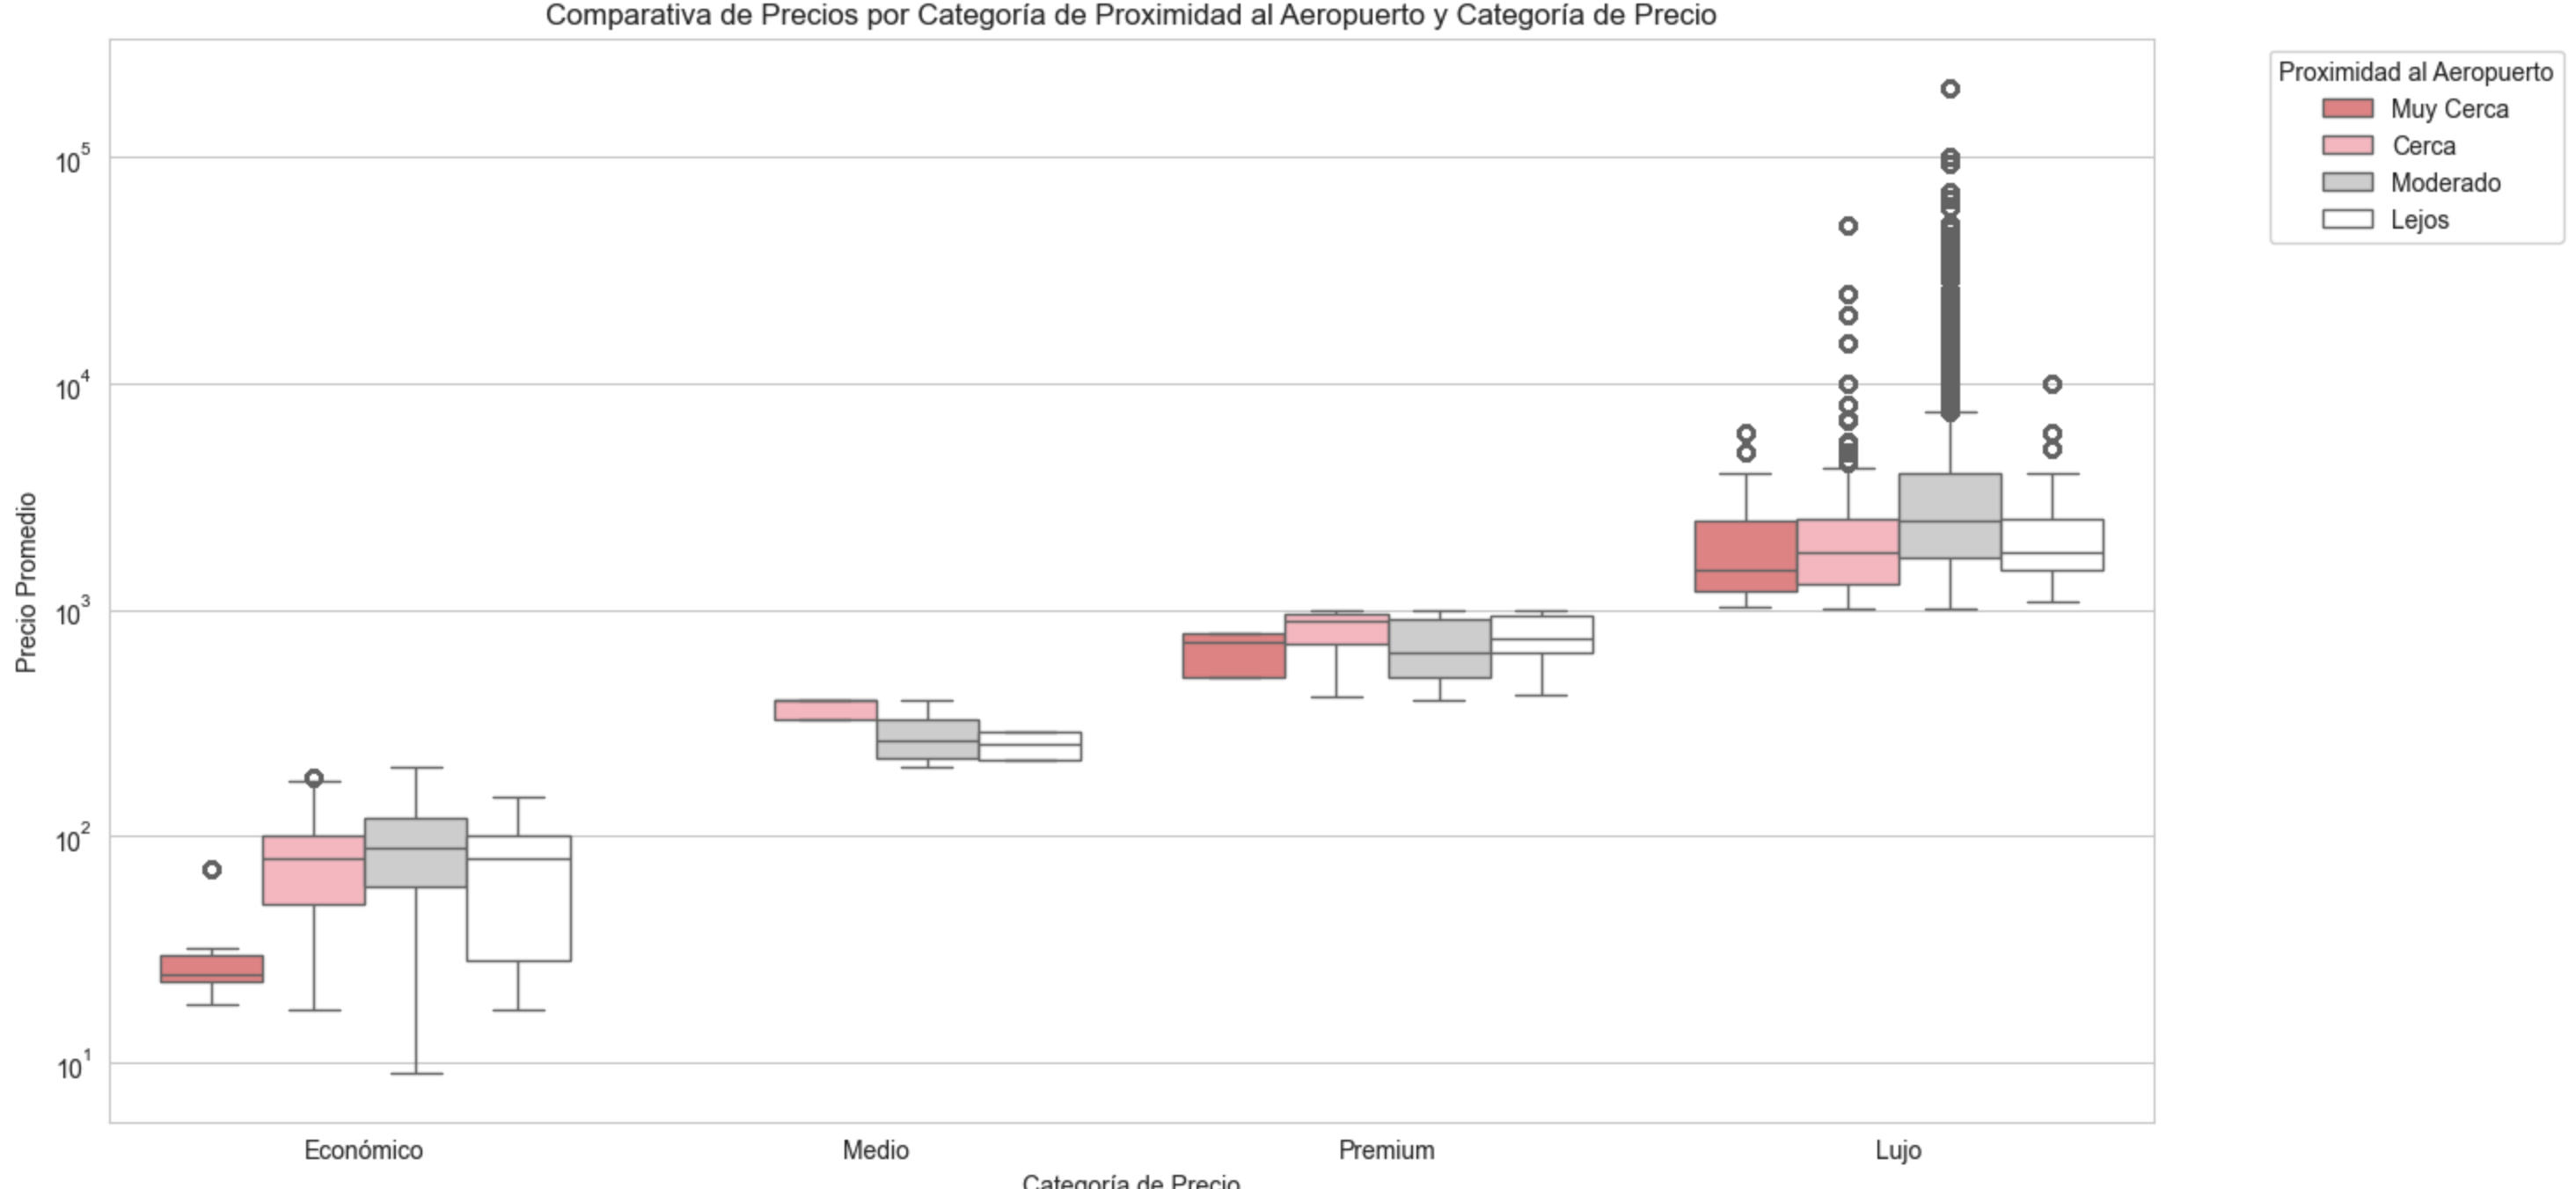

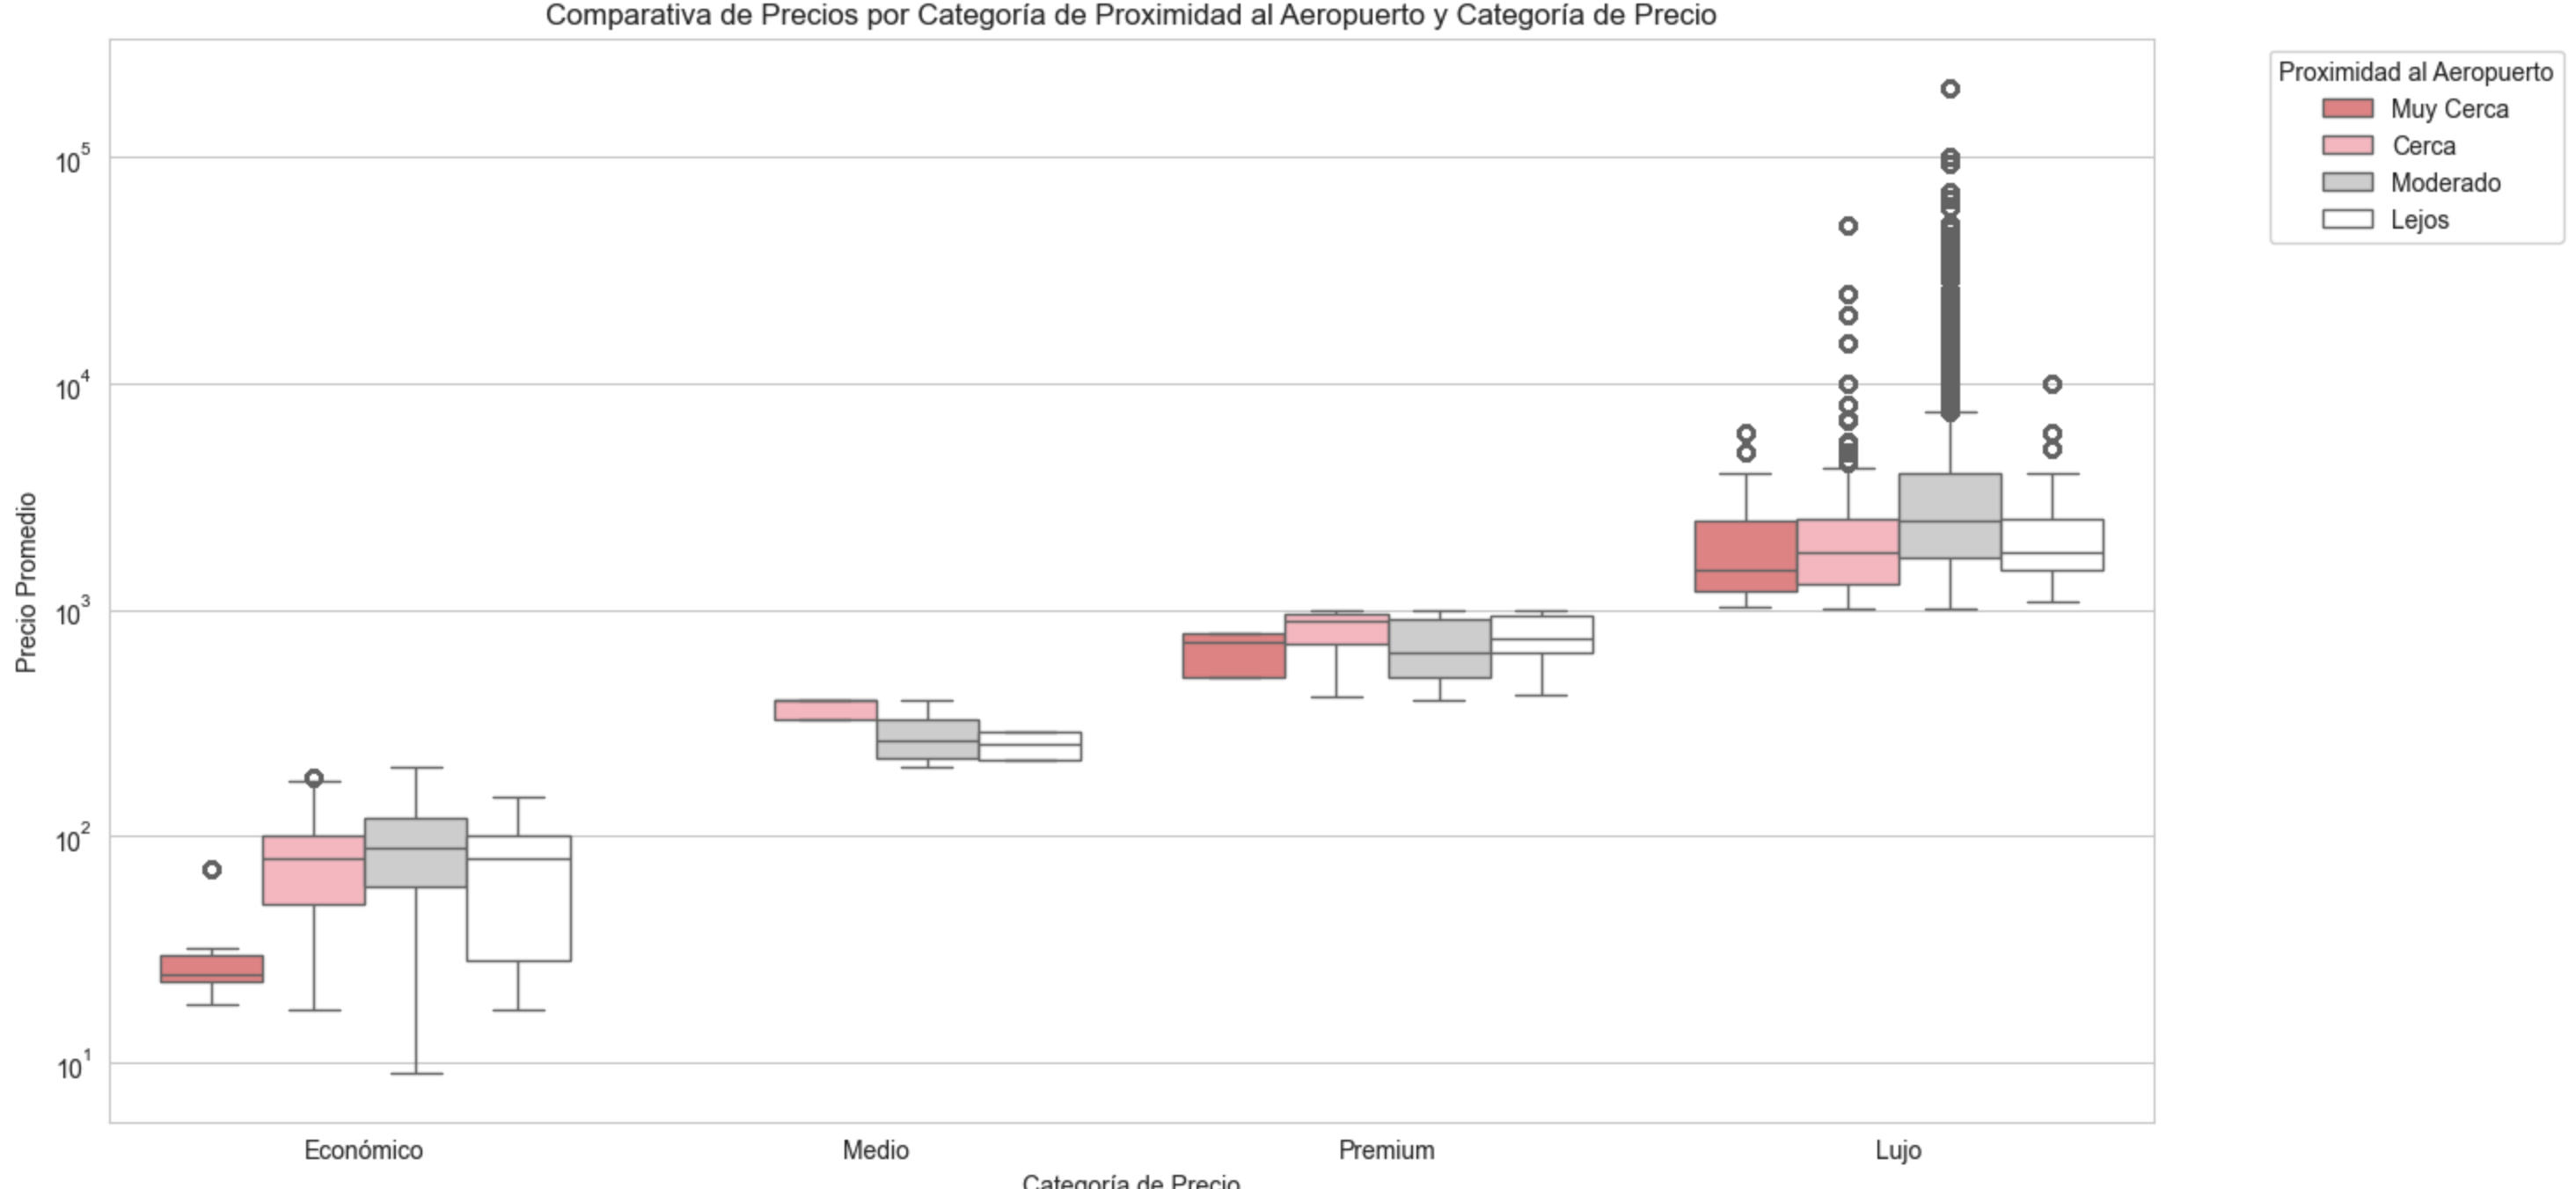

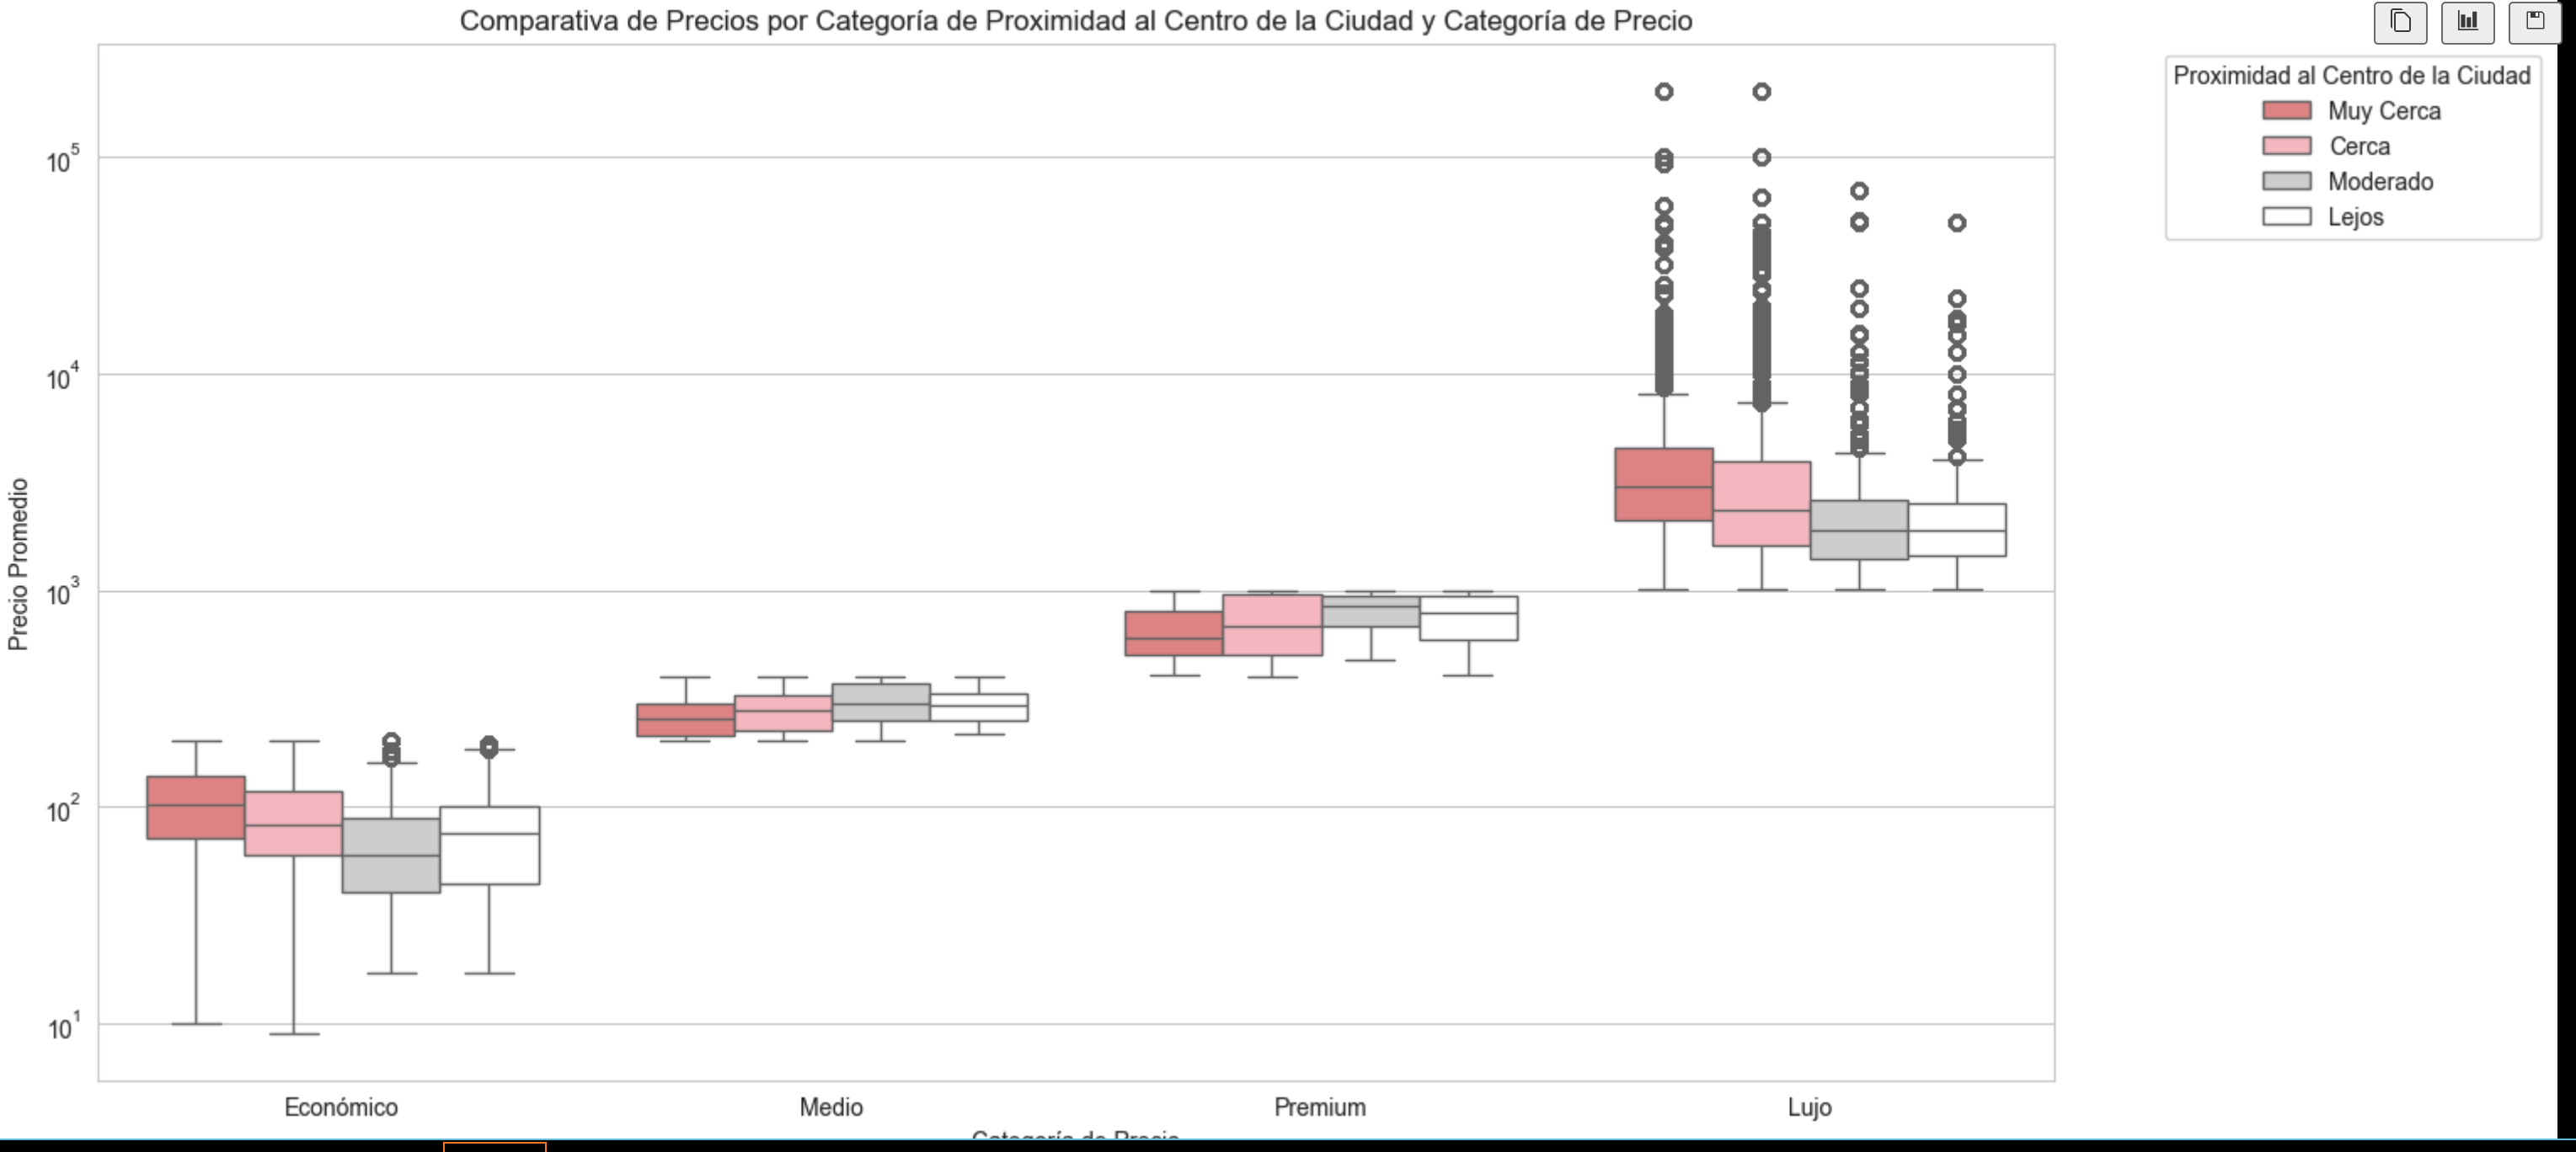

In [87]:
from IPython.display import Image, display

# Mostrar una imagen en el notebook
display(Image(filename='/Users/iborja/Desktop/AirbnbPraga/Captura de pantalla 2024-12-03 a las 18.03.28.png'))

# Mostrar múltiples imágenes
images = [
    '/Users/iborja/Desktop/AirbnbPraga/Captura de pantalla 2024-12-03 a las 18.03.28.png', 
    '/Users/iborja/Desktop/AirbnbPraga/Captura de pantalla 2024-12-03 a las 18.03.28.png', 
    '/Users/iborja/Desktop/AirbnbPraga/Captura de pantalla 2024-12-03 a las 18.04.02.png'
]
for img in images:
    display(Image(filename=img))

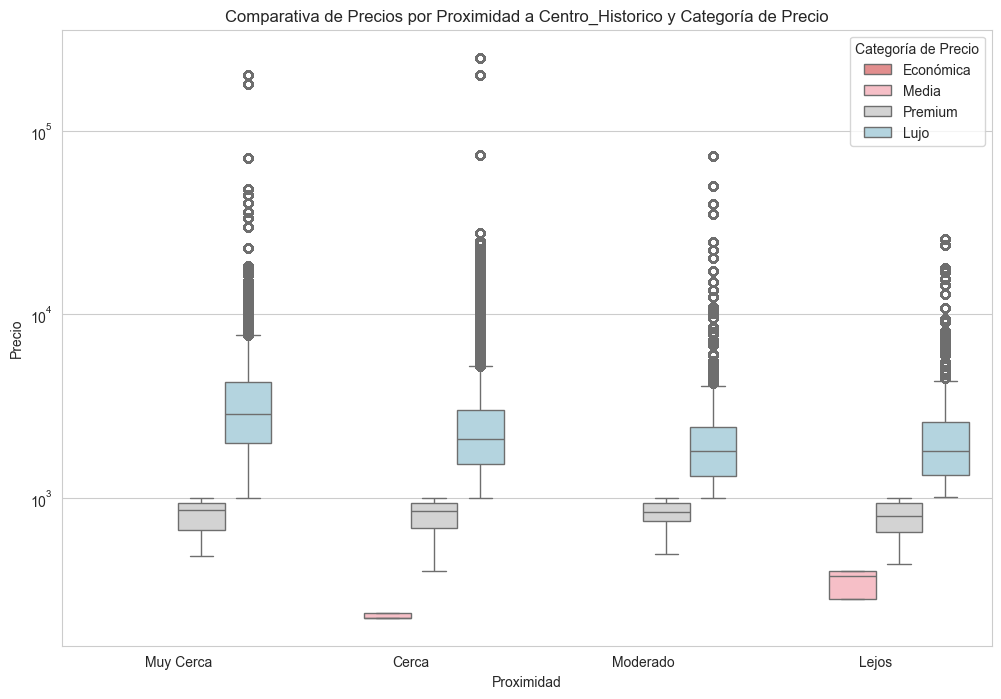

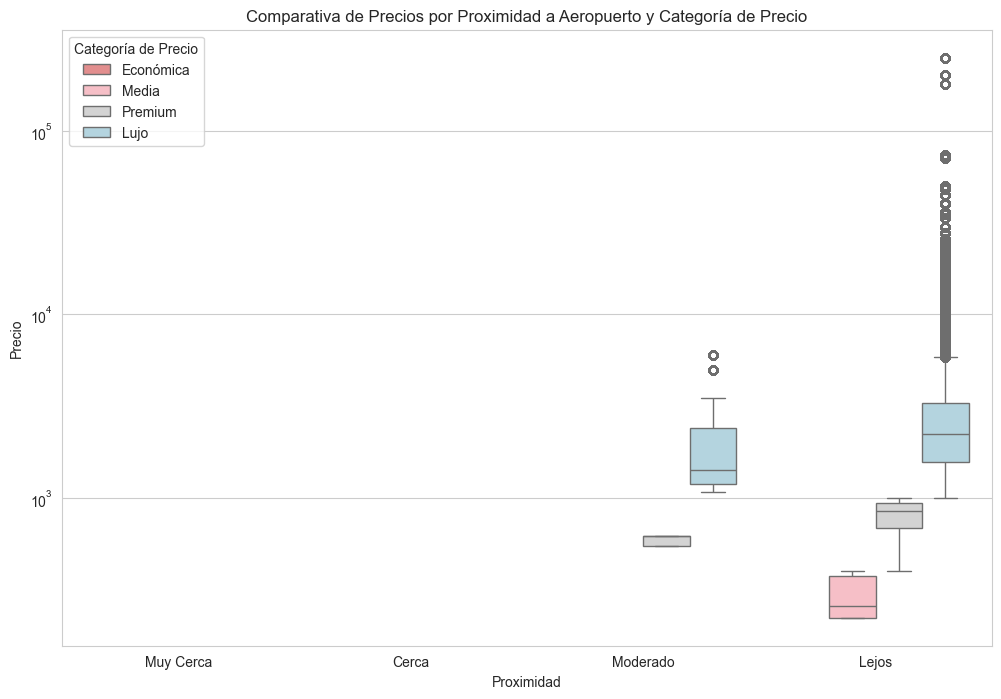

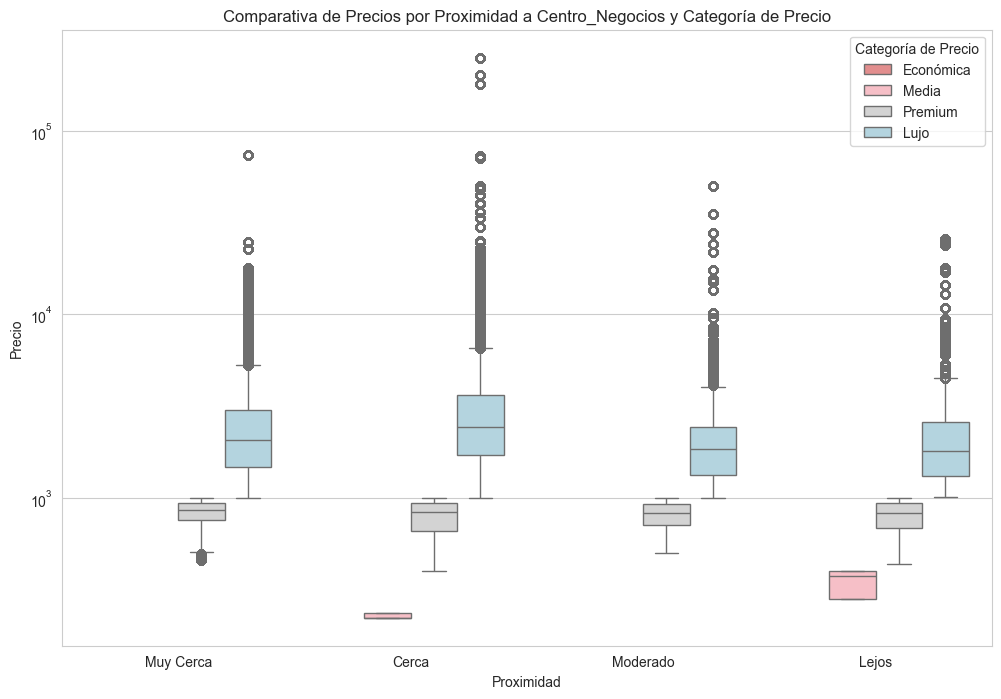

In [88]:
import seaborn as sns

import matplotlib.pyplot as plt

# Establecer paleta de colores personalizada
colors = ['lightcoral', 'lightpink', 'lightgray', 'lightblue']
sns.set_palette(colors)
sns.set_style("whitegrid")

# Función para crear boxplots comparativos
def plot_comparative_boxplots(df, poi_name):
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df, x=f'proximidad_{poi_name}', y='price', hue='price_category', palette=colors)
    plt.title(f'Comparativa de Precios por Proximidad a {poi_name} y Categoría de Precio')
    plt.yscale('log')
    plt.xlabel('Proximidad')
    plt.ylabel('Precio')
    plt.legend(title='Categoría de Precio')
    plt.show()

# Crear gráficos comparativos para cada punto de interés
for poi_name in points_of_interest.keys():
    plot_comparative_boxplots(merged_df, poi_name)

/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/2665361958.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='capacity_category', y='price_average', palette=colors)


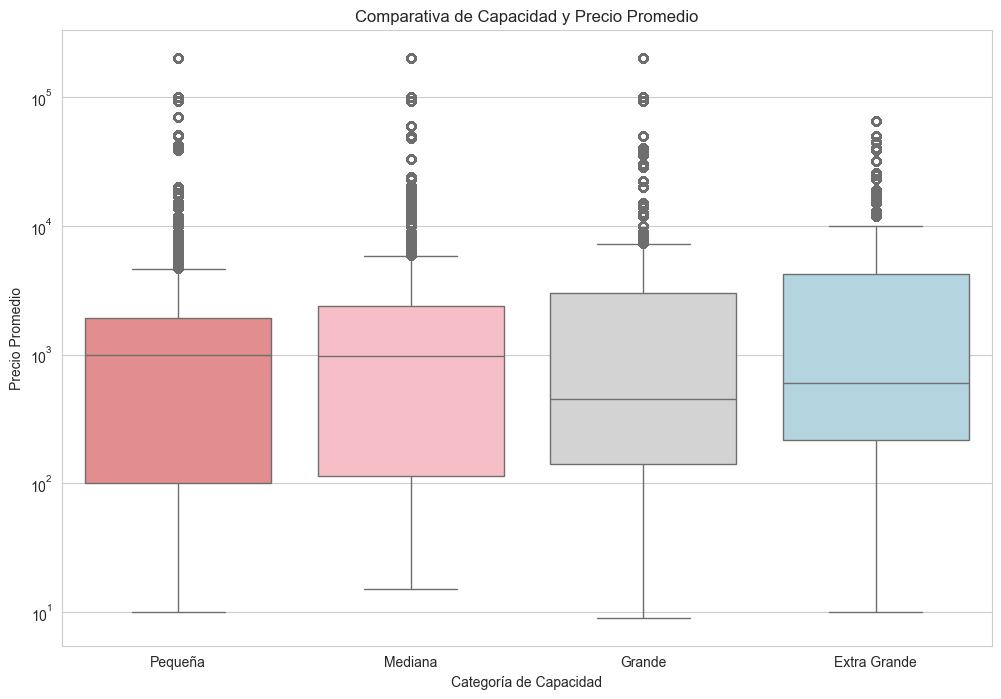

/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/2665361958.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='review_scores_avg', y='price_average', palette=colors)
/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/2665361958.py:23: UserWarning: 
The palette list has fewer values (4) than needed (1008) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x='review_scores_avg', y='price_average', palette=colors)


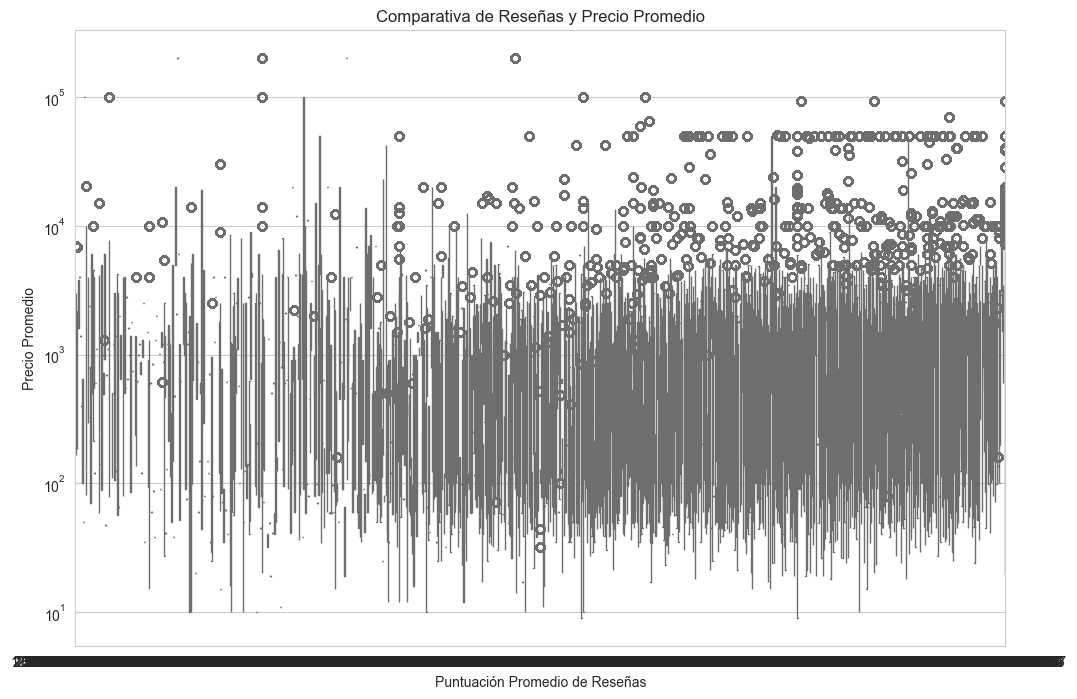

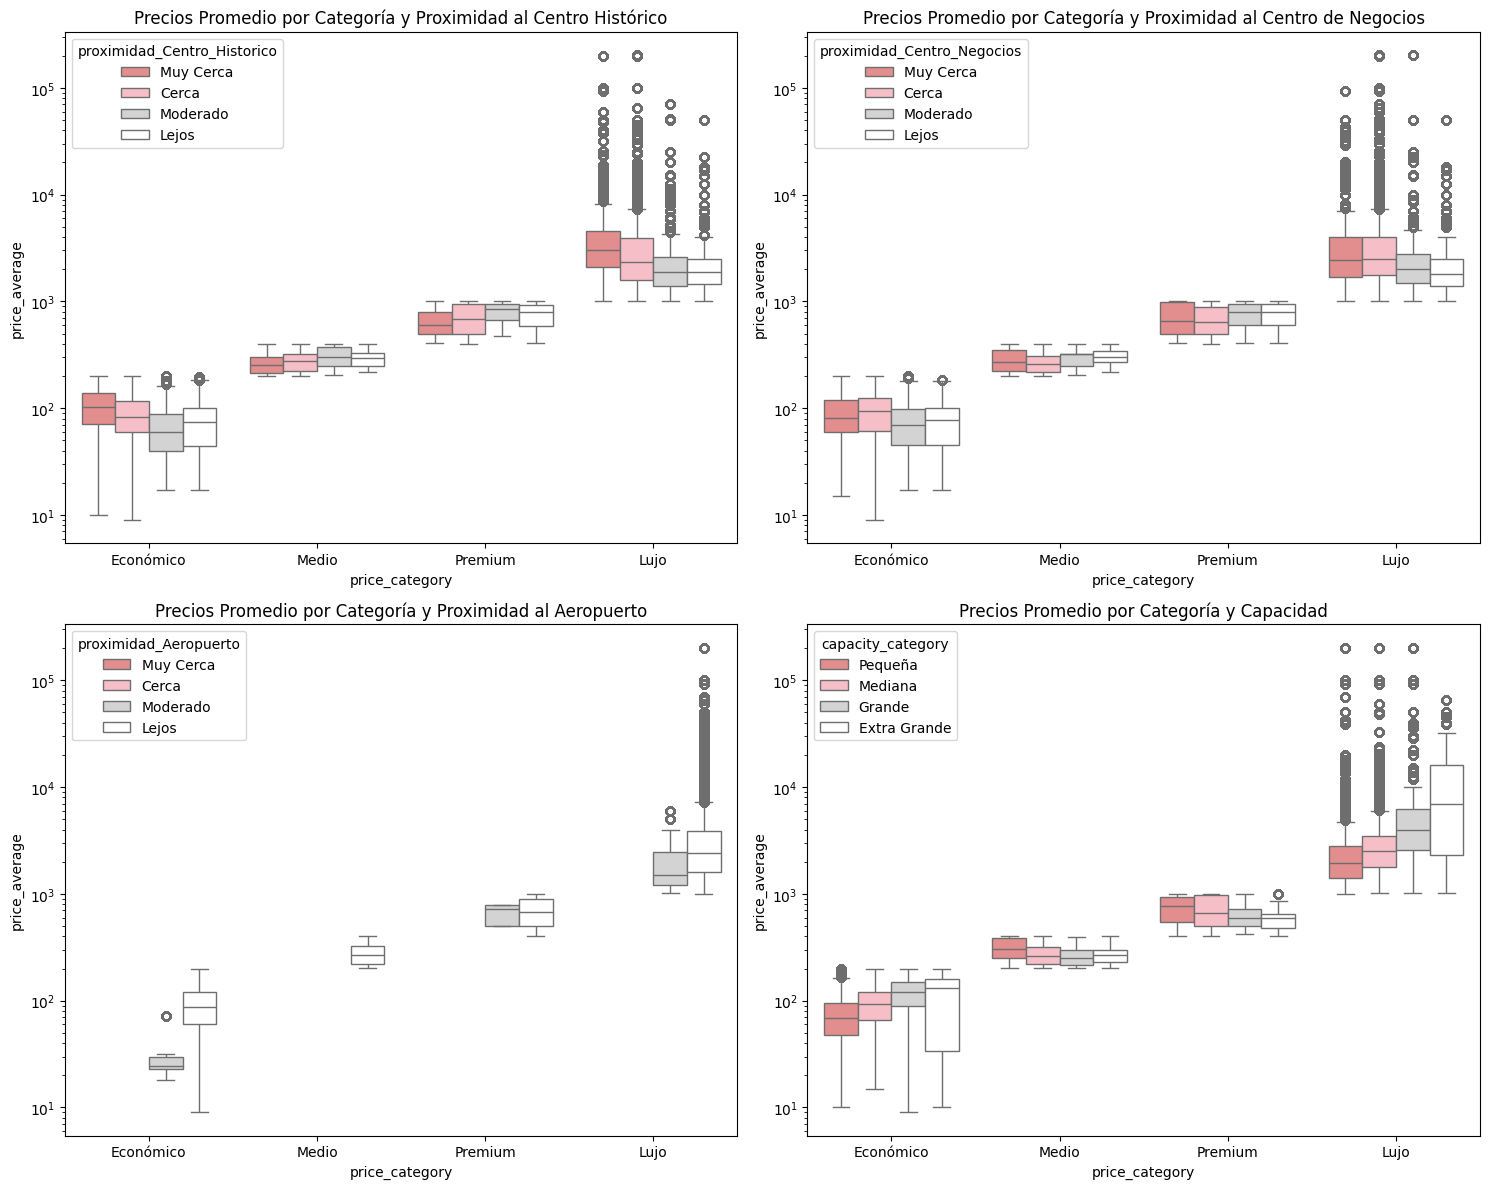

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del estilo
plt.style.use('default')
colors = ['lightcoral', 'lightpink', 'lightgray', 'white']

# Ajustar los límites de las categorías de precio para una distribución más equitativa
merged_df['price_category'] = pd.cut(merged_df['price_average'], 
                                     bins=[0, 200, 400, 1000, float('inf')],
                                     labels=['Económico', 'Medio', 'Premium', 'Lujo'])

# Crear figura con subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Boxplot de precios promedio por categoría y proximidad al centro
sns.boxplot(data=merged_df, 
            x='price_category', 
            y='price_average',
            hue='proximidad_Centro_Historico',
            palette=colors,
            ax=ax1)
ax1.set_yscale('log')
ax1.set_title('Precios Promedio por Categoría y Proximidad al Centro Histórico')

# 2. Boxplot de precios promedio por categoría y proximidad combinada
sns.boxplot(data=merged_df, 
            x='price_category', 
            y='price_average',
            hue='proximidad_Centro_Negocios',
            palette=colors,
            ax=ax2)
ax2.set_yscale('log')
ax2.set_title('Precios Promedio por Categoría y Proximidad al Centro de Negocios')

# 3. Boxplot de precios promedio por categoría y proximidad al aeropuerto
sns.boxplot(data=merged_df, 
            x='price_category', 
            y='price_average',
            hue='proximidad_Aeropuerto',
            palette=colors,
            ax=ax3)
ax3.set_yscale('log')
ax3.set_title('Precios Promedio por Categoría y Proximidad al Aeropuerto')

# 4. Boxplot de precios promedio por categoría y capacidad
sns.boxplot(data=merged_df, 
            x='price_category', 
            y='price_average',
            hue='capacity_category',
            palette=colors,
            ax=ax4)
ax4.set_yscale('log')
ax4.set_title('Precios Promedio por Categoría y Capacidad')

# Ajustar el diseño
plt.tight_layout()
plt.show()

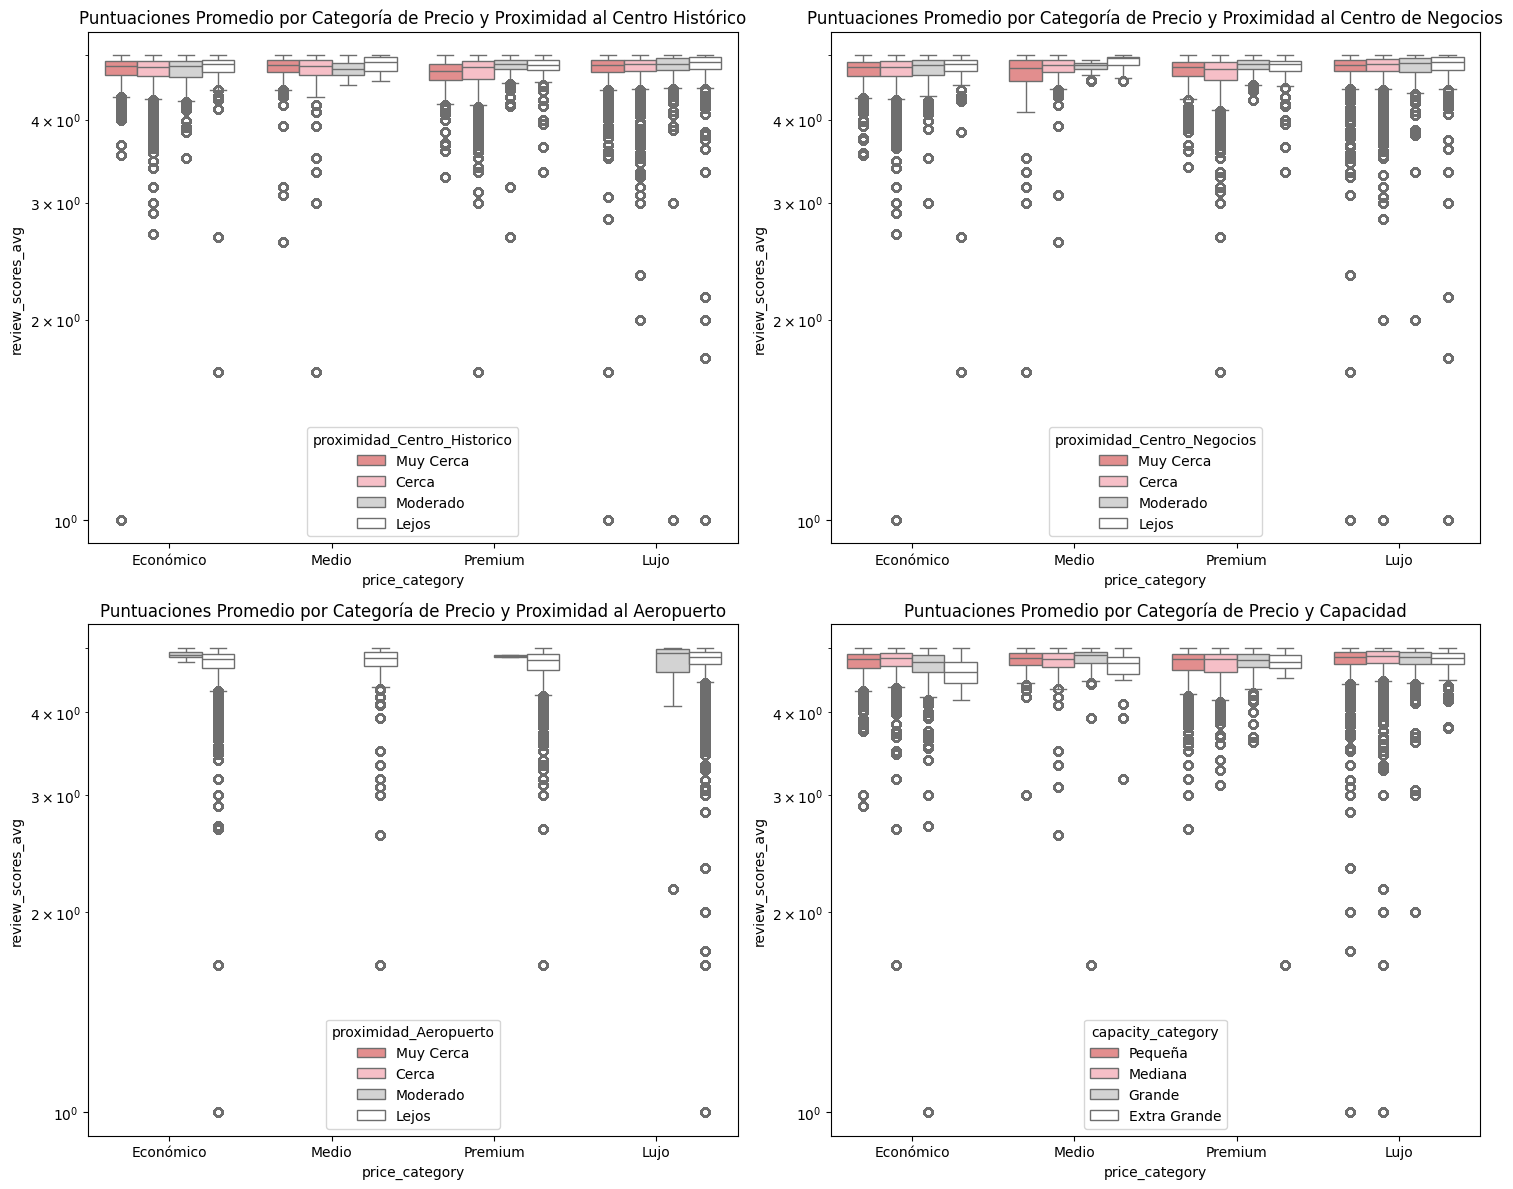

In [98]:
import seaborn as sns

import matplotlib.pyplot as plt

# Configuración del estilo
plt.style.use('default')
colors = ['lightcoral', 'lightpink', 'lightgray', 'white']

# Ajustar los límites de las categorías de precio para una distribución más equitativa
merged_df['price_category'] = pd.cut(merged_df['price_average'], 
                                     bins=[0, 200, 400, 1000, float('inf')],
                                     labels=['Económico', 'Medio', 'Premium', 'Lujo'])

# Crear figura con subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Boxplot de puntuaciones promedio por categoría de precio y proximidad al centro
sns.boxplot(data=merged_df, 
            x='price_category', 
            y='review_scores_avg',
            hue='proximidad_Centro_Historico',
            palette=colors,
            ax=ax1)
ax1.set_yscale('log')
ax1.set_title('Puntuaciones Promedio por Categoría de Precio y Proximidad al Centro Histórico')

# 2. Boxplot de puntuaciones promedio por categoría de precio y proximidad combinada
sns.boxplot(data=merged_df, 
            x='price_category', 
            y='review_scores_avg',
            hue='proximidad_Centro_Negocios',
            ax=ax2,
            palette=colors)
ax2.set_yscale('log')
ax2.set_title('Puntuaciones Promedio por Categoría de Precio y Proximidad al Centro de Negocios')

# 3. Boxplot de puntuaciones promedio por categoría de precio y proximidad al aeropuerto
sns.boxplot(data=merged_df, 
            x='price_category', 
            y='review_scores_avg',
            hue='proximidad_Aeropuerto',
            palette=colors,
            ax=ax3)
ax3.set_yscale('log')
ax3.set_title('Puntuaciones Promedio por Categoría de Precio y Proximidad al Aeropuerto')

# 4. Boxplot de puntuaciones promedio por categoría de precio y capacidad
sns.boxplot(data=merged_df, 
            x='price_category', 
            y='review_scores_avg',
            hue='capacity_category',
            palette=colors,
            ax=ax4)
ax4.set_yscale('log')
ax4.set_title('Puntuaciones Promedio por Categoría de Precio y Capacidad')

# Ajustar el diseño
plt.tight_layout()
plt.show()

/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/1777986736.py:58: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


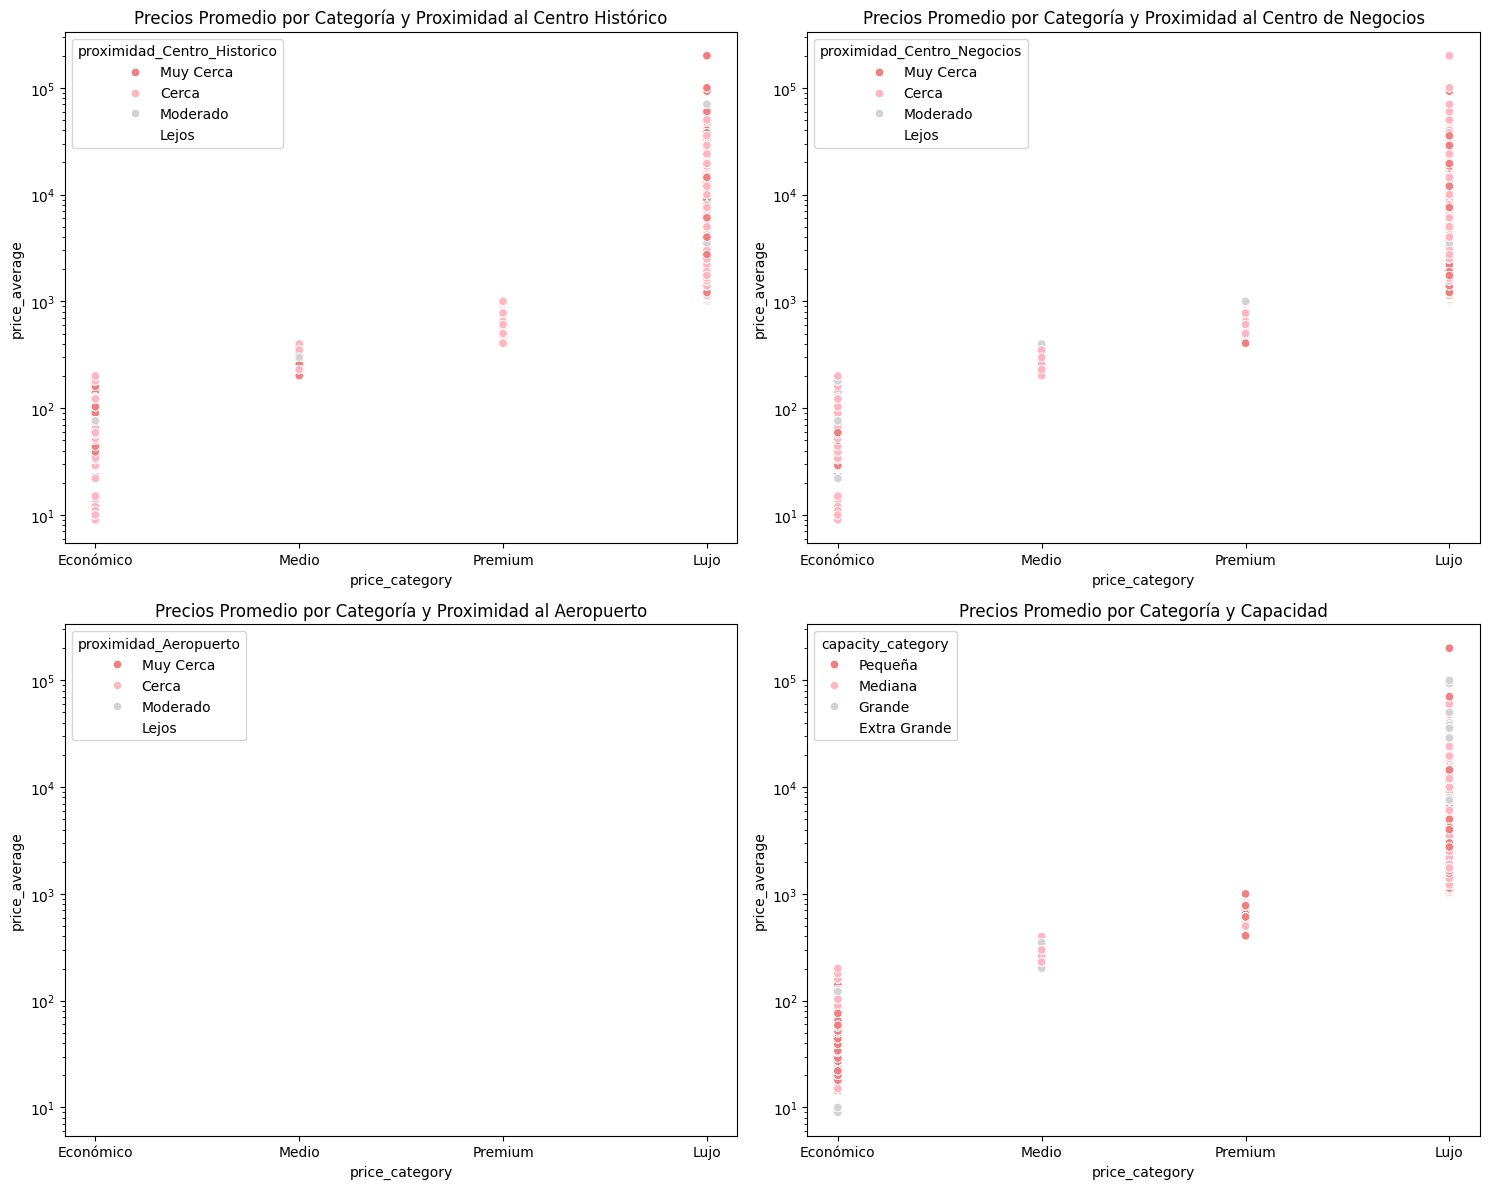

In [99]:
import seaborn as sns

import matplotlib.pyplot as plt

# Configuración del estilo
plt.style.use('default')
colors = ['lightcoral', 'lightpink', 'lightgray', 'white']

# Ajustar los límites de las categorías de precio para una distribución más equitativa
merged_df['price_category'] = pd.cut(merged_df['price_average'], 
                                     bins=[0, 200, 400, 1000, float('inf')],
                                     labels=['Económico', 'Medio', 'Premium', 'Lujo'])

# Crear figura con subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Scatter plot de precios promedio por categoría y proximidad al centro
sns.scatterplot(data=merged_df, 
                x='price_category', 
                y='price_average',
                hue='proximidad_Centro_Historico',
                palette=colors,
                ax=ax1)
ax1.set_yscale('log')
ax1.set_title('Precios Promedio por Categoría y Proximidad al Centro Histórico')

# 2. Scatter plot de precios promedio por categoría y proximidad combinada
sns.scatterplot(data=merged_df, 
                x='price_category', 
                y='price_average',
                hue='proximidad_Centro_Negocios',
                palette=colors,
                ax=ax2)
ax2.set_yscale('log')
ax2.set_title('Precios Promedio por Categoría y Proximidad al Centro de Negocios')

# 3. Scatter plot de precios promedio por categoría y proximidad al aeropuerto
sns.scatterplot(data=merged_df, 
                x='price_category', 
                y='price_average',
                hue='proximidad_Aeropuerto',
                palette=colors,
                ax=ax3)
ax3.set_yscale('log')
ax3.set_title('Precios Promedio por Categoría y Proximidad al Aeropuerto')

# 4. Scatter plot de precios promedio por categoría y capacidad
sns.scatterplot(data=merged_df, 
                x='price_category', 
                y='price_average',
                hue='capacity_category',
                palette=colors,
                ax=ax4)
ax4.set_yscale('log')
ax4.set_title('Precios Promedio por Categoría y Capacidad')

# Ajustar el diseño
plt.tight_layout()
plt.show()

/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/3798125119.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(merged_df.pivot_table(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.draw()
/var/folders/x2/d61wtnwn2b9g2vq1gmrgrmpr0000gn/T/ipykernel_48798/3798125119.py:51: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


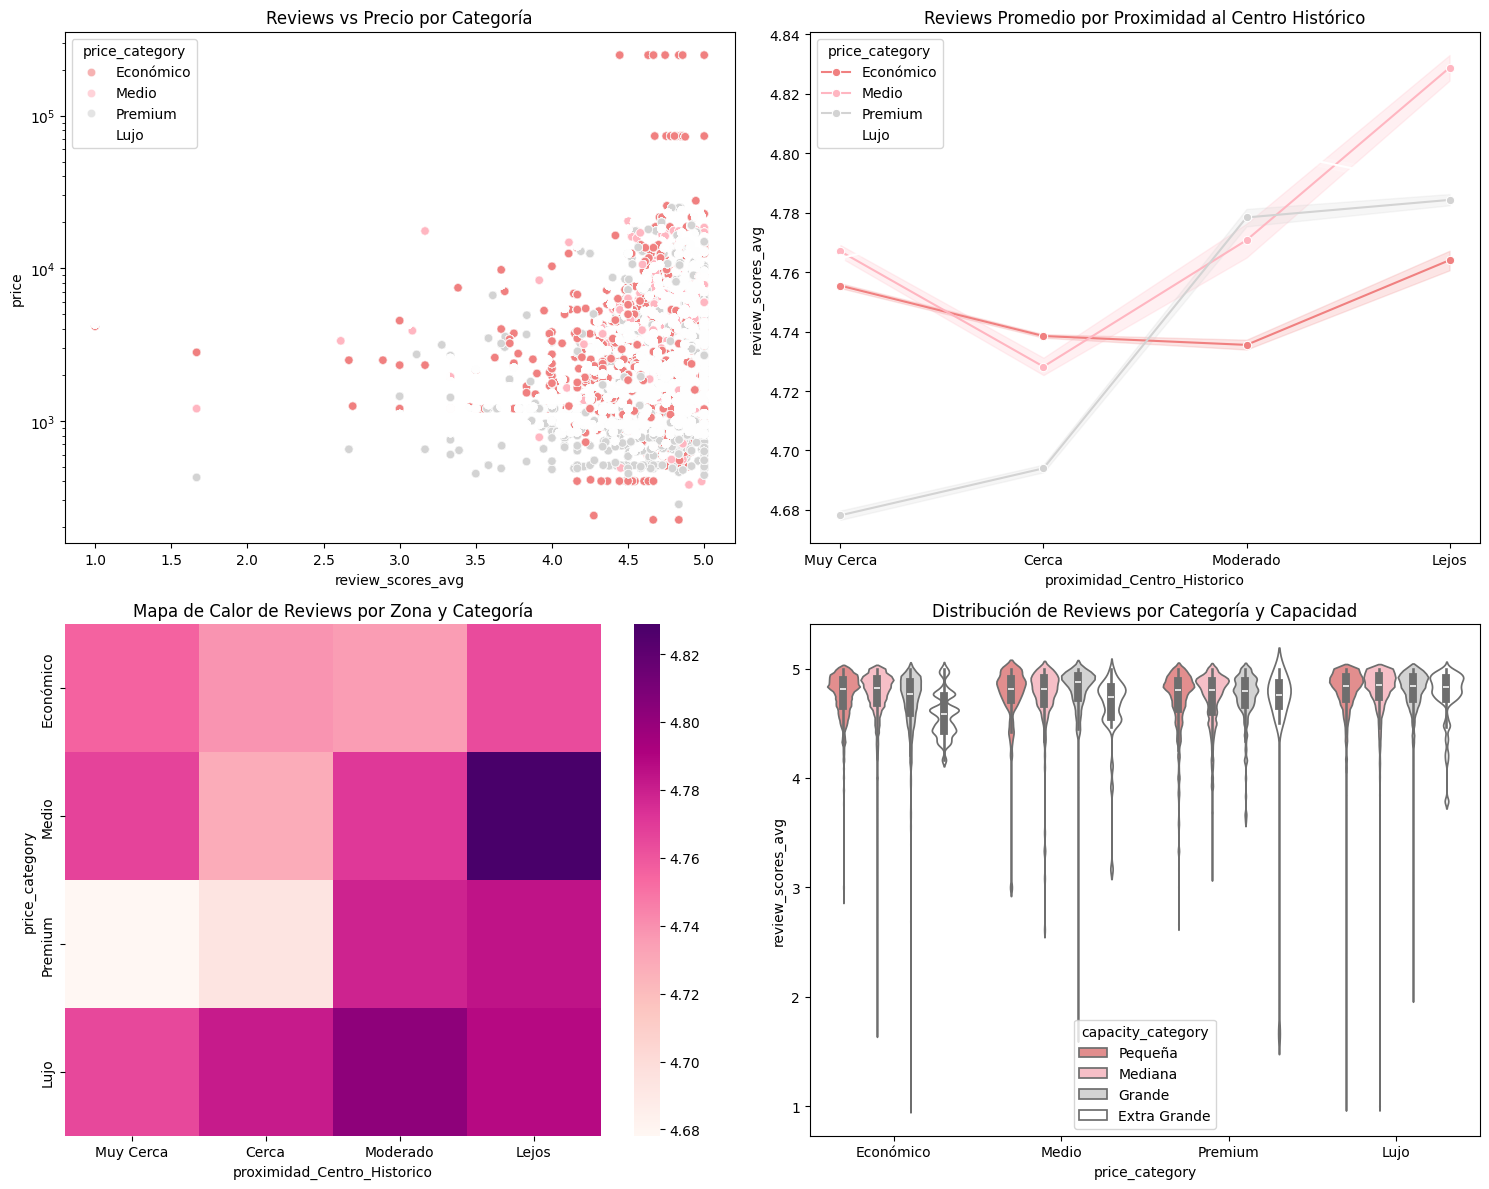

In [100]:
import seaborn as sns

import matplotlib.pyplot as plt

# Configuración inicial
plt.style.use('default')
colors = ['lightcoral', 'lightpink', 'lightgray', 'white']
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Scatter plot de Reviews vs Precio por categoría
sns.scatterplot(data=merged_df, 
                x='review_scores_avg', 
                y='price',
                hue='price_category',
                palette=colors,
                alpha=0.6,
                ax=ax1)
ax1.set_yscale('log')
ax1.set_title('Reviews vs Precio por Categoría')

# 2. Line plot de Reviews promedio por proximidad al centro
sns.lineplot(data=merged_df, 
            x='proximidad_Centro_Historico', 
            y='review_scores_avg',
            hue='price_category',
            palette=colors,
            marker='o',
            ax=ax2)
ax2.set_title('Reviews Promedio por Proximidad al Centro Histórico')

# 3. Heatmap de Reviews por zona
sns.heatmap(merged_df.pivot_table(
    values='review_scores_avg',
    index='price_category',
    columns='proximidad_Centro_Historico',
    aggfunc='mean'),
    cmap='RdPu',
    ax=ax3)
ax3.set_title('Mapa de Calor de Reviews por Zona y Categoría')

# 4. Violin plot de distribución de Reviews
sns.violinplot(data=merged_df,
               x='price_category',
               y='review_scores_avg',
               hue='capacity_category',
               palette=colors,
               ax=ax4)
ax4.set_title('Distribución de Reviews por Categoría y Capacidad')

# Ajustar el diseño
plt.tight_layout()
plt.show()